# Python Cheetsheet

### PandasML2

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [203]:
sns.set_context('poster')
#sns.set_theme(style='white', context='poster', palette=None)


In [204]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()
import matplotlib.pyplot as plt

#### Regression Model

In [205]:
!pip install statsmodels

In [18]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [19]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


<Figure size 2160x2160 with 0 Axes>

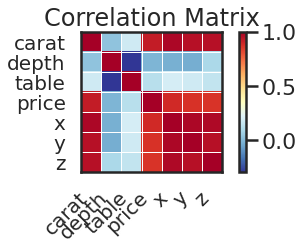

In [21]:
plt.figure(figsize=(30,30))
corr = diamonds.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

<AxesSubplot:>

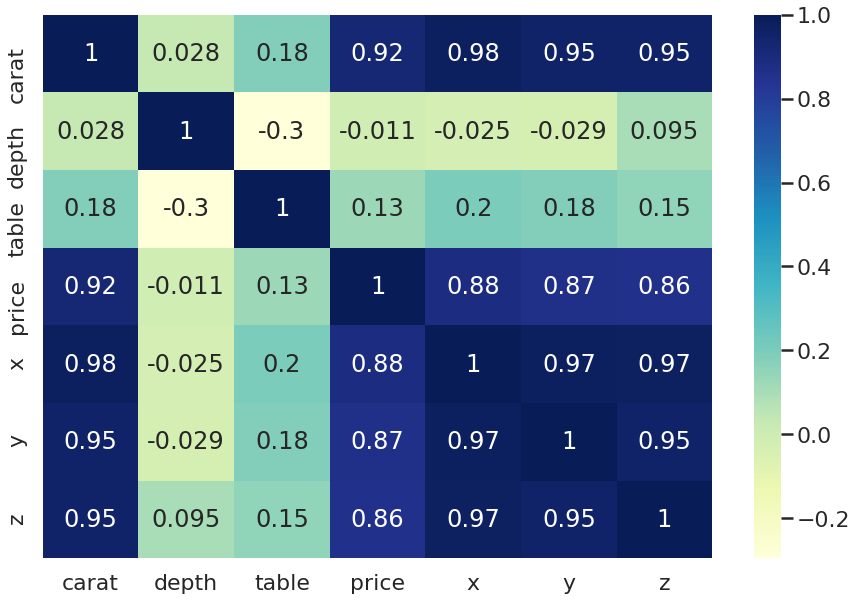

In [22]:
# sns.set(rc = {'figure.figsize':(15,6)})
plt.figure(figsize=(15,10))
sns.heatmap(diamonds.corr(), cmap="YlGnBu", annot=True)

- No need to preprocessthe categorical variables in this data

In [56]:
data = diamonds[['carat', 'depth', 'x', 'y', 'z', 'price']]

#### Transforming explanatory variables

In [57]:
exp_var = data[['carat', 'depth', 'x', 'y', 'z']].values.reshape(-1,5)
dep_var = data['price'].values.reshape(-1,1)

In [58]:
data['price'].values.flatten()

array([ 326,  326,  327, ..., 2757, 2757, 2757])

#### Train Test Split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                exp_var, dep_var, test_size=0.25, 
                                random_state=100)

#### Multiple linear regression model

In [60]:
# Model initiation
mult_reg_model = LinearRegression()

# Model training
mult_reg_model.fit(X_train, Y_train)

LinearRegression()

### Checking model performance

In [61]:
print("The R-squared: ", mult_reg_model.score(X_test, Y_test))

The R-squared:  0.8547062311236779


#### Coefficients of the model

In [62]:
data.columns

Index(['carat', 'depth', 'x', 'y', 'z', 'price'], dtype='object')

In [63]:
alphas = mult_reg_model.coef_
alphas = alphas[0,:]
betas = mult_reg_model.intercept_
# print(alphas)
# cols = data.columns
# print(cols[1])
for i in range(alphas.size):
    print(data.columns[i], ':', alphas[i])
print('The intercept of the slope is: ', betas)

carat : 10762.426900486742
depth : -169.09087305406717
x : -1484.3681049256581
y : 50.01769683056184
z : 234.32808505755176
The intercept of the slope is:  [13183.82609529]


#### Predict using the model

In [67]:
y_predict = mult_reg_model.predict(X_test)
print("R-squared score: ", r2_score(Y_test, y_predict))


R-squared score:  0.8547062311236779


In [68]:
print("R-squared score: ", r2_score(Y_test, y_predict))
print("Mean absolute error: ", mean_absolute_error(Y_test, y_predict))
print("Mean squared error: ", mean_squared_error(Y_test, y_predict))

R-squared score:  0.8547062311236779
Mean absolute error:  888.5068502598816
Mean squared error:  2284150.714622287


# ODEs Implementation

In [69]:
from scipy.integrate import quad
from scipy.integrate import odeint

In [70]:
%%javascript
MathJax.Hub.Config({
    TeX: {equationNumbers: {autoNumber: "AMS"}}
});

<IPython.core.display.Javascript object>

#### Exercise 1 : Quad

In [71]:
### Define your lambda functions
A = lambda x: ((x**3)+(5*x) - 20)/(x**2+3)
B = lambda x: (x-(1/3)) * np.sqrt(x**4 - 3)

lower_lim_a, upper_lim_a = 0,2
lower_lim_b, upper_lim_b = 3,5

quad_1 = quad(A, lower_lim_a, upper_lim_a)
quad_2 = quad(B, lower_lim_b, upper_lim_b)

print(f'The integral of A over {lower_lim_a} and {upper_lim_a} is {quad_1[0]}')
print(f'The integral of A over {lower_lim_b} and {upper_lim_b} is {quad_2[0]}')

The integral of A over 0 and 2 is -7.049316535735796
The integral of A over 3 and 5 is 124.40877284192784


#### Exercise 2: System of ordinary equations (odeint)

In [72]:
def model(z,x):
    x_1, x_2, x_3 = z
    dx_1dt = -(1/2)*x_1
    dx_2dt = (1/2)*x_1 - (1/4)*x_2    
    dx_3dt = (1/4)*x_2 - (1/6)*x_3
    
    return np.array([dx_1dt, dx_2dt, dx_3dt])

# Initial Conditions
initials = [1,1,1]

# x values
a,b = 0,4
N = 200
t = np.linspace(a,b,N)

odeint_model = odeint(model, initials, t)
odeint_model

array([[1.        , 1.        , 1.        ],
       [0.99000007, 1.00496229, 1.00168474],
       [0.98010016, 1.00979992, 1.00338844],
       [0.97029926, 1.01451455, 1.0051104 ],
       [0.96059635, 1.0191078 , 1.00684994],
       [0.95099047, 1.02358125, 1.00860641],
       [0.94148064, 1.02793646, 1.01037915],
       [0.93206592, 1.03217497, 1.01216751],
       [0.92274534, 1.03629834, 1.01397086],
       [0.91351796, 1.04030806, 1.01578859],
       [0.90438286, 1.04420565, 1.01762006],
       [0.8953391 , 1.04799258, 1.01946469],
       [0.88638578, 1.05167032, 1.02132187],
       [0.877522  , 1.05524031, 1.02319102],
       [0.86874685, 1.058704  , 1.02507156],
       [0.86005946, 1.06206279, 1.02696292],
       [0.85145894, 1.06531809, 1.02886455],
       [0.84294442, 1.06847129, 1.03077589],
       [0.83451504, 1.07152375, 1.0326964 ],
       [0.82616996, 1.07447682, 1.03462555],
       [0.81790833, 1.07733186, 1.03656282],
       [0.80972932, 1.08009018, 1.03850769],
       [0.

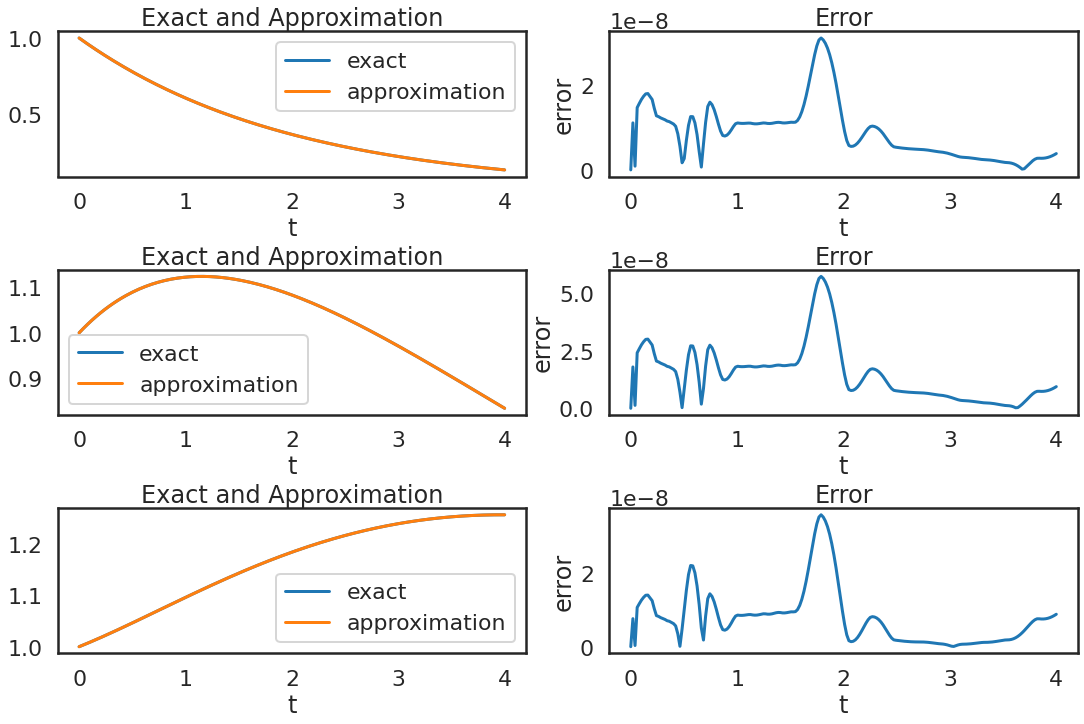

In [73]:
x_1t = np.exp(-t/2)
x_2t = -2*np.exp(-t/2)+3*np.exp(-t/4)
x_3t = (3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)

# Fixing the gap spaces for subplots
# plt.subplots_adjust(
# #                     left=0.1,
# #                     bottom=0.1,
# #                     right=0.9,
# #                     top=0.9,
#                     wspace=4,
#                     hspace=4)
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.plot(t, x_1t, label='exact');
plt.plot(t, odeint_model[:,0], label='approximation')
plt.legend()

plt.subplot(3,2,2)
plt.title('Error')
plt.plot(t, np.absolute(x_1t - odeint_model[:,0]))
plt.xlabel('t')
plt.ylabel('error')

plt.subplot(3,2,3)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.plot(t, x_2t, label='exact');
plt.plot(t, odeint_model[:,1], label='approximation')
plt.legend()

plt.subplot(3,2,4)
plt.title('Error')
plt.plot(t, np.absolute(x_2t - odeint_model[:,1]))
plt.xlabel('t')
plt.ylabel('error')

plt.subplot(3,2,5)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.plot(t, x_3t, label='exact');
plt.plot(t, odeint_model[:,2], label='approximation')
plt.legend()

plt.subplot(3,2,6)
plt.title('Error')
plt.plot(t, np.absolute(x_3t - odeint_model[:,2]))
plt.xlabel('t')
plt.ylabel('error')

plt.tight_layout(pad=.2)
plt.show()

#### Exercise 3: EulerOdeSys

In [74]:
# def  euler_model(f,z,t):

def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    z = np.ones((len(t), len(c)))
    # Initialize z[0]
    z[0] = c
    for i in range(N-1):
        z[i+1]=z[i]+H*f(z[i],t[i])
    return z
    

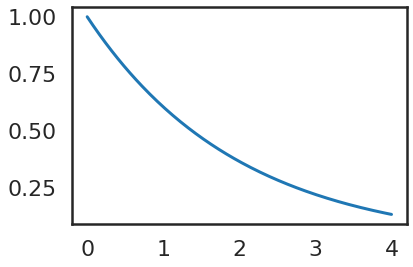

In [75]:
# Model for Euler Method
def model(z,x):
    x_1, x_2, x_3 = z
    dx_1dt = -(1/2)*x_1
    dx_2dt = (1/2)*x_1 - (1/4)*x_2    
    dx_3dt = (1/4)*x_2 - (1/6)*x_3
    
    return np.array([dx_1dt, dx_2dt, dx_3dt])

# Initial Values
c=np.array([1,1,1])

# t-values
t=np.linspace(0,4,200)

z = EulerOdeSys(model,c,t)
plt.plot(t,z[:,0])
plt.show()

#### RK4OdeSys

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [76]:
def RK4OdeSys(f,c,t):
    H = t[1] - t[0]
    z = np.ones((len(t), len(c)))
    z[0] = c
    
    for k in range(len(t) - 1):
        k1 = f(z[k], t[k])
        k2 = f(z[k]+ (H*(k1/2)), t[k] + (H/2))
        k3 = f(z[k]+ (H*(k2/2)), t[k] + (H/2))
        k4 = f(z[k] + H*k3, t[k] + H)
        z[k+1] = z[k] + ((H/6)*(k1+2*k2+2*k3+k4))
    return z

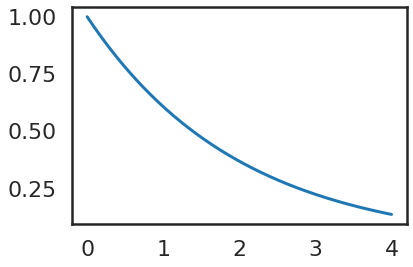

In [77]:
# Initial Values
c=np.array([1,1,1])

# t-values
t=np.linspace(0,4,200)

z = RK4OdeSys(model,c,t)
plt.plot(t,z[:,0])
plt.show()

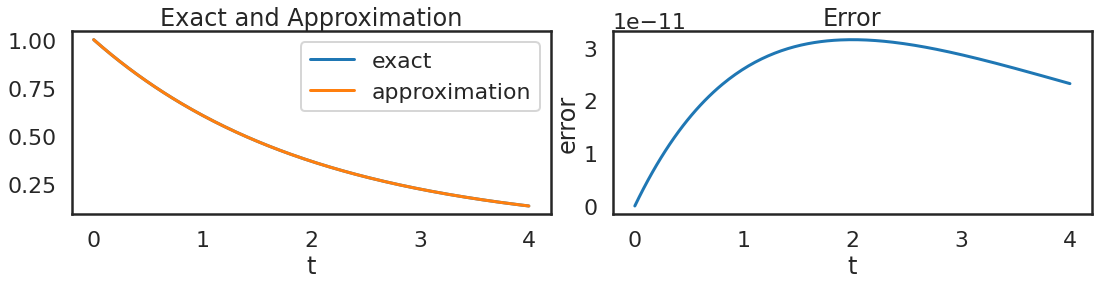

In [78]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.plot(t, x_1t, label='exact');
plt.plot(t, z[:,0], label='approximation')
plt.legend()

plt.subplot(3,2,2)
plt.title('Error')
plt.plot(t, np.absolute(x_1t - z[:,0]))
plt.xlabel('t')
plt.ylabel('error')


plt.tight_layout(pad=.2)
plt.show()

### Implicit Equation
$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [79]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

def MatGenerator(a,b,alp,K,beta,N,g):
    H=(b-a)/N
    global x
    x = np.linspace(a,b,N+1)
    B = np.zeros(N+1)
    B[0] = alp
    B[N] = beta
    B[1:N] = (H**2/K**2)*g(x[1:N])
    A = np.eye(N+1,N+1)
    A[1,0] = -1
    A[N-1,N] = -1
    A[1:N,1:N] = -np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    return A,B

[-4.         -3.99979785 -3.99918765 -3.9981612  -3.99671021 -3.99482623
 -3.99250073 -3.989725   -3.98649024 -3.9827875  -3.97860771 -3.97394163
 -3.96877993 -3.96311311 -3.95693154 -3.95022545 -3.94298491 -3.93519986
 -3.92686009 -3.91795523 -3.90847477 -3.89840804 -3.88774421 -3.87647229
 -3.86458114 -3.85205945 -3.83889574 -3.82507839 -3.81059557 -3.79543531
 -3.77958546 -3.76303367 -3.74576746 -3.72777412 -3.70904078 -3.68955439
 -3.66930171 -3.64826929 -3.62644352 -3.60381056 -3.58035641 -3.55606683
 -3.5309274  -3.50492351 -3.4780403  -3.45026273 -3.42157554 -3.39196325
 -3.36141016 -3.32990036 -3.2974177  -3.26394581 -3.22946808 -3.19396767
 -3.15742752 -3.11983031 -3.08115849 -3.04139424 -3.00051952 -2.95851603
 -2.9153652  -2.87104821 -2.82554598 -2.77883917 -2.73090816 -2.68173306
 -2.6312937  -2.57956963 -2.52654014 -2.4721842  -2.41648051 -2.35940747
 -2.30094317 -2.24106543 -2.17975173 -2.11697926 -2.05272489 -1.98696517
 -1.91967634 -1.8508343  -1.78041463 -1.70839257 -1

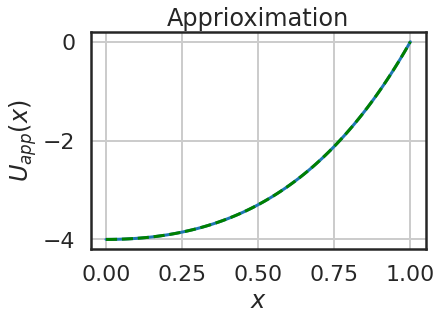

In [80]:
g=lambda x: -4*(x+1)*np.exp(x)
u=lambda x: 4*(x-1)*np.exp(x)
a=0
b=1
alp=-4
K=1
beta=0
N=100
A,B=MatGenerator(a,b,alp,K,beta,N,g)
U=np.linalg.solve(A,B)
print(U)
plt.plot(x,U)
plt.plot(x,u(x), 'g--')
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.title("Apprioximation")
plt.show()

4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [81]:
def  MatGenerator1(a,b,K, alpha, beta,N, g):
    H=(b-a)/N
    global x,xe
    x=np.linspace(a,b,N+1)
    xe=x+H/2
    B=np.zeros(N+1)
    B[0]=alpha
    B[N]=beta
    B[1:N]=(H**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-K(xe[0])
    A[N-1,N]=-K(xe[N])
    T=np.zeros((N-1,N-1))
    for i in range(N-1):
        T[i]=-K(xe[i])*np.eye(N-1,N-1,k=-1)[i]+(K(xe[i])+K(xe[i+1]))*np.eye(N-1,N-1,k=0)[i]-K(xe[i+1])*np.eye(N-1,N-1,k=1)[i]
    A[1:N,1:N]=T
    return A,B


[-4.         -3.99979785 -3.99918765 -3.9981612  -3.99671021 -3.99482623
 -3.99250073 -3.989725   -3.98649024 -3.9827875  -3.97860771 -3.97394163
 -3.96877993 -3.96311311 -3.95693154 -3.95022545 -3.94298491 -3.93519986
 -3.92686009 -3.91795523 -3.90847477 -3.89840804 -3.88774421 -3.87647229
 -3.86458114 -3.85205945 -3.83889574 -3.82507839 -3.81059557 -3.79543531
 -3.77958546 -3.76303367 -3.74576746 -3.72777412 -3.70904078 -3.68955439
 -3.66930171 -3.64826929 -3.62644352 -3.60381056 -3.58035641 -3.55606683
 -3.5309274  -3.50492351 -3.4780403  -3.45026273 -3.42157554 -3.39196325
 -3.36141016 -3.32990036 -3.2974177  -3.26394581 -3.22946808 -3.19396767
 -3.15742752 -3.11983031 -3.08115849 -3.04139424 -3.00051952 -2.95851603
 -2.9153652  -2.87104821 -2.82554598 -2.77883917 -2.73090816 -2.68173306
 -2.6312937  -2.57956963 -2.52654014 -2.4721842  -2.41648051 -2.35940747
 -2.30094317 -2.24106543 -2.17975173 -2.11697926 -2.05272489 -1.98696517
 -1.91967634 -1.8508343  -1.78041463 -1.70839257 -1

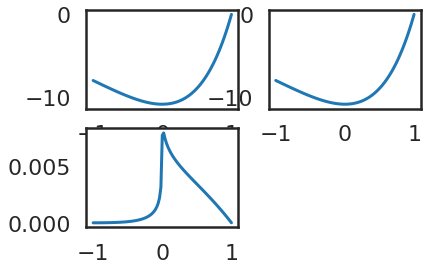

In [50]:
k=lambda x: x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
uex=lambda x: 4*(x-1)*np.exp(x+1)
print(U)
A,B=MatGenerator1(-1,1,k, -8, 0,100, g)
U=np.linalg.solve(A,B)
plt.subplot(2,2,1)
plt.plot(x,U)
plt.subplot(2,2,2)
plt.plot(x,uex(x))
plt.subplot(2,2,3)
plt.plot(x,abs(U-uex(x)))

## All Hove Course Material

# Data Visualization
The focus of this module is to provide skills for visualization of different type datasets and to ensure that participants are comfortable with python packages for data visualization. In this module, we will learn about $\href{https://matplotlib.org/}{\text{matplotlib}}$ and $\href{https://seaborn.pydata.org/}{\text{seaborn}}$ which are python packages mostly used for visualising static statistical plots. Other python packages such as $\href{https://plotly.com/}{\text{plotly}}$, $\href{https://bokeh.org/}{\text{Bokeh}}$ and $\href{https://streamlit.io/}{\text{streamlit}}$ are used to visualize dynamic data.

Static data refers to a fixed data or, data that remains the same after it's collected. Dynamic data, on the other hand, continually changes after it's recorded in order to maintain its integrity.

We will first dive into `matplotlib`. `matplotlib` is a visualization library that is built on top of $\href{https://numpy.org/}{\text{NumPy}}$ and is designed to work along with $\href{https://www.scipy.org/}{\text{SciPy}}$. It is mostly used as a standalone package but in recent times, it is also used as wrappers on other packages including `pandas`.

For the first part of the session, we will use simple generated data. This data may act as a `Hello World!` for `matplotlib`. Afterwards, we will dive deeper by using `matplotlib` on DataFrames

## Installing `matplotlib`
One can install `matplotlib` using their python package. There are two python package manager and they are `pip` and `conda`. To install `matplotlib`, open your terminal or command prompt and type the code below. 

For those using `pip` as their python package manager, type; <br>
`pip install matplotlib` 

For those using `conda` as their python package manager, type; <br>
`conda install matplotlib`

In [82]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

Let us start by creating a simple example.

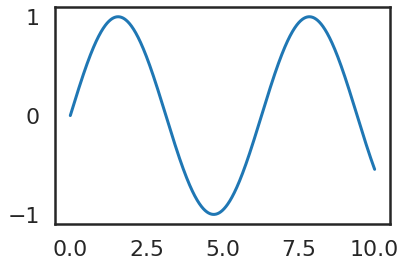

In [83]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 1001)   # generating 100 evenly space numbers between 0 and 10 
y = np.sin(x)
plt.plot(x, y) # calling for the plot function on x and sin(x)

 ## `show()` or No `show()` (How to display your plots)
A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context. 

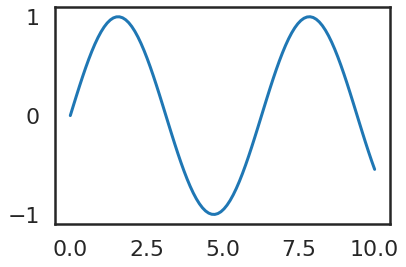

In [84]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x))     # calling for the plot function on x and sin(x)
plt.show()  # calling for the show function

Alternatively, you can use `;` to suppress such unwanted information. In python, `;` is used to suppress output.

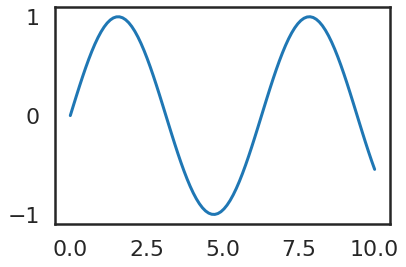

In [85]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 

plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

## Setting Styles
There are many styles in `matplotlib` that one can use. 

In [86]:
plt.style.available?

In [87]:
plt.style.use('seaborn')

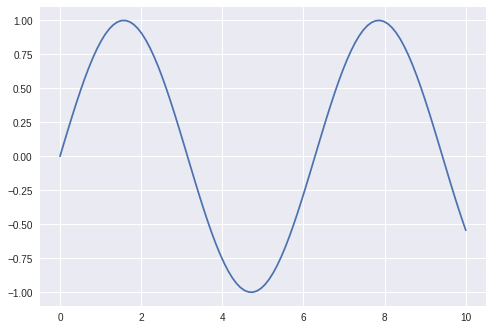

In [88]:
# Plotting a line using matplotlib
x = np.linspace(0, 10, 100)   # generating 100 evenly space numbers between 0 and 10 
plt.plot(x, np.sin(x));     # calling for the plot function on x and sin(x)

One can create a single figure with multiple lines by calling the `plot` function multiple times

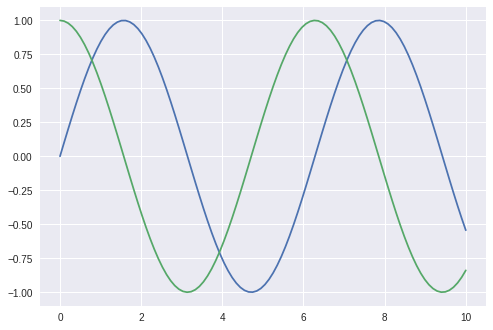

In [90]:
# Plotting multiple lines using matplotlib
plt.plot(x, np.sin(x))   # plotting the first line
plt.plot(x, np.cos(x))  # plotting the second line
plt.show()

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

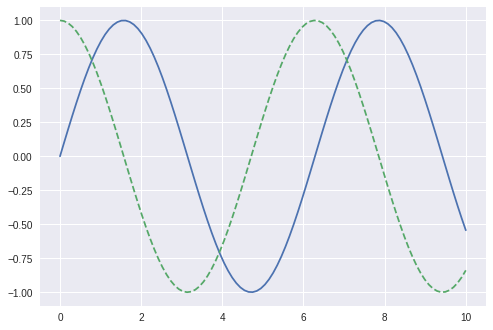

In [91]:
#plt.style.use('classic')
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')
fig.savefig('my_figure2.png')   # calling savefig function to save the plot

## Plotting lines in `matplotlib`

As you can see in the previous plots, `matplotlib` chose the colors and the type of lines automatically. However, one can also set their own colors and line types. Let us look at some examples in the cells below.

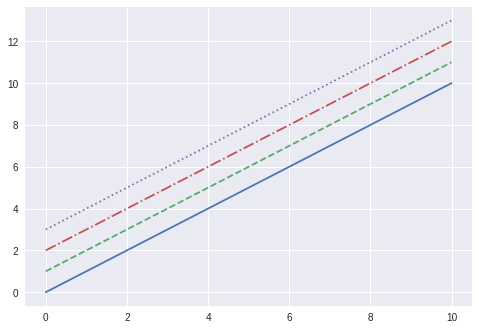

In [92]:
# changing the linestyles
plt.plot(x, x + 0, linestyle='solid')    
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

Alternatively, I can use short cuts to obtain the above plot exactly. 

|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

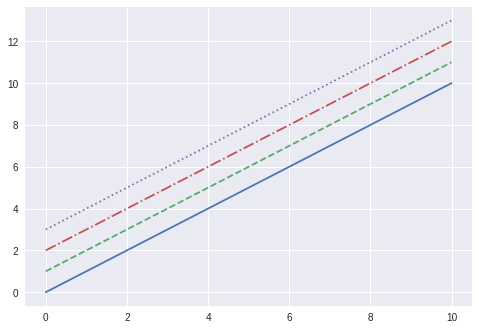

In [93]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

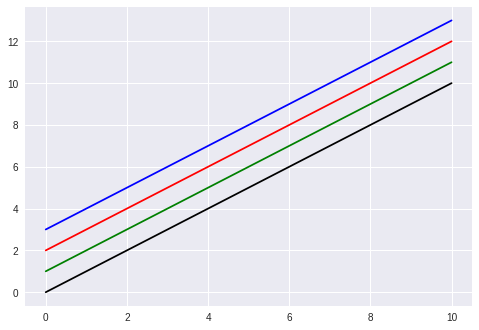

In [94]:
# changing colours of lines
plt.plot(x, x + 0, color='black')  
plt.plot(x, x + 1, color='green') 
plt.plot(x, x + 2, color='red') 
plt.plot(x, x + 3, color='blue')
plt.show()

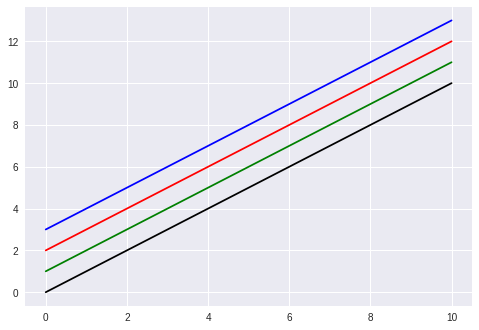

In [95]:
plt.plot(x, x + 0, color='k')  # black line
plt.plot(x, x + 1, color='g')  # green line
plt.plot(x, x + 2, color='r')  # red line 
plt.plot(x, x + 3, color='b'); # blue line

This is the abbreviations for the colours available in `matplotlib`.

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |

An advantage of using `matplotlib`, is the ability to combine color choice and linestyle. Let us see the example in the cell below.

Next, let us look at some combinations.

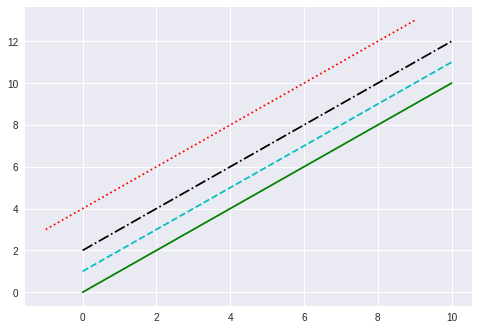

In [96]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x-1, x + 3, ':r'); # dotted red

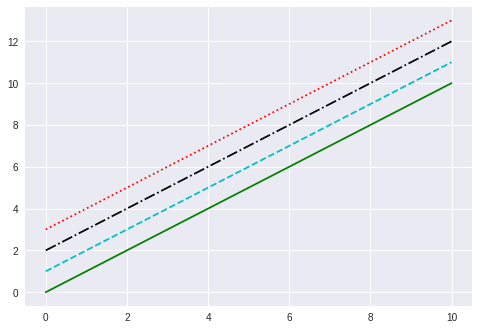

In [97]:
plt.plot(x, x+0, '-g', x, x+1, '--c', x, x+2, '-.k', x, x+3, ':r');

Also, one can choose the type of marker they want. For example, in the cell below, we have `go--`. This will generate a green circle marker with dashed lines running in it.

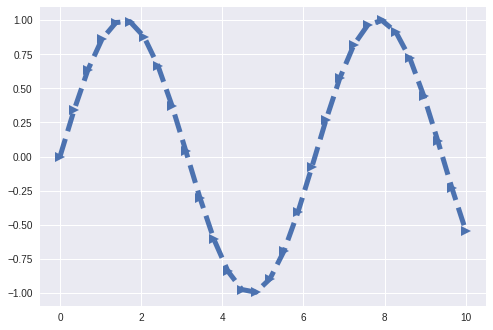

In [98]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=5, markersize=10);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

The general approach to the `plot` function is very simple;

```plot(x, y, [fmt], **kwargs)``` <br>
```plot(x, y, [fmt], x2, y2, [fmt], ..., **kwargs)```

## Adjusting the axes limits
The axes are adjusted by using `xlim` and `ylim` functions.

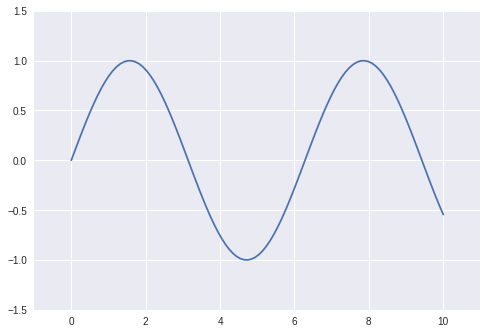

In [99]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

Alternatively, one can use the `axis` function. `axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

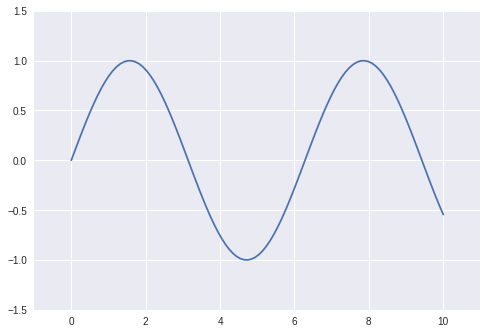

In [100]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);  # alternative approach to changing the limit of the axes

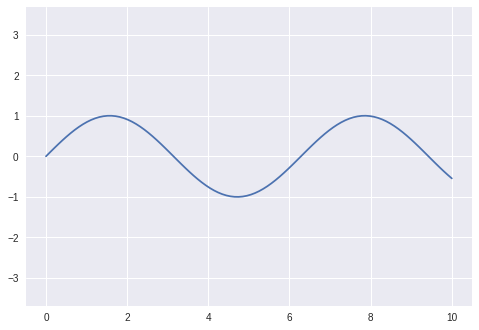

In [101]:
plt.plot(x, np.sin(x))
plt.axis('equal');  # equal option creates a 1:1 aspect ratio

## Labeling plots

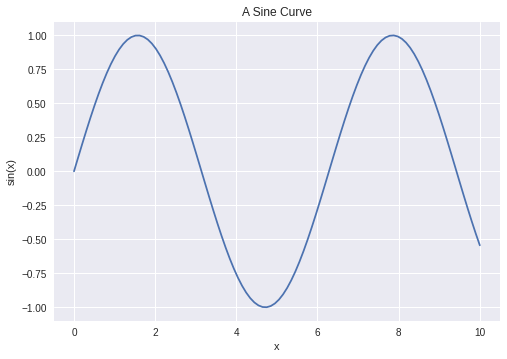

In [103]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")  # adding title of the plot
plt.xlabel('x')            # adding label for the x-axis of the plot 
plt.ylabel('sin(x)');      # adding label for the y-axis of the plot 
plt.title?

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, Matplotlib has a built-in way of quickly creating such a legend. It is done via the `legend()` method. Though there are several valid ways of using this, it easier to specify the label of each line using the `label` keyword of the plot function:

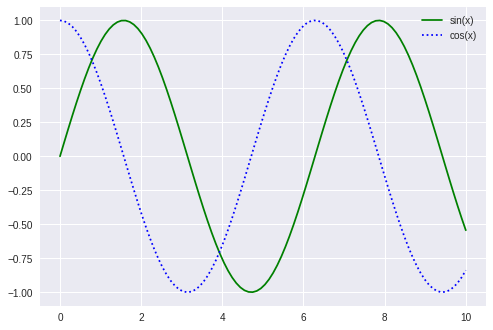

In [104]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b', label='cos(x)')   # adding the label argument for plot 2
plt.legend(); # calling for the legend

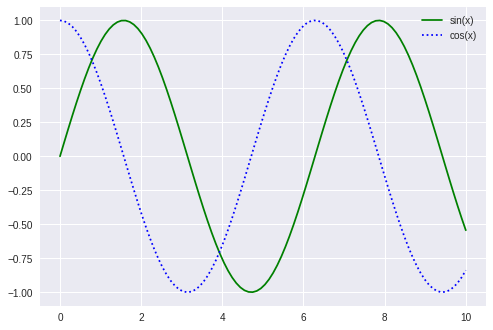

In [105]:
plt.plot(x, np.sin(x), '-g')   # adding the label argument for plot 1
plt.plot(x, np.cos(x), ':b')   # adding the label argument for plot 2
plt.legend(['sin(x)','cos(x)']); # calling for the legend

## Scatter Plot

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. 

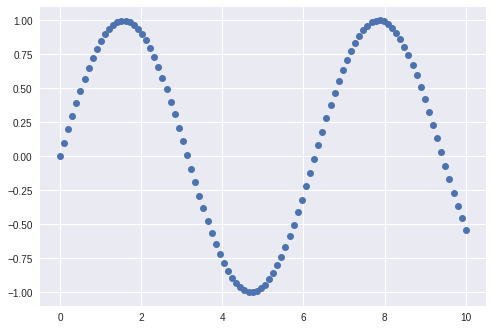

In [106]:
# showing a scatter plot with `plot` function
plt.plot(x, np.sin(x), 'o');

Mainly, and a more powerful method of creating scatter plots is the `scatter` function, which can be used very similarly to the `plot` function:

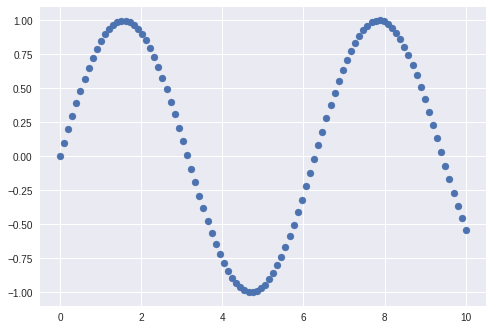

In [107]:
# plotting scatter plot
plt.scatter(x, np.sin(x));
plt.scatter?

### `plot` Versus `scatter`: A Note on Efficiency
Aside from the different features available in `plot` and `scatter`, why might you choose to use one over the other? While it doesn't matter as much for small amounts of data, as datasets get larger than a few thousand points, `plot` can be noticeably more efficient than `scatter`. The reason is that `scatter` has the capability to render a different size and/or color for each point, so the renderer must do the extra work of constructing each point individually. In `plot`, on the other hand, the points are always essentially clones of each other, so the work of determining the appearance of the points is done only once for the entire set of data. For large datasets, the difference between these two can lead to vastly different performance, and for this reason, `plot` should be preferred over `scatter` for large datasets.

## Plotting Histogram

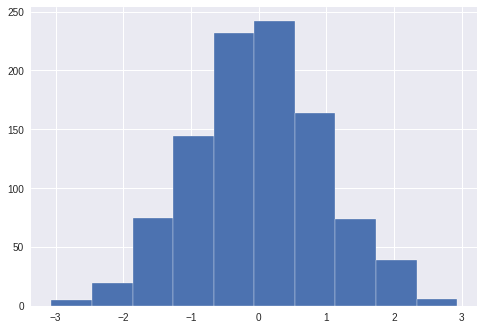

In [108]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

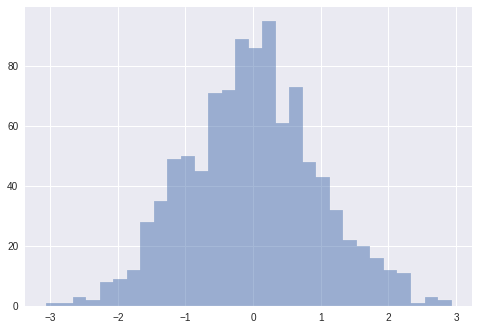

In [109]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

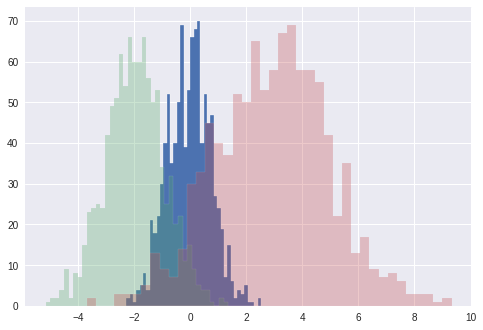

In [110]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=1, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

An alternative to the cell above

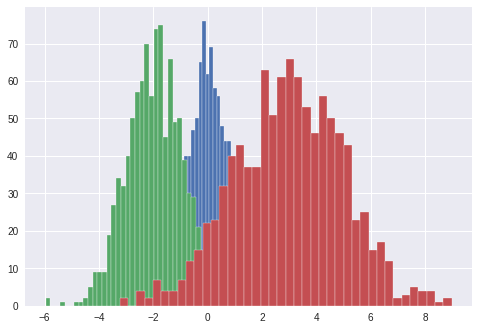

In [111]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict( bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
np.random.randn?
plt.hist?

## Customizing plot legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `legend()` command, which automatically creates a legend for any labeled plot elements:

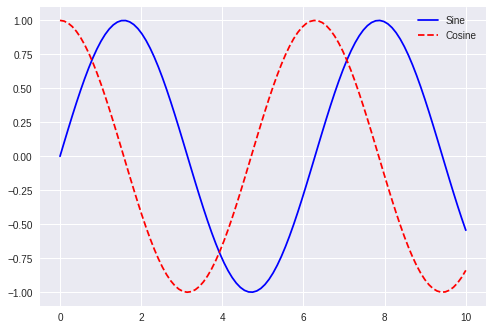

In [112]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend();

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

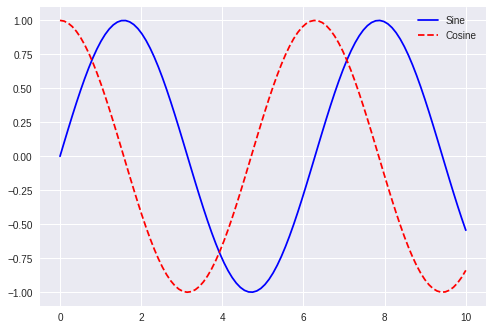

In [113]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='upper right'); # adding positional argument to legend

We can use the `ncol` command to specify the number of columns in the legend and `title` to specify the title of the legend:

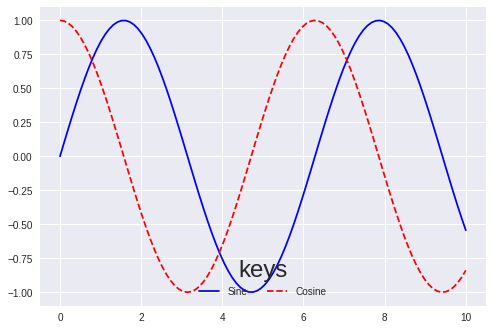

In [114]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='lower center', ncol=2, title='keys');

## Creating Subplots
Sometimes it is helpful to compare different views of data side by side. To this end, Matplotlib has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts. 

The most basic method of creating an axes is to use the `axes` function. `axes` also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent `[left, bottom, width, height]` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the x and y position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the x and y extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

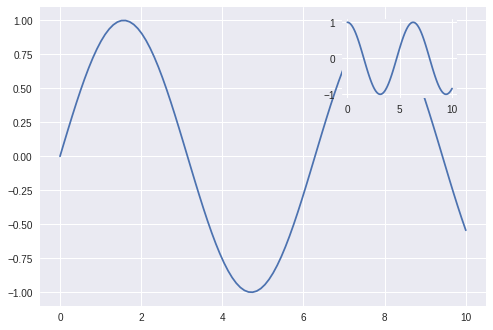

In [115]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

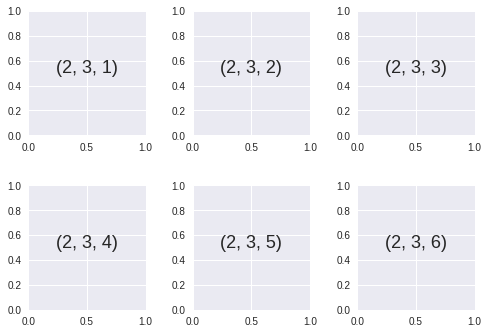

In [116]:
plt.figure().subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

An example of subplot

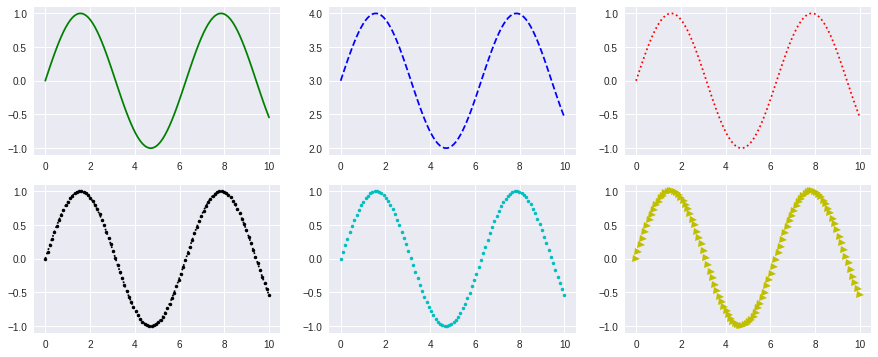

In [117]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, 1)
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, 2)
plt.plot(x, np.sin(x) + 3, '--b')
plt.subplot(2, 3, 3)
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '>y');

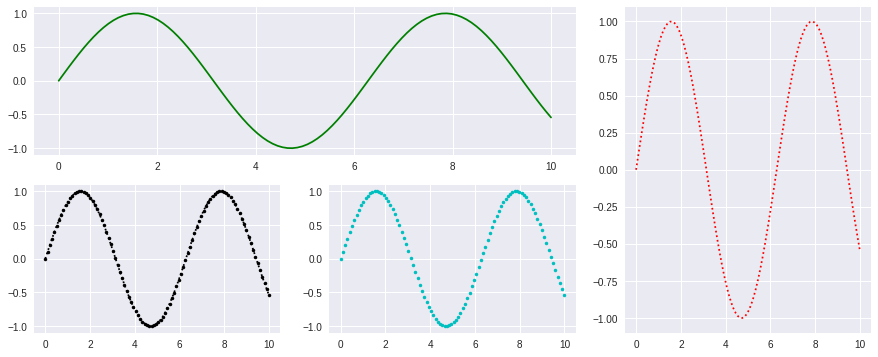

In [118]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,2))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (3,6))
plt.plot(x, np.sin(x) + 0, ':r')
plt.subplot(2, 3, 4)
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')

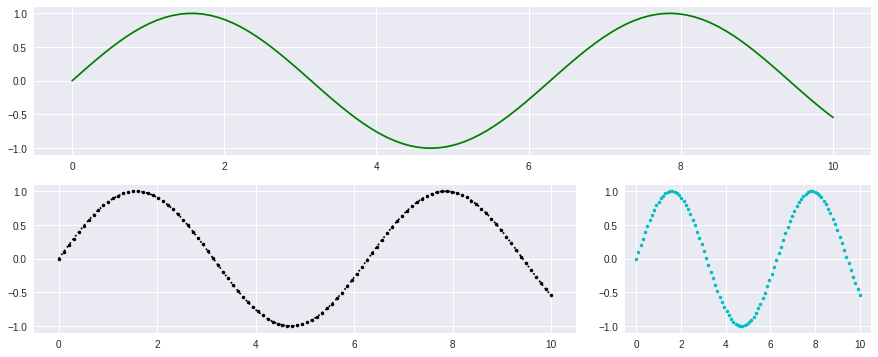

In [119]:
plt.figure(figsize=(15,6))
plt.subplot(2, 3, (1,3))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(2, 3, (4,5))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(2, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c');

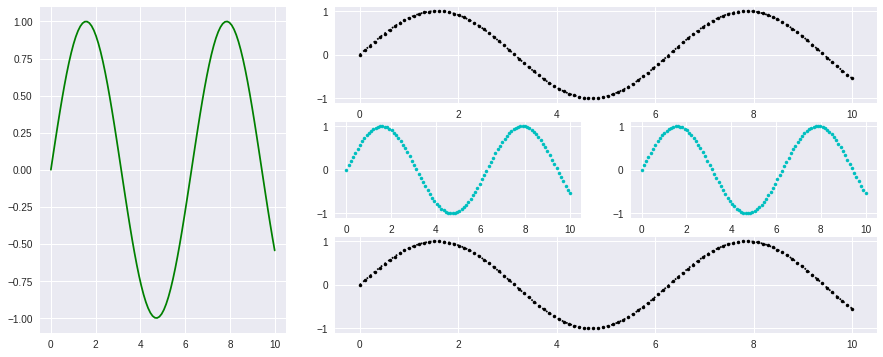

In [120]:
plt.figure(figsize=(15,6))
plt.subplot(3, 3, (1,7))
plt.plot(x, np.sin(x) + 0, 'g')
plt.subplot(3, 3, (2,3))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.subplot(3, 3, 5)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, 6)
plt.plot(x, np.sin(x) + 0, '.c')
plt.subplot(3, 3, (8,9))
plt.plot(x, np.sin(x) + 0, ':.k')
plt.show()

## Text and Annotation
Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this. Let's take a look at some data and how we might visualize and annotate it to help convey interesting information. We'll start by setting up the notebook for plotting and importing the functions we will use:

Text(6, 7.5, 'Gradient (0.2, 0.2)')

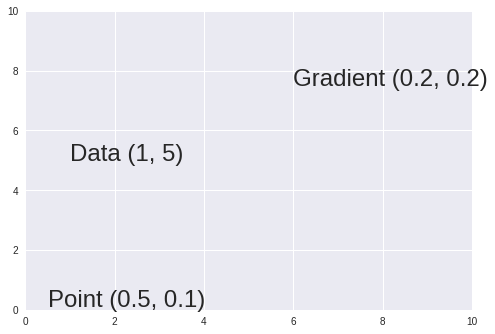

In [121]:
plt.axis([0, 10, 0, 10])
plt.text(1, 5, "Data (1, 5)")
plt.text(0.5, 0.1, "Point (0.5, 0.1)")
plt.text(6, 7.5, "Gradient (0.2, 0.2)")

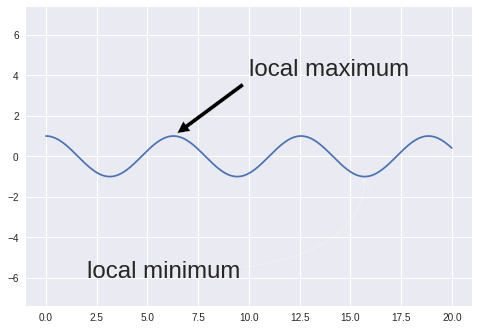

In [123]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')
plt.annotate('local maximum', 
             xy=(6.28, 1), 
             xytext=(10, 4), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('local minimum', 
             xy=(5 * np.pi, -1), 
             xytext=(2, -6),
             arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90"));

In this session, we will demonstrate various techniques for visualising data using both `matplotlib` and `pandas`. This will also include the correct interpretation and understanding of the different plotting techniques. The data to be used are `flight_data.csv` and `weather.csv`. They can both be found in the folder.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('flight_data.csv')

In [3]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [4]:
df.shape

(336776, 19)

To reduce the amount of data we will be working with and make things a little easier, lets only look at _Alaska Airlines_ flights leaving from New York City in 2013. This can be done by subsetting the data in such a way that we only observe flights from Alaska Airlines (carrier code AS), as follows;

In [5]:
Alaska = df[df['carrier'] == 'AS']

This essentially picks out all of the rows within the flights data set for which the carrier code is AS and discards the rest, thus creating a new data set entitled Alaska. To observe the Alaska data we can use the following commands:

In [6]:
Alaska.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
78,2013,1,1,724.0,725,-1.0,1020.0,1030,-10.0,AS,11,N594AS,EWR,SEA,338.0,2402,7,25,1/1/2013 7:00
644,2013,1,1,1808.0,1815,-7.0,2111.0,2130,-19.0,AS,7,N553AS,EWR,SEA,336.0,2402,18,15,1/1/2013 18:00
949,2013,1,2,722.0,725,-3.0,949.0,1030,-41.0,AS,11,N592AS,EWR,SEA,314.0,2402,7,25,2/1/2013 7:00
1573,2013,1,2,1818.0,1815,3.0,2131.0,2130,1.0,AS,7,N552AS,EWR,SEA,332.0,2402,18,15,2/1/2013 18:00
1894,2013,1,3,724.0,725,-1.0,1012.0,1030,-18.0,AS,11,N533AS,EWR,SEA,325.0,2402,7,25,3/1/2013 7:00


In [7]:
Alaska.shape

(714, 19)

# Visualising the data 
## Scatterplots
This allows us to examine if there is any relationship between two variables, such as positive or negative correlation, and whether the relationship appears linear or not. Lets say we wanted to observe the relationship between departure and arrival delays. We can do that as follows:

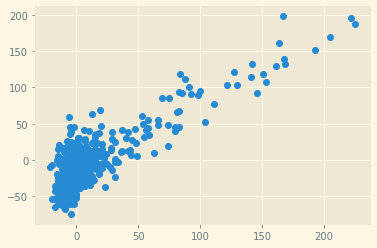

In [8]:
plt.style.use('Solarize_Light2')
plt.scatter('dep_delay', 'arr_delay', data=Alaska); 

## Adding labels to the axes

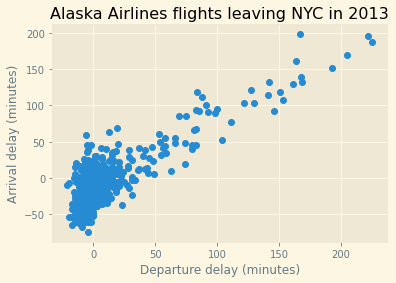

In [9]:
plt.scatter('dep_delay', 'arr_delay', data=Alaska)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

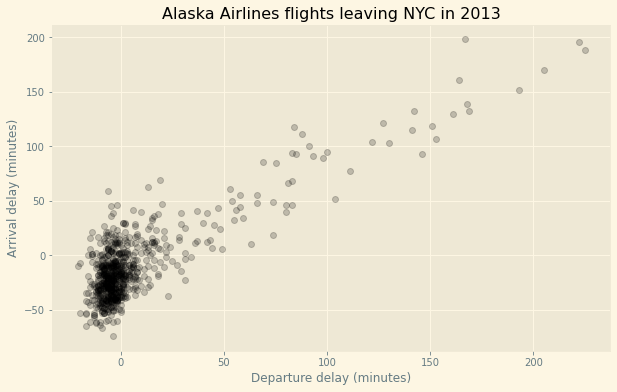

In [10]:
plt.figure(figsize=(10,6))
plt.scatter('dep_delay', 'arr_delay', data=Alaska, color='k', alpha=0.2)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

### Something to think about.
1. Why do departure and arrival delays appear to have a positive relationship?
2. Why is there a cluster of points at (0,0)? What does this indicate?

## Histograms
Histograms allow us to look at the statistical distribution of a variable. They show us how many values of a variable fall within specified bins. These bins give ranges of values for which the variable lies. The bins can be altered, that is, by changing their width, or by increasing the number of bins, such that we see the distribution at a higher resolution. Here, lets take a look at the weather data set. This data set contains hourly weather data from three airports (LGA, JFK and EWR) in New York City in 2013. 

In [11]:
weather = pd.read_csv('weather.csv')
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z


Now, let us see  the distribution of the hourly temperature:

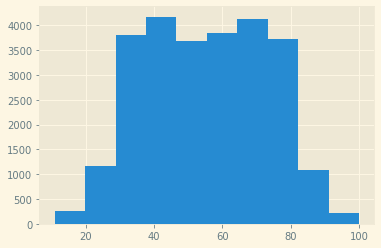

In [12]:
plt.hist(weather['temp']);

As mentioned earlier, we can view histogram as a higher resolution by increasing the number of bins.

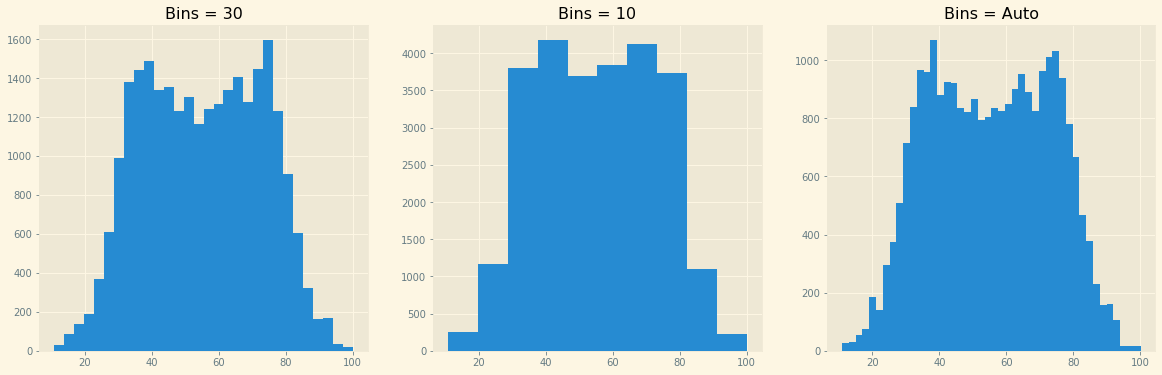

In [13]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Bins = 30')
weather['temp'].hist(bins=30)

plt.subplot(1,3,2)
plt.title('Bins = 10')
weather['temp'].hist(bins=10)

plt.subplot(1,3,3)
plt.title('Bins = Auto')
weather['temp'].hist(bins='auto')

plt.show()

Finally, let us plot a histogram with more information.

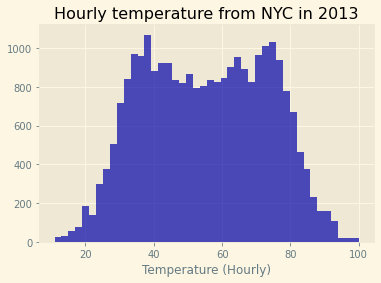

In [14]:
plt.style.use('Solarize_Light2')
plt.hist(weather['temp'], bins='auto', color='#0504aa', alpha=0.7)
plt.xlabel('Temperature (Hourly)')
plt.title('Hourly temperature from NYC in 2013')
plt.show()

### Something to think about
3. What does the histogram tell us about the hourly temperature levels from NYC in 2013?

## Boxplot
Another way to look at the distribution of a variable is using a boxplot. A boxplot makes use of the standard five-number summary, that is

* the minimum value;
* the first quartile or 25th percentile;
* the median (or 2nd quartile / 50th percentile);
* the third quartile or 75th percentile;
* and the maximum value.

Keeping with the hourly temperature data, the five-number summary can be obtained by using the following command:

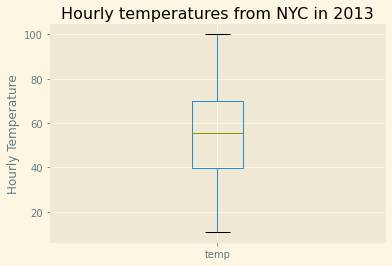

In [15]:
weather.boxplot('temp')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
plt.show()

We could look at how the hourly temperature changes by month:

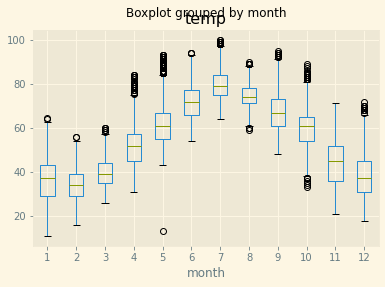

In [16]:
weather.boxplot('temp', by='month');

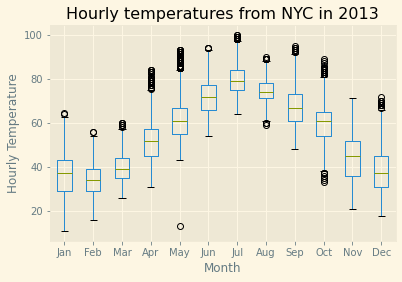

In [17]:
weather.boxplot('temp', by='month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Hourly Temperature')
plt.title('Hourly temperatures from NYC in 2013')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(list(range(1, 13)), months);

### Something to think about
4. Which months have the highest variability in temperature?

## Barplots
Barplots, or barcharts, are used to visualise the distributions of categorical variables. This essentially provides us with the frequencies of categories within a categorical variable. Lets take a look at the distribution of airline carriers within the flights data that flew out of New York City in 2013. We can do this by creating a table containing the number of flights from each airline carrier as follows:

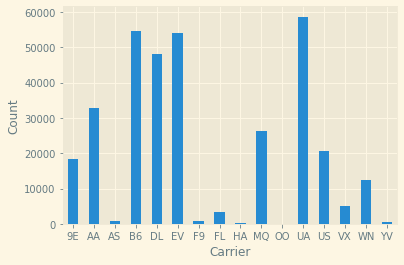

In [18]:
df.groupby('carrier').size().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

Barplots can also be used to compare two categorical variables. For instance, lets say we wanted to look atthe number of flights that flew out of New York York in 2013 from each carrier and from each airport (LGA, JFK and EWR). 

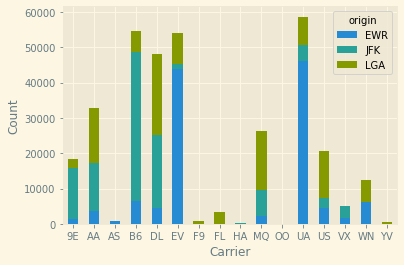

In [19]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

This provides us with a visually nice barplot to present our carrier information by airport of origin. However,there are also alternative barplots to the stacked barplot.  One alternative to a stacked barplot is theside-by-side(ordodged)barplot, which, as suggested by its name, places the bars next to each anotherinstead of on top of one another. This can be produced as follows

#### Faceted barplot

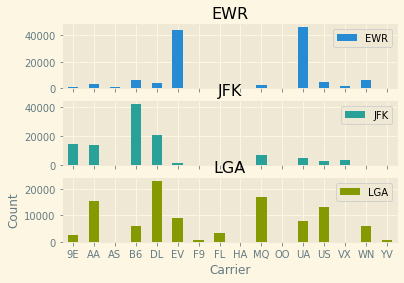

In [20]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', subplots=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

#### side-by-side barplot

Text(0, 0.5, 'Count')

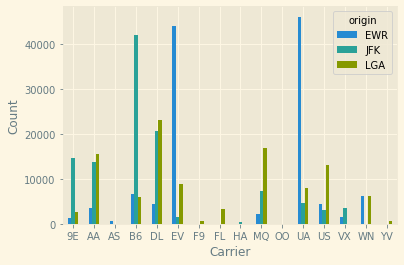

In [21]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count')

Linegraphs are typically used when looking at _time series_ data, that is, when we have information on how a variable changes over time. Hence, there is a natural ordering to the data when observing how something changes over time, and therefore, linegraphs should be avoided if there is no sequential ordering of a variable. Lets again look at the hourly temperature data, but this time only for Newark International Airport in January. This can be done by first subsetting the data as follows:

In [22]:
Newark_Jan = weather[(weather['origin'] == 'EWR') & (weather['month'] == 1)]
Newark_Jan

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,EWR,2013,1,31,19,33.08,15.08,47.10,270.0,20.71404,31.07106,0.0,1006.6,10.0,2013-02-01T00:00:00Z
738,EWR,2013,1,31,20,32.00,19.04,58.37,250.0,17.26170,26.46794,0.0,1007.3,10.0,2013-02-01T01:00:00Z
739,EWR,2013,1,31,21,32.00,10.04,39.38,260.0,28.76950,36.82496,0.0,1008.0,10.0,2013-02-01T02:00:00Z
740,EWR,2013,1,31,22,30.92,6.98,35.84,260.0,27.61872,35.67418,0.0,1008.5,10.0,2013-02-01T03:00:00Z


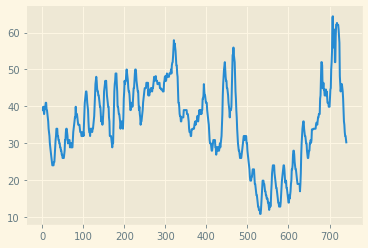

In [23]:
plt.plot(Newark_Jan['temp']);

## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often have to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

### Installing with pip <br>
`pip install seaborn`

### Installing with conda <br>
`conda install seaborn`

### import

In [24]:
pwd

'/home/alaa/Desktop/AIMS Folder/Skills Phase/Block 2/Programming with Python PP/onefile'

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import Data
but you need to put it in the the samefile first.

In [26]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [27]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Michelle Samms,F,46,NY,17-BY3613DX,Laptop,609.99,140.34,Flyer 3,November,2019
98,99,Mick Roberts,M,23,PA,BB980,Desktop,889.99,110.89,Flyer 2,May,2019
99,100,Ed Klondike,M,52,OH,15M-ED0023DX,Laptop,989.99,111.34,Email,November,2019
100,101,Moe Eggert,M,35,PA,GMA4000BST,Desktop,589.99,138.64,Website,May,2019


In [28]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

### Distribution Plot

<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

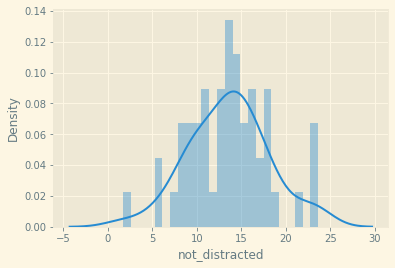

In [29]:
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

### Joint Plot

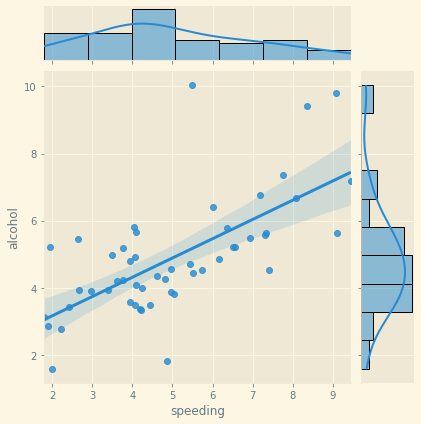

In [30]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

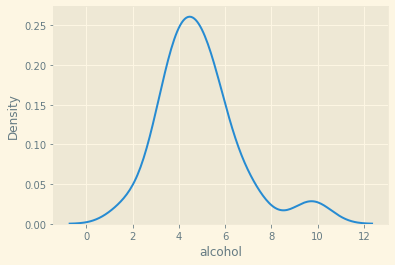

In [31]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

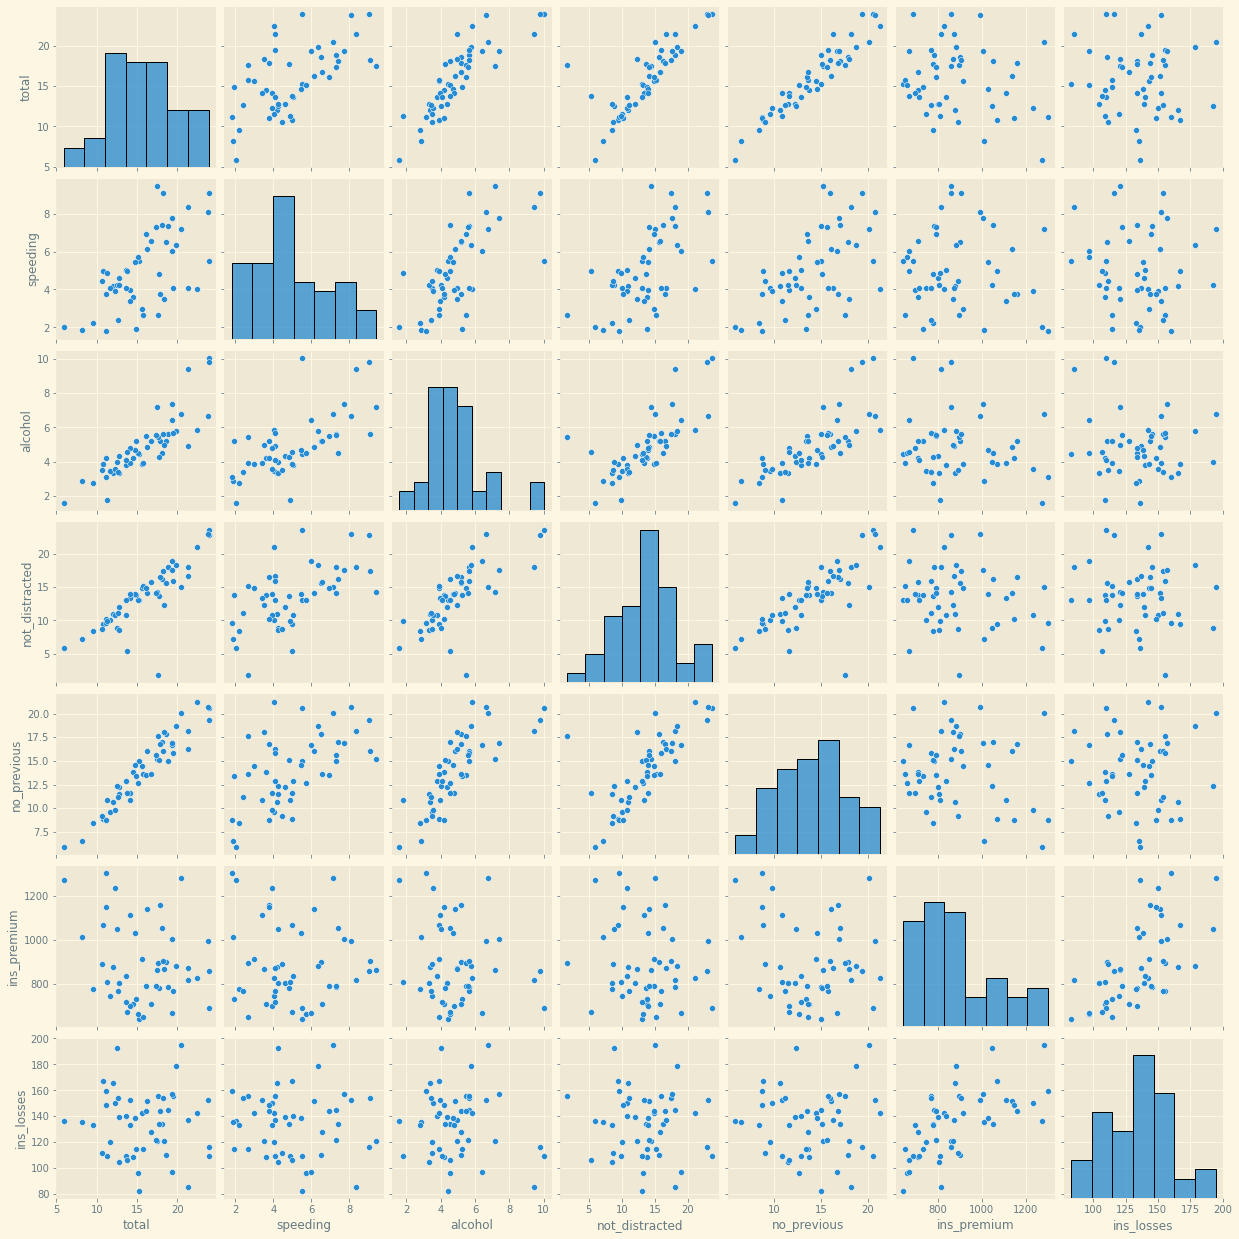

In [32]:
# Pair Plot plots relationships across the entire data frames numerical values
sns.pairplot(crash_df)

# Load data on tips
tips_df = sns.load_dataset('tips')

# With hue you can pass in a categorical column and the charts will be colorized
# You can use color maps from Matplotlib to define what colors to use
# sns.pairplot(tips_df, hue='sex', palette='Blues')

### Styling

<Figure size 576x288 with 0 Axes>

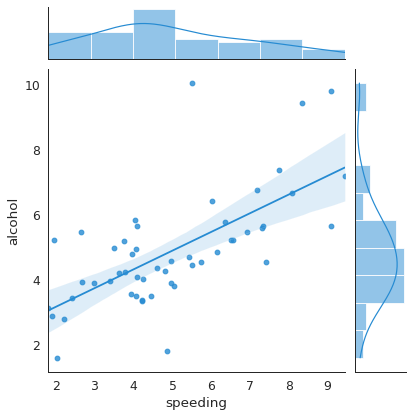

In [34]:
# You can set styling for your axes and grids
# white, darkgrid, whitegrid, dark, ticks
sns.set_style('white')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit
# how you will present your data (paper, talk, poster)
sns.set_context('paper', font_scale=1.4)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.despine(left=False, bottom=False)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

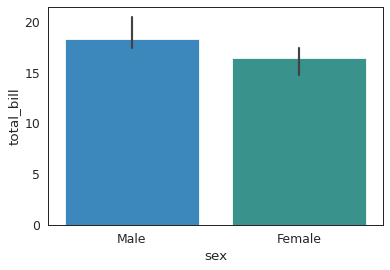

In [35]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

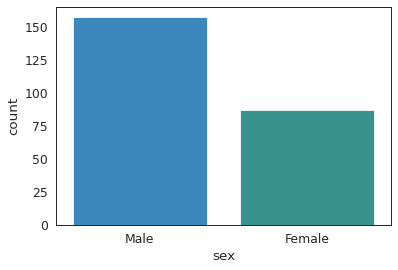

In [36]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)

### Box Plot

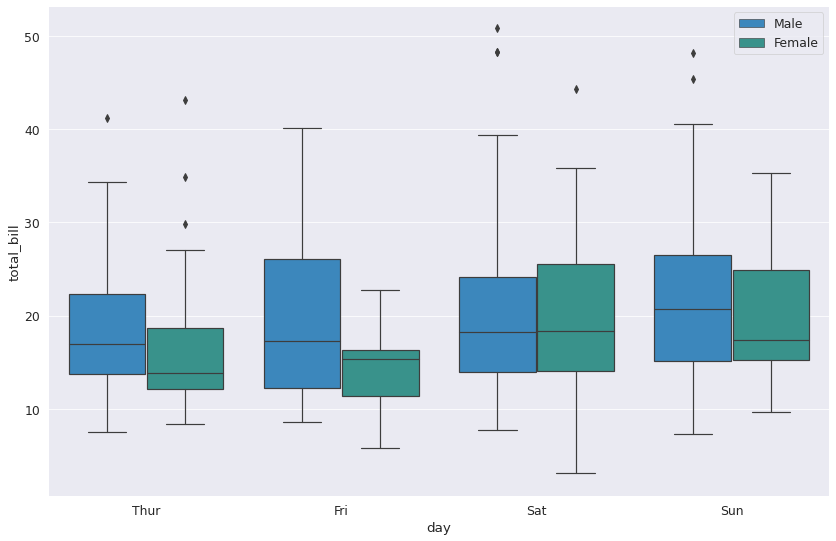

In [37]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

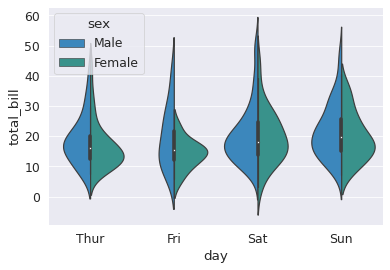

In [38]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

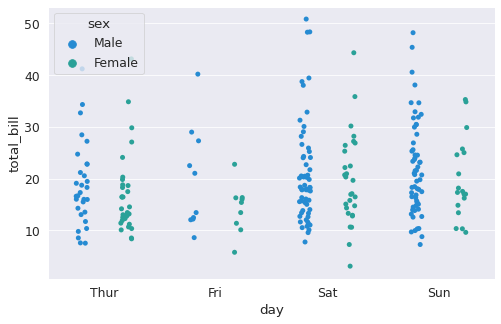

In [39]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

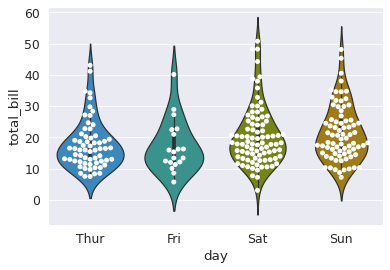

In [40]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

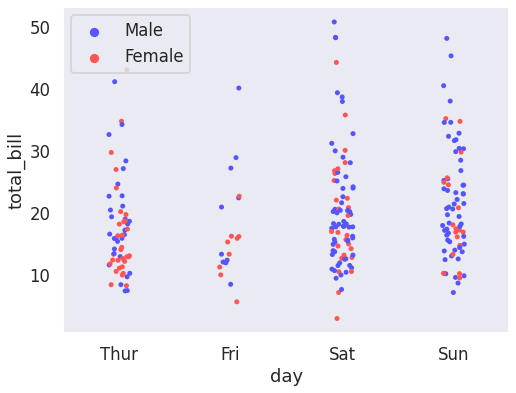

In [41]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

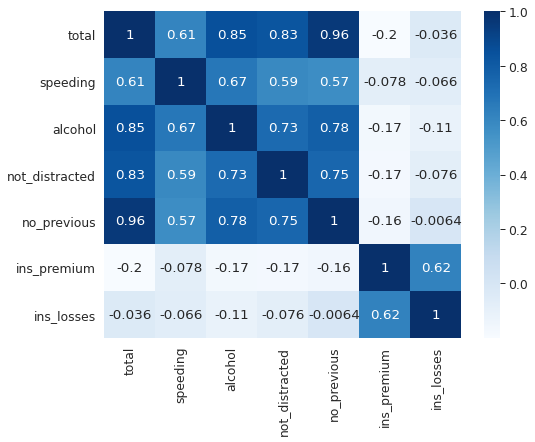

In [42]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

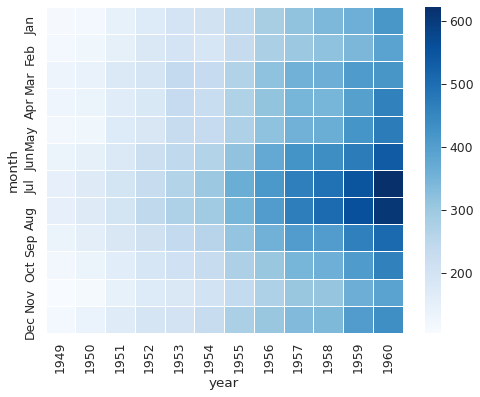

In [43]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

### Cluster Map

<Figure size 576x432 with 0 Axes>

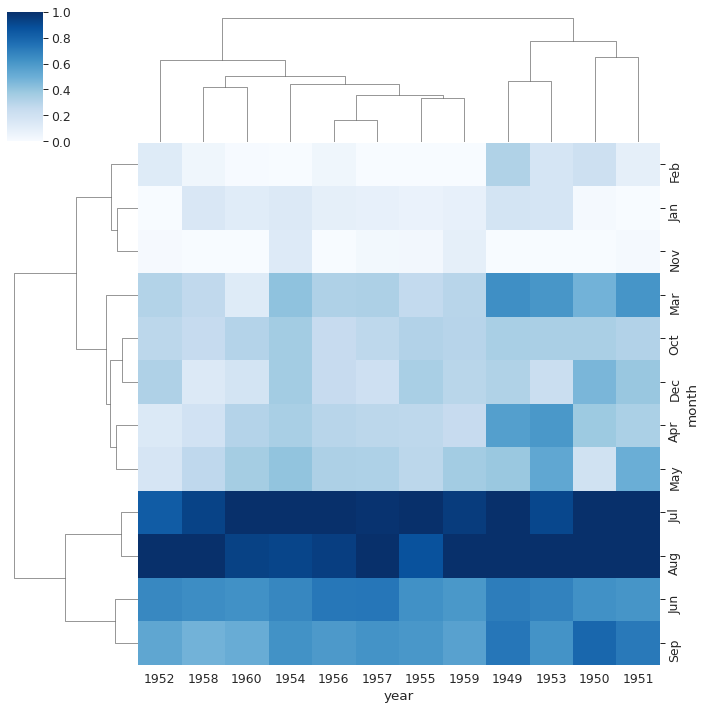

In [44]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# A Cluster map is a hierarchically clustered heatmap
# The distance between points is calculated, the closest are joined, and this
# continues for the next closest (It compares columns / rows of the heatmap)
# This is data on iris flowers with data on petal lengths
iris = sns.load_dataset("iris")
# Return values for species
# species = iris.pop("species")
# sns.clustermap(iris)

# With our flights data we can see that years have been reoriented to place
# like data closer together
# You can see clusters of data for July & August for the years 59 & 60
# standard_scale normalizes the data to focus on the clustering
sns.clustermap(flights,cmap="Blues", standard_scale=1)


### PairGrid

<Figure size 576x432 with 0 Axes>

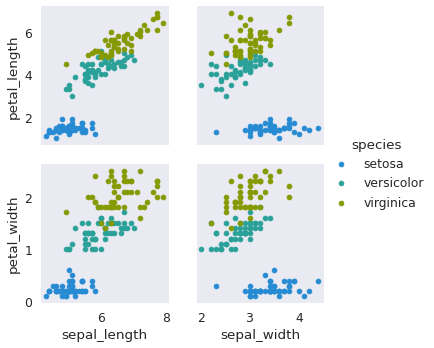

In [45]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# You can create a grid of different plots with complete control over what is displayed
# Create the empty grid system using the provided data
# Colorize based on species
# iris_g = sns.PairGrid(iris, hue="species")

# Put a scatter plot across the upper, lower and diagonal
# iris_g.map(plt.scatter)

# Put a histogram on the diagonal 
# iris_g.map_diag(plt.hist)
# And a scatter plot every place else 
# iris_g.map_offdiag(plt.scatter)

# Have different plots in upper, lower and diagonal
# iris_g.map_upper(plt.scatter)
# iris_g.map_lower(sns.kdeplot)

# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend();

### Facet Grid

In [ ]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
# tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

# You can pass in attributes for the histogram
# tips_fg.map(plt.hist, "total_bill", bins=8)

# Create a scatter plot with data on total bill & tip (You need to parameters)
# tips_fg.map(plt.scatter, "total_bill", "tip")

# We can assign variables to different colors and increase size of grid
# Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
# tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3,
#                       col_order=['Dinner', 'Lunch'], palette='Set1')
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

# # Define size, linewidth and assign a color of white to markers
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# # Define that we want to assign different markers to smokers and non
# tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
#                         hue_order=['Yes','No'], 
#                         hue_kws=dict(marker=['^', 'v']))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
# tips_fg.add_legend()

# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

### Regression Plots

In [ ]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

In [ ]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

In [ ]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);

In [46]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# 1. Introduction
Supervised learning use cases examples

- How much will be the daily, monthly, and yearly sales for agiven store for the next three years?
- How many car parking spaces should be allocated for a retail store?
- How much will be my monthly electricity cost for the next three years?
- What will be the temperature for the next five days?

The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [47]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79


In [48]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


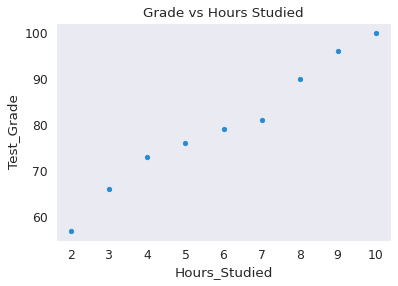

In [49]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that <b>the grade gradually increases with the increase in hours of study</b>. 

This implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [65]:
import csv
import requests

CSV_URL = 'http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv'


with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    for row in my_list:
        print(row)

['<?xml version="1.0" encoding="UTF-8"?>']
['<Error><Code>NoSuchBucket</Code><Message>The specified bucket does not exist</Message><BucketName>samplecsvs</BucketName><RequestId>RG8198MAP75BJB0F</RequestId><HostId>XDYD8S/7USmlpeTwmEQUe8KO0oAGjirozAXpTP7fO4EJWapLro1E45EN6VZeSr3Um54g/d17j38=</HostId></Error>']


In [66]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'PythonEffect.csv'

In [67]:
df.corr()

,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


In [68]:
# Simple scatter plot
#df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

In [69]:
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable


AttributeError: 'DataFrame' object has no attribute 'PythonMark'

In [70]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

NameError: name 'X' is not defined

In [71]:
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)


AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [72]:
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


NameError: name 'X_test' is not defined

In [73]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


NameError: name 'X_test' is not defined

### 2.3.  Multivariate Linear regression ($m>1$)

Let us consider the following data

In [74]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

FileNotFoundError: [Errno 2] No such file or directory: 'student-mat.csv'

In [75]:
print(maths.info())

NameError: name 'maths' is not defined

In [76]:
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

NameError: name 'maths' is not defined

In [77]:
maths.sex.unique()#this is a categorical variable

NameError: name 'maths' is not defined

In [78]:
maths.famsize.unique()#this is a categorical variable

NameError: name 'maths' is not defined

<b>Note that sklearn can only accept numerical inputs</b>.

### 2.3.1. Pre-processing of labeled data
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.

- <b>LabelBinarizer</b>: This will replace the binary variable text withvnumeric vales. We'll be using this function for the binary categorical variables.

- <b>LabelEncoder</b>: This will replace category level with number representation.

- <b>OneHotEncoder</b>: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling <b>OneHotEncoder</b>, we should use <b>LabelEncoder</b> to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [81]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

NameError: name 'maths' is not defined

In [82]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

NameError: name 'maths' is not defined

In [83]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



NameError: name 'maths' is not defined

In [84]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

NameError: name 'maths' is not defined

In [85]:
# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

NameError: name 'MX' is not defined

In [86]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

NameError: name 'Multi_lr' is not defined

In [87]:
MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

NameError: name 'Multi_lr' is not defined

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [89]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Iris.csv'

In [90]:
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

NameError: name 'dataset' is not defined

In [91]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [92]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

NameError: name 'X_test' is not defined

In [93]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

NameError: name 'y_test' is not defined

In [94]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

NameError: name 'con_mat' is not defined

In [95]:
print("Accuracy:",accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined

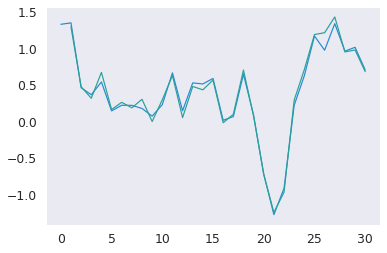

In [96]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
def Process(a,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x


def Data(x,r,h):
    y=h*x[1:]+np.random.normal(0,r,len(x)-1)
    return y

N=30
x=Process(0.8,30,0.4)
y=Data(x,0.1,1)
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.show()

        
    

In [97]:
def fs(al,N,q,h,r):
    mu_old=np.zeros(N)
    mu_new=np.zeros(N+1)
    k=np.zeros(N)
    sigma_new=np.zeros(N+1)
    sigma_old=np.zeros(N)
    sigma_new[0]=1 
    mu_new[0]=0   
    
    for i in range(N):
        mu_old[i]=al*mu_new[i]
        sigma_old[i]=q+al*sigma_new[i]*al
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i+1]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i+1]=(1-k[i]*h)*sigma_old[i]
  
    return mu_new ,sigma_new, mu_old, sigma_old
mu_new, sigma_new, mu_old, sigma_old= fs(0.8,30,0.4,1,0.1) 
print("forcasted are",mu_new, sigma_new)
print("filtred are",mu_old, sigma_old)


forcasted are [ 0.          1.18272622  0.56038036  0.34271954  0.60079013  0.22228091
  0.24738908  0.18967267  0.27697402  0.04025006  0.24982417  0.55348642
  0.12390562  0.41127144  0.4152853   0.52584026  0.06253142  0.09021501
  0.59014451  0.14429272 -0.57238883 -1.10325974 -0.95206006  0.10295535
  0.59826471  1.06275097  1.15005784  1.33968293  0.97435429  0.94395332
  0.69612458] [1.         0.09122807 0.08209124 0.08190171 0.08189774 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765]
filtred are [ 0.          0.94618097  0.44830429  0.27417563  0.4806321   0.17782473
  0.19791127  0.15173813  0.22157922  0.03220005  0.19985933  0.44278914
  0.0991245   0.32901715  0.33222824  0.4206722   0.05002513  0.072172
  0.47211561  0.11543417 -0.45

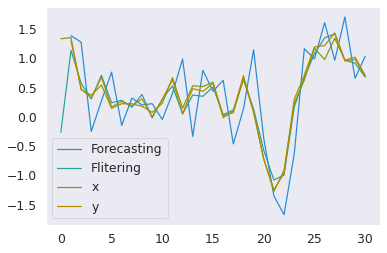

In [98]:
np.random.seed(10)
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old),label="Forecasting")
plt.plot(np.arange(N+1),np.random.normal(mu_new,sigma_new),label="Flitering")
# plt.plot(np.arange(1,N+1),sigma_old,label="sigma_old")
# plt.plot(np.arange(N+1),sigma_new,label="sigma_new")
plt.plot(np.arange(N+1),x,label="x")
plt.plot(np.arange(1,N+1),y,label="y")


plt.legend()
plt.show()

# Solving second order Euler ODE

In [200]:
# def  euler_model(f,z,t):

def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    z = np.ones((len(t), len(c)))
    # Initialize z[0]
    z[0] = c
    for i in range(N-1):
        z[i+1]=z[i]+H*f(z[i],t[i])
    return z
    

In [201]:
# Model for Euler Method
def model(z,x):
    x_1, x_2, x_3 = z
    dx_1dt = -(1/2)*x_1
    dx_2dt = (1/2)*x_1 - (1/4)*x_2    
    dx_3dt = (1/4)*x_2 - (1/6)*x_3
    
    return np.array([dx_1dt, dx_2dt, dx_3dt])

# Initial Values
c=np.array([1,1,1])

# t-values
t=np.linspace(0,4,200)

z = EulerOdeSys(model,c,t)
plt.plot(t,z[:,0])
plt.show()

IndexError: index 200 is out of bounds for axis 0 with size 200

In [99]:
#from scipy.integrate import odeint


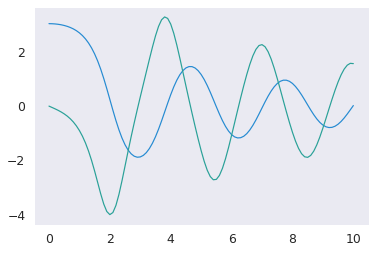

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def pend(y, t, b, c):
    theta, omega = y

    return np.array([omega, -b*omega - c*np.sin(theta)])
b=0.25; c=5.0
t = np.linspace(0, 10, 101)
y0 = [np.pi - 0.1, 0.0]
sol = odeint(pend, y0,t, args=(b, c))
plt.plot(t,sol)
#plt.legend()
plt.show()

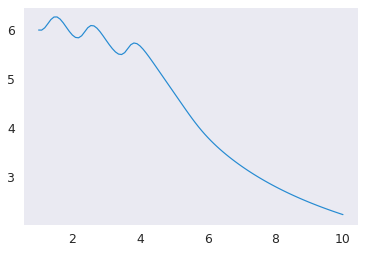

In [101]:
def f(x,t):
    dxdt=np.sin(x*t)
    return dxdt
t=np.linspace(1,10,100)
y0=6
y=odeint(f,y0,t)
plt.plot(t,y)
plt.show()



In [102]:
#solving the system
def model(z,t):
    x,y=z
    dxdt=5*x-3*y,
    dydt=-6*x+2*y
    return np.array([dxdt,dydt])
z=[1,2]
t=np.linspace(1,10,100)
v=odeint(model,z,t)
plt.plot(t,v[:,0],label="X(t)")
plt.plot(t,v[:,1],label="y(t)")
plt.legend()
plt.show()

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

# Solve $2^2$ order higher order ode

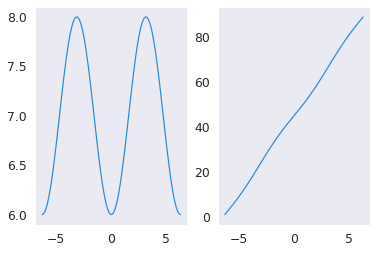

In [104]:
def model(z0,x):
    y,z=z0
    dydx=z; dzdx=np.sin(x)
    return np.array([dydx,dzdx])
z0=np.array([1,6])
x=np.linspace(-2*np.pi,2*np.pi,100)
l=odeint(model,z0,x)


plt.subplot(1,2,1)
plt.plot(x,l[:,1],label="Y(z)")

plt.subplot(1,2,2)
plt.plot(x,l[:,0],label="Z(z)")




plt.show()

In [105]:
a=np.array([[3,6,-4,7],[-5,0,-1,8],[7,2,-4,8]])
a.min(axis=0)


array([-5,  0, -4,  7])

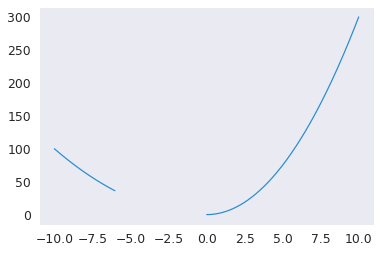

In [106]:
#plotting the piecewize fuction
def Fuct(x):
    if x>0:
        return 3*x**2
    elif x<-6:
        return x**2
g=np.vectorize(Fuct)
x=np.linspace(-10,10,1000)
plt.plot(x,g(x))
        

[]

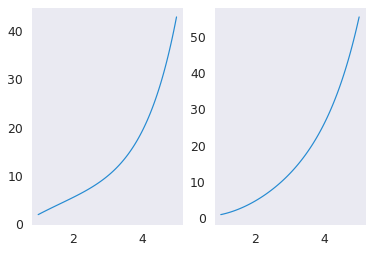

In [107]:
from scipy.integrate import odeint
def f(z0,x):
    y,z=z0
    return np.array([z,6*x+np.exp(x)-2*z-y])
z0=np.array([1,2])
x=np.linspace(1,5,100)
l=odeint(f,z,x)
plt.subplot(1,2,1)
plt.plot(x,l[:,1])

plt.subplot(1,2,2)
plt.plot(x,l[:,0])


plt.plot()

In [108]:
def ind(L):
    for i in range(len(L)):
        j=L[i].split()
        for l in range(len(j)):
            if j[l].istitle():
                return (i,l)
a=['wafa is Wafa','Pierre','Quawa','Rwanda']
ind(a)

(0, 2)

**pendulum problem using euler method**


In [119]:
#This code will solve the pendulum proble using euler method
def Euler(a,b,c,N,f):
    global x
    x=np.linspace(a,b,N+1)
    y=np.empty(N+1+1)
    y[0]=c
    h=(b-a)/N
    for i in range(N):
        y[i+1]=y[i]+h*f(x[i],y[i])
    return y

    

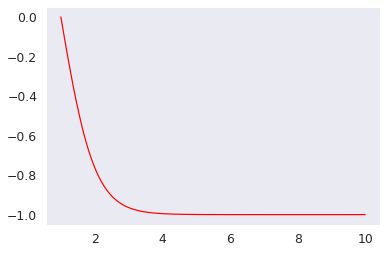

In [120]:
def model(t,v):
    alpha=1
    beta = 1
    return alpha*v**2-beta
vo=0
t=np.linspace(1,10,100)
g=odeint(model,y0=vo,t=t, tfirst=True)
plt.plot(t,g,'r')
plt.show()

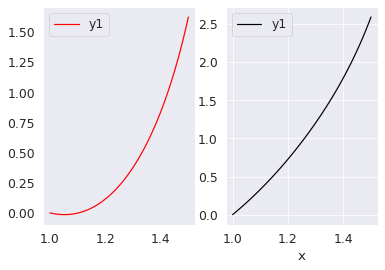

In [121]:
def func(z,x):
    y1,y2=z
    return np.array([y1+y2**2+3*x, 3*y1+y2**2-np.cos(x)])
x=np.linspace(1,1.5,100)
zo=np.array([0,0])
y1=odeint(func,zo,x)
# plt.subplot(1,2,1)
# plt.plot(x,y1)
plt.subplot(1,2,2)
plt.plot(x,y1[:,0],'black',label="y1")
plt.legend()
plt.grid()
plt.xlabel("x")
plt.ylabel("Y2")
plt.subplot(1,2,1)
plt.plot(x,y1[:,1],'r',label="y1")
plt.legend()
plt.show()


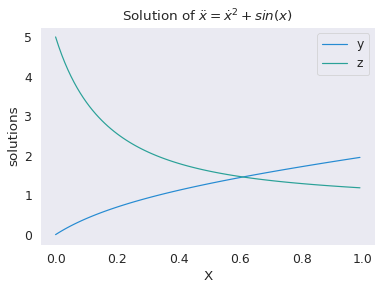

In [122]:
def funct(z,t):
    x,y=z
    return np.array([y,-y**2+np.sin(x)])
t=np.arange(0,1,0.01)
z0=np.array([0,5])
sol=odeint(funct,z0,t)
plt.plot(t,sol[:,0],label='y')
plt.plot(t,sol[:,1],label='z')
plt.title('Solution of $\ddot{x}=\dot{x}^2+sin(x)$')
plt.legend()
plt.xlabel('X')
plt.ylabel('solutions')
plt.show()

In [123]:
import numpy as np
import matplotlib.pyplot as plt
def process(alpha,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=alpha*x[i-1]+np.random.normal(0, q)
    return x

In [124]:
import numpy as np
def process(alpha,N,q):
    sigma = np.random.normal(0, q, N)
    x=np.zeros(N)
    x[0]=np.random.normal(0,1)
    x[1:N-1]= alpha*x[0:N-2]+sigma[1:N-1]
    return x

In [125]:
def data(r,h):
    xi=process(alpha,N,q)
    y=np.zeros(N)
    for i in range(N):
        y[i]=h*xi[i]+np.random.normal(0,r)
    return y

In [126]:
r=0.1; h=1; alpha=0.8; N=30; q=0.4
x0=process(alpha,N,q)
y0=data(r,h)


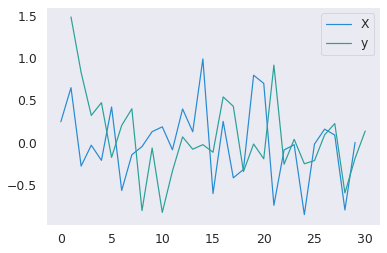

In [127]:
plt.plot(np.arange(N),x0,label='X')
plt.plot(np.arange(1,N+1),y0,label='y')
plt.legend()
plt.show()


In [128]:
def Process(alpha,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=alpha*x[i-1]+np.random.normal(0,q)
    return x
#Process(0.8,30,0.4)

In [129]:
def Data(xi,r,h):
    sigma=np.random.normal(0,r,N)
    y=h*xi[1:]+sigma
    return y

In [130]:
r=0.1; h=1; alpha=0.8; N=1000; q=0.4
xi=Process(alpha,N,q)
yi=Data(xi,r,h)

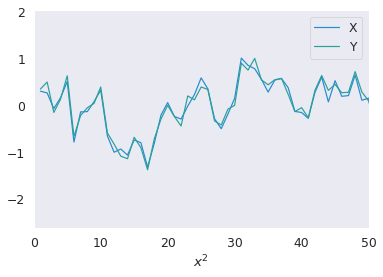

In [131]:

plt.plot(np.arange(1,N+1),xi[1:],label='X')
plt.plot(np.arange(1,N+1),yi,label='Y')
plt.legend()
plt.xlabel("$x^2$")
plt.xlim(0,50)

plt.show()

# Pandas

In [198]:
import pandas as pd
import numpy as np

In [199]:
pandas.read_csv(filepath_or_buffer, sep=_NoDefault.no_default, delimiter=None, header='infer', names=_NoDefault.no_default, index_col=None, usecols=None, squeeze=None, prefix=_NoDefault.no_default, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=None, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, encoding_errors='strict', dialect=None, error_bad_lines=None, warn_bad_lines=None, on_bad_lines=None, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None, storage_options=None)

NameError: name 'filepath_or_buffer' is not defined

In [195]:
data = pd.read_csv('data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [135]:
#print(data.to_string())

In [136]:
a=data.head(100)
#print(a.to_string())
data.sample(7)

AttributeError: 'function' object has no attribute 'head'

In [137]:
name_of_folder='ClaudePierre'
import os
if not os.path.exists(name_of_folder):
    os.makedirs(name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data.to_csv(name_of_folder+'/PierreClaude.csv', index=False)#index=False help you forget the indoces





#data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

AttributeError: 'function' object has no attribute 'to_csv'

In [138]:
data.describe()

AttributeError: 'function' object has no attribute 'describe'

In [139]:
data['ID']=["AIMS"+f"{i}" for i in range(data.shape[0])]
data

AttributeError: 'function' object has no attribute 'shape'

In [140]:
data.iloc[:,3:5] #Display cels from 3 to 5

AttributeError: 'function' object has no attribute 'iloc'

In [141]:
data.iloc[0:7:2,:]

AttributeError: 'function' object has no attribute 'iloc'

In [142]:
data.head()

AttributeError: 'function' object has no attribute 'head'

In [143]:
#data.set_index("Duration", inplace=True)
data['ID']=['AIMS'+f"{i}" for i in range(1,data.shape[0]+1)]
data

AttributeError: 'function' object has no attribute 'shape'

In [144]:
data.loc[[60,75]]

AttributeError: 'function' object has no attribute 'loc'

In [145]:
data.loc[[60,75],['Pulse',"ID"]]

AttributeError: 'function' object has no attribute 'loc'

In [146]:
data.loc[:,"Maxpulse":"ID"]

AttributeError: 'function' object has no attribute 'loc'

In [147]:
#data[data.index>60]

In [148]:
data.columns.unique()

AttributeError: 'function' object has no attribute 'columns'

In [149]:
data.Maxpulse.unique().size

AttributeError: 'function' object has no attribute 'Maxpulse'

In [150]:
data[data['Maxpulse']==130].shape #Counting where in the data Maxpulse = 130

TypeError: 'function' object is not subscriptable

In [151]:
data.sort_values(by=["Maxpulse"], ascending=True,inplace=True)
data

AttributeError: 'function' object has no attribute 'sort_values'

In [ ]:
#print(data.to_string())

In [152]:
#a=data[data["Calories":"ID"].isna()]
#a.shape
data['Calories'].isna().sum()
#data.iloc[['Calories']].isna().sum()

TypeError: 'function' object is not subscriptable

In [154]:
data.loc[:,"Pulse":"ID"].isna().sum() #counting nan values on each column

AttributeError: 'function' object has no attribute 'loc'

In [155]:
data.isna().sum()

AttributeError: 'function' object has no attribute 'isna'

In [156]:
data.dropna(inplace=True)
data
data.plot(figsize=(10,10),kind = 'box')#, x = 'Calories', y = 'Maxpulse')
#plt.ylim(0,100)
plt.show()

AttributeError: 'function' object has no attribute 'dropna'

In [157]:
# import pandas as pd

# df = pd.read_csv('data.csv')

# df.fillna(130, inplace = True)
data.to_csv(name_of_folder+'/PierreClaude.csv', index=False)
data.

SyntaxError: invalid syntax (3229594312.py, line 7)

In [158]:
data["Pulse"].describe()

TypeError: 'function' object is not subscriptable

# The way to plot, data.plot?

In [159]:
a=data.describe()
a.loc["count","Pulse"]
a.loc["mean","Pulse"]

AttributeError: 'function' object has no attribute 'describe'

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")

# data = sns.load_dataset("penguins")
# sns.pairplot(data, hue="species")
# plt.show()

In [161]:
data.plot?

Object `data.plot` not found.


In [162]:
#sns.get_dataset_names() ##Helps to know names pof datasets in seaborn

diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)

In [163]:
diamond.columns.size

10

In [164]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [180]:
print(list(diamond['color'].values.unique()))

['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [181]:
diamond['depth'].min()

43.0

In [182]:
diamond.sort_values(by=['clarity'], ascending=True, inplace=True)

In [183]:
# q=diamond['clarity'].unique()
# y=diamond['cut'].unique()
# for i in q:
#     print(f'{i} has: ',diamond[diamond["clarity"]==i].size)
# print('==================================================================')
# for j in y:
#     print(f'{j} has: ',diamond[diamond["cut"]==j].size)
number=diamond.groupby(by=['clarity','cut']).count()#.iloc[:,0]
number['Number']=number.x.values
number.loc[:,['Number']]
#number

Number
clarity cut              
IF      Ideal        1212
        Premium       230
        Very Good     268
        Good           71
        Fair            9
VVS1    Ideal        2047
        Premium       616
        Very Good     789
        Good          186
        Fair           17
VVS2    Ideal        2606
        Premium       870
        Very Good    1235
        Good          286
        Fair           69
VS1     Ideal        3589
        Premium      1989
        Very Good    1775
        Good          648
        Fair          170
VS2     Ideal        5071
        Premium      3357
        Very Good    2591
        Good          978
        Fair          261
SI1     Ideal        4282
        Premium      3575
        Very Good    3240
        Good         1560
        Fair          408
SI2     Ideal        2598
        Premium      2949
        Very Good    2100
        Good         1081
        Fair          466
I1      Ideal         146
        Premium       205
        Very Good      84
        Good           96
        Fair          210

In [184]:
# a=diamond[diamond['price']==diamond['price'].max()]
# a[["color","clarity","price"]]
diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)


diamond.sort_values(by=["price"], ascending=False)
a=diamond[diamond['price']==diamond['price'].max()]
a[["price","clarity"]]

,price,clarity
27749,18823,VS2


In [185]:
name_of_folder='Claudierre'
import os
if not os.path.exists(name_of_folder):
    os.makedirs(name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
diamond.to_csv(name_of_folder+'/uuuuuuuuuuuuu.csv', index=False)#index=False help you forget the indoces





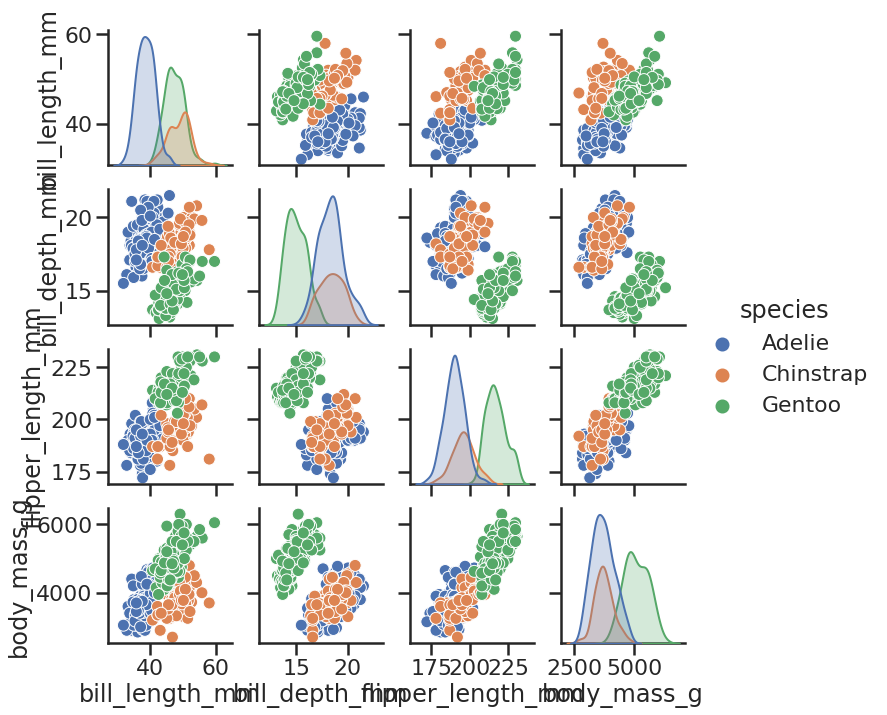

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")

diamond = sns.load_dataset("penguins")
sns.pairplot(diamond, hue="species")
plt.show()

<AxesSubplot:>

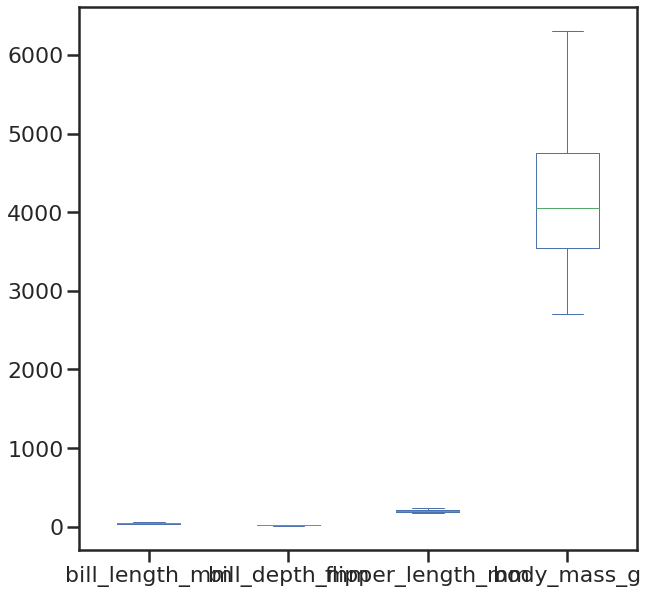

In [187]:
diamond.plot(figsize=(10,10),kind="box")

In [188]:
diamond.plot?

In [189]:
diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [190]:
def fun(z0,t):
    x1,x2,x3=z0
    return np.array([-x1/2, x1/2-x2/2,x1/4-x3/6])


In [191]:
import numpy as np
def EulerMethod(f,c,t):
    M=len(c); N=len(t)
    H=t[1]-t[0]
    Y=np.zeros((N,M))
    Y[0]=c
    for i in range(N-1):
        Y[i+1]=Y[i]+H*f(Y[i],t[i])
    return Y

In [192]:
import numpy as np
def EulerMethod(f,c,t):
    M=len(c); N=len(t)
    H=t[1]-t[0]
    Y=np.zeros((N,M))
    Y[0]=c
    for i in range(N-1):
        Y[i+1]=Y[i]+H*f(Y[i],t[i])
    return Y

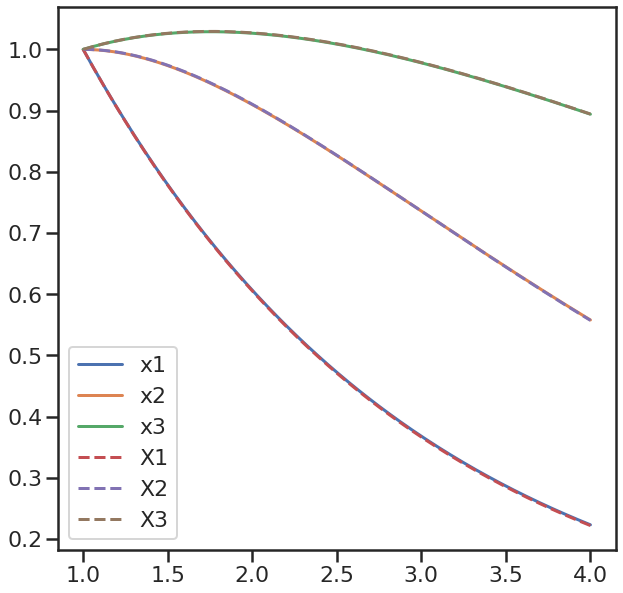

(array([1.        , 1.01507538, 1.03015075, 1.04522613, 1.06030151,
        1.07537688, 1.09045226, 1.10552764, 1.12060302, 1.13567839,
        1.15075377, 1.16582915, 1.18090452, 1.1959799 , 1.21105528,
        1.22613065, 1.24120603, 1.25628141, 1.27135678, 1.28643216,
        1.30150754, 1.31658291, 1.33165829, 1.34673367, 1.36180905,
        1.37688442, 1.3919598 , 1.40703518, 1.42211055, 1.43718593,
        1.45226131, 1.46733668, 1.48241206, 1.49748744, 1.51256281,
        1.52763819, 1.54271357, 1.55778894, 1.57286432, 1.5879397 ,
        1.60301508, 1.61809045, 1.63316583, 1.64824121, 1.66331658,
        1.67839196, 1.69346734, 1.70854271, 1.72361809, 1.73869347,
        1.75376884, 1.76884422, 1.7839196 , 1.79899497, 1.81407035,
        1.82914573, 1.84422111, 1.85929648, 1.87437186, 1.88944724,
        1.90452261, 1.91959799, 1.93467337, 1.94974874, 1.96482412,
        1.9798995 , 1.99497487, 2.01005025, 2.02512563, 2.04020101,
        2.05527638, 2.07035176, 2.08542714, 2.10

In [193]:
yo=[1,1,1]
t=np.linspace(1,4,200)
sol=odeint(fun,yo,t)

plt.figure(figsize=(10,10))
plt.plot(t,sol[:,0],label='x1')
plt.plot(t,sol[:,1],label='x2')
plt.plot(t,sol[:,2],label='x3')
plt.legend()

x00=EulerMethod(fun,yo,t)
plt.plot(t,x00[:,0],'--',label="X1", markersize=0.1)
plt.plot(t,x00[:,1],'--',label='X2')
plt.plot(t,x00[:,2],'--',label="X3")
plt.legend()
plt.show()

t,x00[:,0]-sol[:,0]

In [194]:
t,x00[:,0]-sol[:,0]

(array([1.        , 1.01507538, 1.03015075, 1.04522613, 1.06030151,
        1.07537688, 1.09045226, 1.10552764, 1.12060302, 1.13567839,
        1.15075377, 1.16582915, 1.18090452, 1.1959799 , 1.21105528,
        1.22613065, 1.24120603, 1.25628141, 1.27135678, 1.28643216,
        1.30150754, 1.31658291, 1.33165829, 1.34673367, 1.36180905,
        1.37688442, 1.3919598 , 1.40703518, 1.42211055, 1.43718593,
        1.45226131, 1.46733668, 1.48241206, 1.49748744, 1.51256281,
        1.52763819, 1.54271357, 1.55778894, 1.57286432, 1.5879397 ,
        1.60301508, 1.61809045, 1.63316583, 1.64824121, 1.66331658,
        1.67839196, 1.69346734, 1.70854271, 1.72361809, 1.73869347,
        1.75376884, 1.76884422, 1.7839196 , 1.79899497, 1.81407035,
        1.82914573, 1.84422111, 1.85929648, 1.87437186, 1.88944724,
        1.90452261, 1.91959799, 1.93467337, 1.94974874, 1.96482412,
        1.9798995 , 1.99497487, 2.01005025, 2.02512563, 2.04020101,
        2.05527638, 2.07035176, 2.08542714, 2.10

## equations

linear equation

In [206]:
import numpy as np

A = np.array([ [3,-9], [2,4] ])
b = np.array([-42,2])
z = np.linalg.solve(A,b)
print(z)

M = np.array([ [1,-2,-1], [2,2,-1], [-1,-1,2] ])
c = np.array([6,1,1])
y = np.linalg.solve(M,c)
print(y)

[-5.  3.]
[ 3. -2.  1.]


Nonlinear Solution (fsolve)

In [207]:

import numpy as np
from scipy.optimize import fsolve

def myFunction(z):
   x = z[0]
   y = z[1]
   w = z[2]

   F = np.empty((3))
   F[0] = x**2+y**2-20
   F[1] = y - x**2
   F[2] = w + 5 - x*y
   return F

zGuess = np.array([1,1,1])
z = fsolve(myFunction,zGuess)
print(z)

[2. 4. 3.]


Symbolic Solution with Sympy

Sympy is a package for symbolic solutions in Python that can be used to solve systems of equations.

2x2+y+z=1
x+2y+z=c1 −2x+y=−z
# system equation

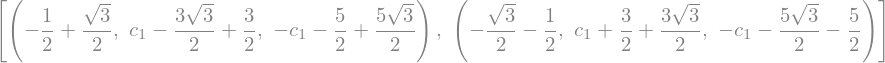

In [208]:
import sympy as sym
sym.init_printing()
x,y,z = sym.symbols('x,y,z')
c1 = sym.Symbol('c1')
f = sym.Eq(2*x**2+y+z,1)
g = sym.Eq(x+2*y+z,c1)
h = sym.Eq(-2*x+y,-z)

sym.solve([f,g,h],(x,y,z))

solve linear equation arrays matrix


In [209]:
import numpy as np


A = np.array([[8, 3, -2], [-4, 7, 5], [3, 4, -12]])
b = np.array([9, 15, 35])
x = np.linalg.solve(A, b)
x


array([-0.58226371,  3.22870478, -1.98599767])

polynomial

In [210]:
p = np.poly1d([1, 2, 3])
print(np.poly1d(p))
  

   2
1 x + 2 x + 3


R for Relationship correlation

It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - the coefficient of correlation - is called r.

The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

Python and the Scipy module will compute this value for you, all you have to do is feed it with the x and y values.

regression stat

In [212]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

-0.758591524376155


Predict Future Values

In [213]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print(speed) 

85.59308314937454


## Logistic Regression

#Logistic regression aims to solve classification problems. It does this by predicting categorical outcomes, unlike linear regression that predicts a continuous outcome.

#In the simplest case there are two outcomes, which is called binomial, an example of which is predicting if a tumor is malignant or benign. Other cases have more than two outcomes to classify, in this case it is called multinomial. A common example for multinomial logistic regression would be predicting the class of an iris flower between 3 different species.

Here we will be using basic logistic regression to predict a binomial variable. This means it has only two possible outcomes.


In [217]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted) 

[0]


Coefficient Logistic Regression

In [219]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds) 

[[4.03541657]]


Probability 

In [220]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

Function Explained

To find the log-odds for each observation, we must first create a formula that looks similar to the one from linear regression, extracting the coefficient and the intercept.

log_odds = logr.coef_ * x + logr.intercept_

To then convert the log-odds to odds we must exponentiate the log-odds.

odds = numpy.exp(log_odds)

Now that we have the odds, we can convert it to probability by dividing it by 1 plus the odds.

probability = odds / (1 + odds)

Let us now use the function with what we have learned to find out the probability that each tumor is cancerous.
**example**


In [221]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X)) 

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


Results Explained

3.78 0.61 The probability that a tumor with the size 3.78cm is cancerous is 61%.

2.44 0.19 The probability that a tumor with the size 2.44cm is cancerous is 19%.

2.09 0.13 The probability that a tumor with the size 2.09cm is cancerous is 13%.

## Categorical Data

Predict CO2

We can use this additional information alongside the volume and weight to predict CO2

To combine the information, we can use the concat() function from pandas.

First we will need to import a couple modules.

We will start with importing the Pandas.

import pandas

The pandas module allows us to read csv files and manipulate DataFrame objects:

cars = pandas.read_csv("data.csv")

It also allows us to create the dummy variables:

ohe_cars = pandas.get_dummies(cars[['Car']])

Then we must select the independent variables (X) and add the dummy variables columnwise.

Also store the dependent variable in y.

X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

We also need to import a method from sklearn to create a linear model

Learn about linear regression.

from sklearn import linear_model

Now we can fit the data to a linear regression:

regr = linear_model.LinearRegression()
regr.fit(X,y)

Finally we can predict the CO2 emissions based on the car's weight, volume, and manufacturer.

##predict the CO2 emission of a Volvo where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])
**example**

import pandas
from sklearn import linear_model

cars = pandas.read_csv("data.csv")
ohe_cars = pandas.get_dummies(cars[['Car']])

X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

regr = linear_model.LinearRegression()
regr.fit(X,y)

##predict the CO2 emission of a Volvo where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)

# Python Cheetsheet

### PandasML2

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt
# sns.set_context('poster')
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

#### Regression Model

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
diamonds.head()

In [ ]:
diamonds.info()

In [ ]:
plt.figure(figsize=(30,30))
corr = diamonds.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
# sns.set(rc = {'figure.figsize':(15,6)})
plt.figure(figsize=(15,10))
sns.heatmap(diamonds.corr(), cmap="YlGnBu", annot=True)

- No need to preprocessthe categorical variables in this data

# Titanic

In [ ]:
import numpy as np
import seaborn as sb
#a)
# print(sb.get_dataset_names())
datas = sb.load_dataset("titanic")
datas.shape
datas.head(10)

#b)
datas.isnull().sum()
print(datas.isnull().sum())
# datas.drop(columns = ['deck'], inplace = True)

#c)
df=datas.dropna(axis = 0, inplace = False)
print(df.shape)
df.head()

In [ ]:
df.loc[(df['sex'] == 'female') & (df['survived'] == 1)].shape[0]

In [ ]:
df.loc[(datas['sex'] == 'male') & (datas['survived'] == 0)].age.mean()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15), dpi=50)
plt.subplot(2,2,1)
sb.boxplot(x="sex", y="age",hue="who",  data=datas)

plt.subplot(2,2,2)
sb.scatterplot(x="age", y="fare", data=datas)

plt.subplot(2,2,3)
sb.barplot(x="pclass", y="age", hue="alone", data=datas)

plt.show()

#### Transforming explanatory variables

In [ ]:
exp_var = data[['carat', 'depth', 'x', 'y', 'z']].values.reshape(-1,5)
dep_var = data['price'].values.reshape(-1,1)

In [ ]:
data['price'].values.flatten()

#### Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                exp_var, dep_var, test_size=0.25, 
                                random_state=100)

#### Multiple linear regression model

In [ ]:
# Model initiation
mult_reg_model = LinearRegression()

# Model training
mult_reg_model.fit(X_train, Y_train)

### Checking model performance

In [ ]:
print("The R-squared: ", mult_reg_model.score(X_test, Y_test))

#### Coefficients of the model

In [ ]:
data.columns

In [ ]:
alphas = mult_reg_model.coef_
alphas = alphas[0,:]
betas = mult_reg_model.intercept_
# print(alphas)
# cols = data.columns
# print(cols[1])
for i in range(alphas.size):
    print(data.columns[i], ':', alphas[i])
print('The intercept of the slope is: ', betas)

#### Predict using the model

In [ ]:
print("R-squared score: ", r2_score(Y_test, y_predict))y_predict = mult_reg_model.predict(X_test)

In [ ]:
print("R-squared score: ", r2_score(Y_test, y_predict))
print("Mean absolute error: ", mean_absolute_error(Y_test, y_predict))
print("Mean squared error: ", mean_squared_error(Y_test, y_predict))

# ODEs Implementation

In [ ]:
from scipy.integrate import quad
from scipy.integrate import odeint

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: {equationNumbers: {autoNumber: "AMS"}}
});

#### Exercise 1 : Quad

In [ ]:
### Define your lambda functions
A = lambda x: ((x**3)+(5*x) - 20)/(x**2+3)
B = lambda x: (x-(1/3)) * np.sqrt(x**4 - 3)

lower_lim_a, upper_lim_a = 0,2
lower_lim_b, upper_lim_b = 3,5

quad_1 = quad(A, lower_lim_a, upper_lim_a)
quad_2 = quad(B, lower_lim_b, upper_lim_b)

print(f'The integral of A over {lower_lim_a} and {upper_lim_a} is {quad_1[0]}')
print(f'The integral of A over {lower_lim_b} and {upper_lim_b} is {quad_2[0]}')

#### Exercise 2: System of ordinary equations (odeint)

$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

In [ ]:
def model(z,x):
    x_1, x_2, x_3 = z
    dx_1dt = -(1/2)*x_1
    dx_2dt = (1/2)*x_1 - (1/4)*x_2    
    dx_3dt = (1/4)*x_2 - (1/6)*x_3
    
    return np.array([dx_1dt, dx_2dt, dx_3dt])

# Initial Conditions
initials = [1,1,1]

# x values
a,b = 0,4
N = 200
t = np.linspace(a,b,N)

odeint_model = odeint(model, initials, t)


2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


In [ ]:
x_1t = np.exp(-t/2)
x_2t = -2*np.exp(-t/2)+3*np.exp(-t/4)
x_3t = (3/2)*np.exp(-t/2)-9*np.exp(-t/4)+(17/2)*np.exp(-t/6)


plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.ylabel('$x_1(t)$')
plt.plot(t, x_1t, label='exact');
plt.plot(t, odeint_model[:,0], label='approximation')
plt.legend()

plt.subplot(3,2,2)
plt.title('Error')
plt.plot(t, np.absolute(x_1t - odeint_model[:,0]))
plt.xlabel('t')
plt.ylabel('error')

plt.subplot(3,2,3)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.ylabel('$x_2(t)$')
plt.plot(t, x_2t, label='exact');
plt.plot(t, odeint_model[:,1], label='approximation')
plt.legend()

plt.subplot(3,2,4)
plt.title('Error')
plt.plot(t, np.absolute(x_2t - odeint_model[:,1]))
plt.xlabel('t')
plt.ylabel('error')

plt.subplot(3,2,5)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.ylabel('$x_3(t)$')
plt.plot(t, x_3t, label='exact');
plt.plot(t, odeint_model[:,2], label='approximation')
plt.legend()

plt.subplot(3,2,6)
plt.title('Error')
plt.plot(t, np.absolute(x_3t - odeint_model[:,2]))
plt.xlabel('t')
plt.ylabel('error')

plt.tight_layout(pad=.2)
plt.show()

#### Exercise 3: EulerOdeSys

In [ ]:
# def  euler_model(f,z,t):

def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    z = np.ones((len(t), len(c)))
    # Initialize z[0]
    z[0] = c
    for i in range(N-1):
        z[i+1]=z[i]+H*f(z[i],t[i])
    return z
    

In [ ]:
# Model for Euler Method
def model(z,x):
    x_1, x_2, x_3 = z
    dx_1dt = -(1/2)*x_1
    dx_2dt = (1/2)*x_1 - (1/4)*x_2    
    dx_3dt = (1/4)*x_2 - (1/6)*x_3
    
    return np.array([dx_1dt, dx_2dt, dx_3dt])

# Initial Values
c=np.array([1,1,1])

# t-values
t=np.linspace(0,4,200)

z = EulerOdeSys(model,c,t)
plt.plot(t,z[:,0])
plt.show()

#### RK4OdeSys

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



In [ ]:
def RK4OdeSys(f,c,t):
    H = t[1] - t[0]
    z = np.ones((len(t), len(c)))
    z[0] = c
    
    for k in range(len(t) - 1):
        k1 = f(z[k], t[k])
        k2 = f(z[k]+ (H*(k1/2)), t[k] + (H/2))
        k3 = f(z[k]+ (H*(k2/2)), t[k] + (H/2))
        k4 = f(z[k] + H*k3, t[k] + H)
        z[k+1] = z[k] + ((H/6)*(k1+2*k2+2*k3+k4))
    return z

In [ ]:
plt.figure(figsize=(10,5))
# Initial Values
c=np.array([1,1,1])

# t-values
t=np.linspace(0,4,200)

z = RK4OdeSys(model,c,t)
plt.plot(t,z[:,0])
plt.show()

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(3,2,1)
plt.title('Exact and Approximation')
plt.xlabel('t')
plt.plot(t, x_1t, label='exact');
plt.plot(t, z[:,0], label='approximation')
plt.legend()

plt.subplot(3,2,2)
plt.title('Error')
plt.plot(t, np.absolute(x_1t - z[:,0]))
plt.xlabel('t')
plt.ylabel('error')


plt.tight_layout(pad=.2)
plt.show()

### Implicit Equation
$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

def MatGenerator(a,b,alp,K,beta,N,g):
    H=(b-a)/N
    global x
    x = np.linspace(a,b,N+1)
    B = np.zeros(N+1)
    B[0] = alp
    B[N] = beta
    B[1:N] = (H**2/K**2)*g(x[1:N])
    A = np.eye(N+1,N+1)
    A[1,0] = -1
    A[N-1,N] = -1
    A[1:N,1:N] = -np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    return A,B

In [ ]:
g=lambda x: -4*(x+1)*np.exp(x)
u=lambda x: 4*(x-1)*np.exp(x)
a=0
b=1
alp=-4
K=1
beta=0
N=100
A,B=MatGenerator(a,b,alp,K,beta,N,g)
U=np.linalg.solve(A,B)

plt.figure(figsize=(10,5))
print(U)
plt.plot(x,U,label="app")
plt.plot(x,u(x), 'g--',label="exact")
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.title("Apprioximation")
plt.legend()
plt.show()

4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [ ]:
def  MatGenerator1(a,b,K, alpha, beta,N, g):
    H=(b-a)/N
    global x,xe
    x=np.linspace(a,b,N+1)
    xe=x+H/2
    B=np.zeros(N+1)
    B[0]=alpha
    B[N]=beta
    B[1:N]=(H**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-K(xe[0])
    A[N-1,N]=-K(xe[N])
    T=np.zeros((N-1,N-1))
    for i in range(N-1):
        T[i]=-K(xe[i])*np.eye(N-1,N-1,k=-1)[i]+(K(xe[i])+K(xe[i+1]))*np.eye(N-1,N-1,k=0)[i]-K(xe[i+1])*np.eye(N-1,N-1,k=1)[i]
    A[1:N,1:N]=T
    return A,B


In [ ]:
k=lambda x: x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
uex=lambda x: 4*(x-1)*np.exp(x+1)
print(U)
A,B=MatGenerator1(-1,1,k, -8, 0,100, g)
U=np.linalg.solve(A,B)

plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
plt.title('Approximation')
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.plot(x,U)

plt.subplot(2,2,2)
plt.title('Exact ')
plt.xlabel("$x$")
plt.ylabel("$U(x)$")
plt.plot(x,uex(x))

plt.subplot(2,2,3)
plt.title('Error ')
plt.xlabel("$x$")
plt.ylabel("$|U_{app}-U(x)|$")
plt.plot(x,abs(U-uex(x)))

## All Hove Course Material

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt

Let us start by creating a simple example.

Alternatively, you can use `;` to suppress such unwanted information. In python, `;` is used to suppress output.

## Setting Styles
There are many styles in `matplotlib` that one can use. 

In [ ]:
plt.style.available?

In [ ]:
plt.style.use('seaborn')

One can create a single figure with multiple lines by calling the `plot` function multiple times

## Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

## Plotting lines in `matplotlib`

As you can see in the previous plots, `matplotlib` chose the colors and the type of lines automatically. However, one can also set their own colors and line types. Let us look at some examples in the cells below.

Alternatively, I can use short cuts to obtain the above plot exactly. 

|character|description|
| ----------- | ----------- |
|```-``` | solid |
|```--``` | dashed |
|```-.``` | dash-dot |
|```:``` | dotted |

In [ ]:
# For short, you can use the following codes:
plt.plot(x, x + 0, linestyle='-')  # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':');  # dotted

This is the abbreviations for the colours available in `matplotlib`.

| character | color |
| ----------- | ----------- |
| ``'b'`` | blue |
| ``'g'`` | green |
| ``'r'`` | red |
| ``'c'`` | cyan |
| ``'m'`` | magenta |
| ``'y'`` | yellow |
| ``'k'`` | black |
| ``'w'`` | white |

An advantage of using `matplotlib`, is the ability to combine color choice and linestyle. Let us see the example in the cell below.

Next, let us look at some combinations.

In [ ]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x-1, x + 3, ':r'); # dotted red

In [ ]:
plt.plot(x, x+0, '-g', x, x+1, '--c', x, x+2, '-.k', x, x+3, ':r');

Also, one can choose the type of marker they want. For example, in the cell below, we have `go--`. This will generate a green circle marker with dashed lines running in it.

In [ ]:
y = np.linspace(0, 10, 30)
plt.plot(y, np.sin(y), '>--', linewidth=5, markersize=10);

**Markers**

|character|description|
| ----------- | ----------- |
|```.``` | point marker|
|```,``` | pixel marker|
|```o``` | circle marker|
|```v``` | triangle_down marker|
|```^``` | triangle_up marker|
|```<``` | triangle_left marker|
|```>``` | triangle_right marker|
|```1``` | tri_down marker|
|```2``` | tri_up marker|
|```3``` | tri_left marker|
|```4``` | tri_right marker|
|```s``` | square marker|
|```p``` | pentagon marker|
|```*``` | star marker|
|```h``` | hexagon1 marker|
|```H``` | hexagon2 marker|
|```+``` | plus marker|
|```x``` | x marker|
|```D``` | diamond marker|
|```d``` | thin_diamond marker|
|```_``` | hline marker|

The general approach to the `plot` function is very simple;

```plot(x, y, [fmt], **kwargs)``` <br>
```plot(x, y, [fmt], x2, y2, [fmt], ..., **kwargs)```

## Adjusting the axes limits
The axes are adjusted by using `xlim` and `ylim` functions.

In [ ]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)         # changing the limits of the x-axis
plt.ylim(-1.5, 1.5);     # changing the limits of the y-axis

Mainly, and a more powerful method of creating scatter plots is the `scatter` function, which can be used very similarly to the `plot` function:

## Plotting Histogram

In [ ]:
data = np.random.randn(1000) # generating random normal numbers
plt.hist(data); # plotting histogram

In [ ]:
# tuning histogram plot
plt.hist(data, bins=30, alpha=0.5, histtype='stepfilled', edgecolor=None);

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

plt.hist(x1, histtype='stepfilled', alpha=1, bins=40)
plt.hist(x2, histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x3, histtype='stepfilled', alpha=0.3, bins=40);

An alternative to the cell above

In [ ]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict( bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);
np.random.randn?
plt.hist?

## Customizing plot legends
Plot legends give meaning to a visualization, assigning meaning to the various plot elements. We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the `legend()` command, which automatically creates a legend for any labeled plot elements:

But there are many ways we might want to customize such a legend. For example, we can specify the location and turn off the frame:

In [ ]:
plt.plot(x, np.sin(x), '-b', label='Sine')
plt.plot(x, np.cos(x), '--r', label='Cosine')
plt.legend(loc='upper right'); # adding positional argument to legend

We can use the `ncol` command to specify the number of columns in the legend and `title` to specify the title of the legend:

In [ ]:
plt.axes()  # standard axes
plt.plot(x, np.sin(x))
plt.axes([0.65, 0.65, 0.2, 0.2]); # new coordinated figure
plt.plot(x, np.cos(x));

### Simple Grids of Subplots
Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create. The lowest level of these is `subplot()`, which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

An example of subplot

In this session, we will demonstrate various techniques for visualising data using both `matplotlib` and `pandas`. This will also include the correct interpretation and understanding of the different plotting techniques. The data to be used are `flight_data.csv` and `weather.csv`. They can both be found in the folder.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('flight_data.csv')

In [ ]:
df.head()

In [ ]:
df.shape

To reduce the amount of data we will be working with and make things a little easier, lets only look at _Alaska Airlines_ flights leaving from New York City in 2013. This can be done by subsetting the data in such a way that we only observe flights from Alaska Airlines (carrier code AS), as follows;

In [ ]:
Alaska = df[df['carrier'] == 'AS']

This essentially picks out all of the rows within the flights data set for which the carrier code is AS and discards the rest, thus creating a new data set entitled Alaska. To observe the Alaska data we can use the following commands:

In [ ]:
Alaska.head()

In [ ]:
Alaska.shape

# Visualising the data 
## Scatterplots
This allows us to examine if there is any relationship between two variables, such as positive or negative correlation, and whether the relationship appears linear or not. Lets say we wanted to observe the relationship between departure and arrival delays. We can do that as follows:

In [ ]:
plt.style.use('Solarize_Light2')
plt.scatter('dep_delay', 'arr_delay', data=Alaska); 

## Adding labels to the axes

In [ ]:
plt.scatter('dep_delay', 'arr_delay', data=Alaska)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter('dep_delay', 'arr_delay', data=Alaska, color='k', alpha=0.2)
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Arrival delay (minutes)')
plt.title('Alaska Airlines flights leaving NYC in 2013');

### Something to think about.
1. Why do departure and arrival delays appear to have a positive relationship?
2. Why is there a cluster of points at (0,0)? What does this indicate?

## Histograms
Histograms allow us to look at the statistical distribution of a variable. They show us how many values of a variable fall within specified bins. These bins give ranges of values for which the variable lies. The bins can be altered, that is, by changing their width, or by increasing the number of bins, such that we see the distribution at a higher resolution. Here, lets take a look at the weather data set. This data set contains hourly weather data from three airports (LGA, JFK and EWR) in New York City in 2013. 

In [ ]:
weather = pd.read_csv('weather.csv')
weather.head()

Now, let us see  the distribution of the hourly temperature:

In [ ]:
plt.hist(weather['temp']);

As mentioned earlier, we can view histogram as a higher resolution by increasing the number of bins.

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title('Bins = 30')
weather['temp'].hist(bins=30)

plt.subplot(1,3,2)
plt.title('Bins = 10')
weather['temp'].hist(bins=10)

plt.subplot(1,3,3)
plt.title('Bins = Auto')
weather['temp'].hist(bins='auto')

plt.show()

Finally, let us plot a histogram with more information.

In [ ]:
plt.style.use('Solarize_Light2')
plt.hist(weather['temp'], bins='auto', color='#0504aa', alpha=0.7)
plt.xlabel('Temperature (Hourly)')
plt.title('Hourly temperature from NYC in 2013')
plt.show()

### Something to think about
3. What does the histogram tell us about the hourly temperature levels from NYC in 2013?

## Boxplot
Another way to look at the distribution of a variable is using a boxplot. A boxplot makes use of the standard five-number summary, that is

* the minimum value;
* the first quartile or 25th percentile;
* the median (or 2nd quartile / 50th percentile);
* the third quartile or 75th percentile;
* and the maximum value.

Keeping with the hourly temperature data, the five-number summary can be obtained by using the following command:

We could look at how the hourly temperature changes by month:

### Something to think about
4. Which months have the highest variability in temperature?

## Barplots
Barplots, or barcharts, are used to visualise the distributions of categorical variables. This essentially provides us with the frequencies of categories within a categorical variable. Lets take a look at the distribution of airline carriers within the flights data that flew out of New York City in 2013. We can do this by creating a table containing the number of flights from each airline carrier as follows:

In [ ]:
df.groupby('carrier').size().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

Barplots can also be used to compare two categorical variables. For instance, lets say we wanted to look atthe number of flights that flew out of New York York in 2013 from each carrier and from each airport (LGA, JFK and EWR). 

In [ ]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', stacked=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

This provides us with a visually nice barplot to present our carrier information by airport of origin. However,there are also alternative barplots to the stacked barplot.  One alternative to a stacked barplot is theside-by-side(ordodged)barplot, which, as suggested by its name, places the bars next to each anotherinstead of on top of one another. This can be produced as follows

#### Faceted barplot

In [ ]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', subplots=True, rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count');

#### side-by-side barplot

In [ ]:
df.groupby(['carrier', 'origin']).size().unstack().plot(kind='bar', rot=0)
plt.xlabel('Carrier')
plt.ylabel('Count')

Linegraphs are typically used when looking at _time series_ data, that is, when we have information on how a variable changes over time. Hence, there is a natural ordering to the data when observing how something changes over time, and therefore, linegraphs should be avoided if there is no sequential ordering of a variable. Lets again look at the hourly temperature data, but this time only for Newark International Airport in January. This can be done by first subsetting the data as follows:

In [ ]:
Newark_Jan = weather[(weather['origin'] == 'EWR') & (weather['month'] == 1)]
Newark_Jan

In [ ]:
plt.plot(Newark_Jan['temp']);

## Seaborn Tutorial

Seaborn is a data visualization library built on top of Matplotlib. It is often used because it makes attractive visualizations and works easily with Pandas. While in Matplotlib you often have to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

### Installing with pip <br>
`pip install seaborn`

### Installing with conda <br>
`conda install seaborn`

### import

In [ ]:
pwd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [ ]:
# You can import custom data
cs_df = pd.read_csv('ComputerSales.csv')

# Seaborn provides built in datasets
print(sns.get_dataset_names())

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

In [ ]:
cs_df

In [ ]:
crash_df.head()

### Distribution Plots

### Distribution Plot

In [ ]:
# Provides a way to look at a univariate distribution. A 
# univariate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals
# For example put all profits between $10 and $20 in this bucket
sns.distplot(crash_df['not_distracted'], kde=True, bins=25)

### Joint Plot

In [ ]:
# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

### KDE Plot

In [ ]:
# Get just the KDE plot
sns.kdeplot(crash_df['alcohol'])

### Pair Plots

### Styling

### Categorical Plots

### Bar Plots

In [ ]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Aggregate categorical data based on a function (mean is the default)
# Estimate total bill amount based on sex
# With estimator you can define functions to use other than the mean like those
# provided by NumPy : median, std, var, cov or make your own functions
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.median)

### Count Plot

In [ ]:
# A count plot is like a bar plot, but the estimator is counting 
# the number of occurances
sns.countplot(x='sex', data=tips_df)

### Box Plot

In [ ]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex')

# Moves legend to the best position
plt.legend(loc=0)

### Violin Plot

In [ ]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)

### Strip Plot

In [ ]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

### Swarm Plot

In [ ]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots
# sns.swarmplot(x='day',y='total_bill',data=tips_df)

# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')


### Palettes

In [ ]:
plt.figure(figsize=(8,6))

sns.set_style('dark')

sns.set_context('talk')

# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html
sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')

# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left
plt.legend(loc=0)

### Matrix Plots

### Heatmaps

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
# To create a heatmap with data you must have data set up as a matrix where variables
# are on the columns and rows

# Correlation tells you how influential a variable is on the result
# So we see that n previous accident is heavily correlated with accidents, while the
# insurance premium is not
crash_mx = crash_df.corr()

# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues');

In [ ]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years
# and the number of passengers for each
# We see that flights have increased over time and that most people travel in
# July and August
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# You can separate data with lines
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1);

### Regression Plots

In [ ]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

In [ ]:
plt.figure(figsize=(8,6));
sns.set_context('paper', font_scale=1.4);

plt.figure(figsize=(8,6));

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'});

In [ ]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6);

In [ ]:
# Handle all my imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

# 1. Introduction
Supervised learning use cases examples

- How much will be the daily, monthly, and yearly sales for agiven store for the next three years?
- How many car parking spaces should be allocated for a retail store?
- How much will be my monthly electricity cost for the next three years?
- What will be the temperature for the next five days?

The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.

<b>Example: </b>
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

In [ ]:
data = {'Hours_Studied': [2,3,4,5,6,7,8,9,10],
       'Test_Grade':[57,66,73,76,79,81,90,96,100]}
df = pd.DataFrame(data)
df.head()

In [ ]:
df.corr()

In [ ]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that <b>the grade gradually increases with the increase in hours of study</b>. 

This implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

## 2. Linear Regression Model

For a given positive interger $n$, Linear Regression assumes the following model: 
 
 $$Y = X\alpha+ \beta  + \epsilon,$$
where
- $X = [X_1, \cdots, X_n], X_i \in R^m$ is the list of independant variables (explanatory),
- $Y\in R^m$ is the dependant variable (Target) 
- $\alpha^T = [\alpha_1, \cdots, \alpha_n]$ is list of coefficients called slope, 
- $\beta\in R^m$ in called the intercept, 
- $\epsilon \in R^m$ is the error that cannot be explained by model.

 
Let's use the linear regression function from the <b>scikit-learn</b> library to find the values of $\alpha$ and $\beta$.

Let us denote $\hat{Y}$ the mean value of  $Y$ i.e.$$\hat{Y} = \dfrac{1}{n}\sum_{1}^n y_i $$

## 2.1. How good is your model?
There are three metrics widely used for evaluating linear model performance.
### 2.1.1. R-Squared for goodness of fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. 
$$ \text{R-squared} = 1 - \dfrac{\sum_{1}^n(e_i)^2}{\sum_{1}^n(Y_i -\bar{Y})^2} $$
It is a value between 0 and 1; the value
toward 1 indicates a better model fit. It can be computed with <b>r2_score</b> python function.

### 2.1.2. Mean Absolute Error (MAE)

The Mean Absolute Error, denoted MAE, is the mean or average of absolute value of the errors.
$$\text{MAE}= \dfrac{1}{n}\sum_{1}^n \mid e_i\mid $$

MAE indicates how close the
predicted values are to the actual values; hence a lower MAE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_absolute_error</b> python function. 


### 2.1.3. Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. 

$$\text{MAE}= \sqrt{\dfrac{1}{n}\sum_{1}^n  (e_i)^2} $$
RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. It can be computed (in %) with <b>mean_squared_error</b> python function. 


### 2.2. Single variable Linear regression ($m=1$)

Let’s consider a use case where we have collected students's average python mark
and their respective average mark in the review phase.

In [ ]:
df = pd.read_csv('PythonEffect.csv')
# print(df.info())
df.head()

In [ ]:
df.corr()

In [ ]:
# Simple scatter plot
df.plot(kind='scatter', x='PythonMark', y='ReviewPhaseMark', title='Python Effect')
plt.show()

In [ ]:
# Create linear regression object
Single_lr = LinearRegression()
# #Extract 
X= df.PythonMark.values.reshape(-1, 1) # independent variable
Y= df.ReviewPhaseMark.values.flatten() # dependent variable


In [ ]:
# split-up our current X & y variables into training
# and testing data.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it
Single_lr.fit(X_train, Y_train)

In [ ]:
# get the value of alpha and beta
alpha = Single_lr.coef_
beta = Single_lr.intercept_

# print the value of alpha and beta
print('alpha = ', alpha[0])
print('beta = ', beta)


In [ ]:
# Make predictions using the testing set
Y_pred = Single_lr.predict(X_test)

# R-squared
print('R-squared: %.2f' % r2_score(Y_test, Y_pred))
# mean absolute error
print("mean absolute error: %.2f"% mean_absolute_error(Y_test, Y_pred))
# Mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test, Y_pred))


In [ ]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.show()


### 2.3.  Multivariate Linear regression ($m>1$)

Let us consider the following data

In [ ]:
# Import the data and inspect it
maths = pd.read_csv('student-mat.csv')
maths.head()

In [ ]:
print(maths.info())

In [ ]:
corr = maths.corr()
# maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
maths.sex.unique()#this is a categorical variable

In [ ]:
maths.famsize.unique()#this is a categorical variable

<b>Note that sklearn can only accept numerical inputs</b>.

### 2.3.1. Pre-processing of labeled data
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.

- <b>LabelBinarizer</b>: This will replace the binary variable text withvnumeric vales. We'll be using this function for the binary categorical variables.

- <b>LabelEncoder</b>: This will replace category level with number representation.

- <b>OneHotEncoder</b>: This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling <b>OneHotEncoder</b>, we should use <b>LabelEncoder</b> to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

In [ ]:
# # Convert binary variable 'sex' to numeric boolean fields
lb = LabelBinarizer()
maths.sex = lb.fit_transform(maths.sex)
maths.sex.unique()

In [ ]:
# # Convert binary variable 'famsize' to numeric boolean fields
maths.famsize = lb.fit_transform(maths.famsize)
maths.famsize.unique()

In [ ]:
corr = maths.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()



In [ ]:
maths = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2', 'G3']]


MX = maths[['sex', 'famsize', 'studytime', 'famrel', 'absences', 'G1', 'G2']].values.reshape(-1, 7)
MY = maths['G3'].values.flatten()

In [ ]:
# split-up our current X & y variables into training
# and testing data.

MX_train, MX_test, MY_train, MY_test = train_test_split(MX,MY, test_size=0.2, random_state=42)

# Now we need to initiate our model and train it

Multi_lr = LinearRegression()
Multi_lr.fit(MX_train, MY_train)

In [ ]:
# Lets take a look at how well this model preforms
print("The R-Squared: ", Multi_lr.score(MX_test, MY_test))
alpha = Multi_lr.coef_
beta = Multi_lr.intercept_

for i in range(alpha.size):
    print(maths.columns[i], ': ', alpha[i])
print('The intercept of our slope is: ', beta)

In [ ]:
MY_pred = Multi_lr.predict(MX_test)
print('Mean Absolute Error:', mean_absolute_error(MY_test, MY_pred))  
print('Mean Squared Error:', mean_squared_error(MY_test, MY_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(MY_test, MY_pred)))

LogisticRegression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

In [ ]:
X = dataset[["SepalLengthCm","SepalWidthCm", "PetalLengthCm","PetalWidthCm"]].values.reshape(-1,4)
y = dataset["Species"].values.flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)### Print results 
probs_y = np.round(probs_y, 2)
probs_y
result = pd.DataFrame(probs_y, columns= np.unique(dataset.Species))
result.insert(loc=0, column="Test", value=y_test)
result.insert(loc=1, column ='Predicted', value=y_pred)
result.sample(10)

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)

In [ ]:
# confusion matrix sns heatmap 
#ax = plt.axes()
sns.heatmap(con_mat, annot=True, annot_kws={"size": 20},cmap="summer_r", xticklabels=np.unique(dataset.Species),
           yticklabels=np.unique(dataset.Species))
plt.title("Confusion Matrix of the classifier")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

# Karlman filter

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
def Process(a,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x


def Data(x,r,h):
    y=h*x[1:]+np.random.normal(0,r,len(x)-1)
    return y

N=30
x=Process(0.8,30,0.4)
y=Data(x,0.1,1)
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.show()

        
    

In [ ]:
def fs(al,N,q,h,r):
    mu_old=np.zeros(N)
    mu_new=np.zeros(N+1)
    k=np.zeros(N)
    sigma_new=np.zeros(N+1)
    sigma_old=np.zeros(N)
    sigma_new[0]=1 
    mu_new[0]=0   
    
    for i in range(N):
        mu_old[i]=al*mu_new[i]
        sigma_old[i]=q+al*sigma_new[i]*al
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i+1]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i+1]=(1-k[i]*h)*sigma_old[i]
  
    return mu_new ,sigma_new, mu_old, sigma_old
mu_new, sigma_new, mu_old, sigma_old= fs(0.8,30,0.4,1,0.1) 
print("forcasted are",mu_new, sigma_new)
print("filtred are",mu_old, sigma_old)


In [ ]:
np.random.seed(10)
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old),label="Forecasting")
plt.plot(np.arange(N+1),np.random.normal(mu_new,sigma_new),label="Flitering")
# plt.plot(np.arange(1,N+1),sigma_old,label="sigma_old")
# plt.plot(np.arange(N+1),sigma_new,label="sigma_new")
plt.plot(np.arange(N+1),x,label="x")
plt.plot(np.arange(1,N+1),y,label="y")

plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

In [ ]:
l=np.linspace(0,3,100)
for i in l:
    t=u.subs(x,l)
t

In [ ]:
t

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def process(alpha,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=alpha*x[i-1]+np.random.normal(0, q)
    return x

In [ ]:
import numpy as np
def process(alpha,N,q):
    sigma = np.random.normal(0, q, N)
    x=np.zeros(N)
    x[0]=np.random.normal(0,1)
    x[1:N-1]= alpha*x[0:N-2]+sigma[1:N-1]
    return x

In [ ]:
def data(r,h):
    xi=process(alpha,N,q)
    y=np.zeros(N)
    for i in range(N):
        y[i]=h*xi[i]+np.random.normal(0,r)
    return y

In [ ]:
r=0.1; h=1; alpha=0.8; N=30; q=0.4
x0=process(alpha,N,q)
y0=data(r,h)


In [ ]:
plt.plot(np.arange(N),x0,label='X')
plt.plot(np.arange(1,N+1),y0,label='y')
plt.legend()
plt.show()


# Pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('data.csv')

In [ ]:
#print(data.to_string())

In [ ]:
a=data.head(100)
#print(a.to_string())
data.sample(7)

In [ ]:
name_of_folder='ClaudePierre'
import os
if not os.path.exists(name_of_folder):
    os.makedirs(name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
data.to_csv(name_of_folder+'/PierreClaude.csv', index=False)#index=False help you forget the indoces





#data2.to_csv(Name_of_folder+'/mtcars_new.txt', sep='\t', index=False)
# data2.to_excel(Name_of_folder+'/mtcars_new.xlsx',sheet_name='Sheet1', index = False)

In [ ]:
data.describe()

In [ ]:
data['ID']=["AIMS"+f"{i}" for i in range(data.shape[0])]
data

In [ ]:
data.iloc[:,3:5] #Display cels from 3 to 5

In [ ]:
data.iloc[0:7:2,:]

In [ ]:
data.head()

In [ ]:
#data.set_index("Duration", inplace=True)
data['ID']=['AIMS'+f"{i}" for i in range(1,data.shape[0]+1)]
data

In [ ]:
data.loc[[60,75]]

In [ ]:
data.loc[[60,75],['Pulse',"ID"]]

In [ ]:
data.loc[:,"Maxpulse":"ID"]

In [ ]:
#data[data.index>60]

In [ ]:
data.columns.unique()

In [ ]:
data.Maxpulse.unique().size

In [ ]:
data[data['Maxpulse']==130].shape #Counting where in the data Maxpulse = 130

In [ ]:
data.sort_values(by=["Maxpulse"], ascending=True,inplace=True)
data

In [ ]:
#print(data.to_string())

In [ ]:
#a=data[data["Calories":"ID"].isna()]
#a.shape
data['Calories'].isna().sum()
#data.iloc[['Calories']].isna().sum()

In [ ]:
data.loc[:,"Pulse":"ID"].isna().sum() #counting nan values on each column

In [ ]:
data.isna().sum()

In [ ]:
# import pandas as pd

# df = pd.read_csv('data.csv')

# df.fillna(130, inplace = True)
data.to_csv(name_of_folder+'/PierreClaude.csv', index=False)
data.

In [ ]:
data["Pulse"].describe()

# The way to plot, data.plot?

In [ ]:
a=data.describe()
a.loc["count","Pulse"]
a.loc["mean","Pulse"]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")

# data = sns.load_dataset("penguins")
# sns.pairplot(data, hue="species")
# plt.show()

In [ ]:
data.plot?

In [ ]:
#sns.get_dataset_names() ##Helps to know names pof datasets in seaborn

diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)

In [ ]:
diamond.columns.size

In [ ]:
diamond.info()

In [ ]:
print(list(diamond['color'].values.unique()))

In [ ]:
diamond['depth'].min()

In [ ]:
diamond.sort_values(by=['clarity'], ascending=True, inplace=True)

In [ ]:
# q=diamond['clarity'].unique()
# y=diamond['cut'].unique()
# for i in q:
#     print(f'{i} has: ',diamond[diamond["clarity"]==i].size)
# print('==================================================================')
# for j in y:
#     print(f'{j} has: ',diamond[diamond["cut"]==j].size)
number=diamond.groupby(by=['clarity','cut']).count()#.iloc[:,0]
number['Number']=number.x.values
number.loc[:,['Number']]
#number

In [ ]:
# a=diamond[diamond['price']==diamond['price'].max()]
# a[["color","clarity","price"]]
diamond=sns.load_dataset('diamonds')#, cache=True, data_home=None)


diamond.sort_values(by=["price"], ascending=False)
a=diamond[diamond['price']==diamond['price'].max()]
a[["price","clarity"]]

In [ ]:
name_of_folder='Claudierre'
import os
if not os.path.exists(name_of_folder):
    os.makedirs(name_of_folder)
#==============================================
# index = False parameter will not write the index values, default is True
diamond.to_csv(name_of_folder+'/uuuuuuuuuuuuu.csv', index=False)#index=False help you forget the indoces





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("poster")



In [ ]:
def fun(z,t):
    x1,x2,x3=z
    
    return np.array([-x1/2, x1/2-x2/4,x1/4-x3/6])


# Euler general

In [ ]:
import matplotlib.pyplot as plt
def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z[0]=c
    for i in range(N-1):
        z[i+1]=z[i]+H*f(z[i],t[i+1])
    return z

In [ ]:
def f(z,t):
    x1,x2,x3=z
    dx1dt=-1/2*x1
    dx2dt=1/2*x1-1/4*x2
    dx3dt=1/4*x2-1/6*x3
    return np.array([dx1dt,dx2dt,dx3dt])

# simpson method for sinx

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

**Exercise 1**

1- Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.




In [194]:
def Fibonacci(n):
    if n in [1,2]:
        return n
    else:
        return Fibonacci(n-1)+Fibonacci(n-2)

def SumEven():
    s=2
    n=5
    while Fibonacci(n) <= 4000000:
        s+=Fibonacci(n)
        n+=3
    return s
print(f"The sum is {SumEven()}")

The sum is 4613732


2- An irrational decimal fraction is created by concatenating the positive integers: 0.12345678910<font color='red'>1</font>112131415161718192021...

It can be seen that the 12th digit of the fractional part is <font color='red'>1</font>. If $d_n$ represents the nth digit of the fractional part, find the value of the following expression.

$$d_1 × d_{10} × d_{100} × d_{1000} × d_{10000} × d_{100000} × d_{1000000}$$

In [230]:
d= ("").join([str(i) for i in range(185186)])
v= int(d[1])*int(d[10])*int(d[100])*int(d[1000])*int(d[10000])*int(d[100000])*int(d[1000000])
print(f"The value is {v}.")

The value is 210.


3- You are given the following information, but you may prefer to do some research for yourself.

- 1 Jan 1900 was a Monday.
- Thirty days has September, April, June and November.
- All the rest have thirty-one, Saving February alone, Which has twenty-eight, rain or shine. And on leap years, twenty-nine.
- A leap year occurs on any year evenly divisible by 4, but not on a century unless it is divisible by 400.

How many Sundays fell on the first of the month during the twentieth century (1 Jan 1901 to 31 Dec 2000)?

In [198]:
def Leap_Year(y):
    # Returns if a year is a leap year or not
    return (y % 4 == 0 and y % 100 != 0 ) or (y % 400 == 0)

def Jan1(y):
    # Returns the day of January 1st for the year y as an integer in {0,1...6}
    if y == 1900:
        return 1
    elif Leap_Year(y-1):
        return (Jan1(y-1)+2) % 7
    else:
        return (Jan1(y-1)+1) % 7
    
def Month1(m,y):
    # Returns the first day of month m in {1,2...12} for the year y 
    if m == 1:
        return Jan1(y)
    elif m in [2,4,6,8,9,11]:
        return (Month1(m-1,y) +3) % 7
    elif m!=3:
        return (Month1(m-1,y) +2) % 7
    elif Leap_Year(y):
        return (Month1(2,y)+1) % 7
    else:
        return (Month1(2,y))
    
def Sunday1():
    # Returns the answer to the question
    s=0
    for i in range(1901, 2001):
        s+= len([m for m in range(1,13) if Month1(m,i)==0])
    return s

print(f"There were {Sunday1()} months that started on a sunday during the twentieth century.")

There were 171 months that started on a sunday during the twentieth century.



**Exercise 2**

1- Write a function that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

In [116]:
def Swap(s):
    return "".join([i.swapcase() for i in s if i.isalpha()])

2- Write a function, named **UpLow**, that takes one argument: string ``s`` and **returns** a list with two elements. The first element should be the number of **lowercase letters** in ``s``. The second element should be the number of **uppercase letters** in ``s``.

In [117]:
def UpLow(s):
    l= [0, 0]
    for i in s:
        if i.isupper():
            l[1]+= 1
        elif i.islower():
            l[0]+= 1
    return l

3- Write a function that takes one argument: string ``s`` and returns either ``True`` or ``False``. It should return ``True`` if and only if **the string is a name**. We assume that a string is a name if:
* It starts with an uppercase letter.
* All the other characters are lowercase letters.

In [118]:
def IsName(s):
    return s[0].isupper() ==1 and UpLow(s)[0] == len(s)-1

4- Write a function that takes one argument: list of strings ``L``. The function should return an integer: **The first index where the list element contains a name**. If there are no names on the list please return ``-1``

In [119]:
def ListName(L):
    for i in range(len(L)):
        s= L[i].split(" ")
        for j in s:
            if IsName(j):
                return i
    return -1

**Exercise 3**

1- Write a function that takes one argument: List of integers ``L`` and returns the **maximum element in ``L`` which is strictly negative**. If such an element does not exist, **return ``0``**.

In [120]:
import numpy as np
def MaxNeg(L):
    neg= [i for i in L if i<0]
    if len(neg) == 0:
        return 0
    else:
        return max(neg)

2- Write a function that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Please use the function from Problem 3 in your solution.

In [121]:
def RowMaxNeg(M):
    s=0
    for i in M:
        s+= MaxNeg(i)
    return s

3- Write a function that takes one argument: A matrix of integers ``M`` and:
* For each **column** computes the maximum negative element.
* Returns the **sum of those elements**.


In [122]:
def ColMaxNeg(M):
    return RowMaxNeg(M.T)

**Exercise 4**

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

In [123]:
from scipy.integrate import quad
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)
A= quad(f, 0, 2)[0]
B= quad(g, 3, 5)[0]
print(f"A= {A}. \nB={B}")

A= -7.049316535735796. 
B=124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.

In [124]:
def Trap(f,a,b,H=0.001):
    Z= 0
    N= int(1+(b-a)/H)
    d= np.linspace(a,b,N)
    for i in range(1,N):
        Z+= H*(f(d[i-1])+f(d[i]))/2
    return Z

3- Compute the integrales A and B using your function **Trap**

In [125]:
f= lambda x: (x**3+5*x-20)/(x**2+3)
g= lambda x: (x-1/3)*np.sqrt(x**4-3)
A= Trap(f, 0, 2)
B= Trap(g, 3, 5)
print(f"A= {A}. \nB={B}")

A= -7.049316458638298. 
B=124.40877672379841


**Exercise 5**
Write a python code to solve the following system of equations
1. \begin{equation}
\begin{cases}
    x^2 + y + x = 4\\
    2e^x + 3y = 14
\end{cases}
\end{equation}

In [170]:
from scipy.optimize import fsolve
def System(z):
    x, y= z
    F= np.empty((2))
    F[0]= x**2+ y+ x- 4
    F[1]= 2* np.exp(x)+ 3* y
    return F

zGuess= np.empty((2))
z= fsolve(System,zGuess)
print(f"x={z[0]}, y={z[1]}")

x=2.0239643168658783, y=-4.752707030344894


2. 

\begin{equation}
  \begin{cases}
    x - 2y -z +6t= 4\\
    2x + 2y -z - 7t = -4\\
    -x - y +2z + 5t = 5\\
    -3x +4y +2z + 5t = 8\\
  \end{cases}.
\end{equation}

In [171]:
A= np.array([[1, -2, -1, 6], [2, 2, -1, -7], [-1, -1, 2, 5], [-3, 4, 2, 5]])
b= np.array([[4], [-4], [5], [8]])
z = np.linalg.solve(A,b)
print(z)

[[1.]
 [1.]
 [1.]
 [1.]]


**Exercise 6**

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    y' = f(x,y),      & \quad \text{on } [a, b]\\&\qquad\qquad\qquad (1)\\
    y(a) = c,
  \end{cases}
\end{equation}
Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.
1. Write a python function <b> EulerMethod </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using Euler method i.e.
$$ y_{k+1} = y_k + Hf(x_k,y_k) $$


In [172]:
def EulerMethod(f, a, b, c, N):
    H= (b-a)/(N)
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= y[i-1]+H*f(x[i-1],y[i-1])
    return np.array([x,y])

2. Write a python function <b> RK2Method </b> that takes $a,b,c,N,$ and $f$ and return array of all $x_k$ and $y_k$ of (1) using second order Runge-Kutta  method i.e.
\begin{equation}
\begin{cases}
\alpha = f(x_k,y_k)\\\\
y_{k+1} = y_k + Hf(x_k+\dfrac{H}{2}, y_k + \dfrac{H}{2}\alpha)
\end{cases}
\end{equation}

In [173]:
def RK2Method(f, a, b, c, N):
    H= (b-a)/(N)
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= y[i-1] + H * f(x[i-1]+H/2, y[i-1]+f(x[i-1],y[i-1])*H/2)
    return np.array([x,y])

3. Let us consider the initial value problem 

\begin{equation}
  \begin{cases}
    y' = 2y + e^{2x},      & \quad \text{on } [0, 1]\\\\
    y(0) = 3,
  \end{cases}
\end{equation}
with exact solution $g(x) = (x+3)e^{2x}$. 

For $N=200$, use subplot to plot side by side
- the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>
- the absolute error between the exact solution and the approximate solutions obtained with **odeint**, <b> EulerMethod </b> and <b> RK2Method </b>

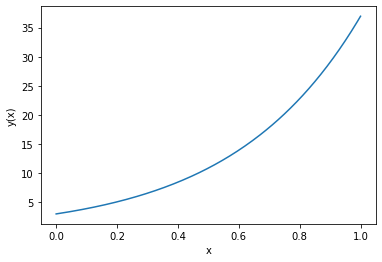

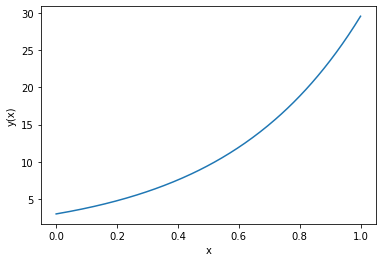

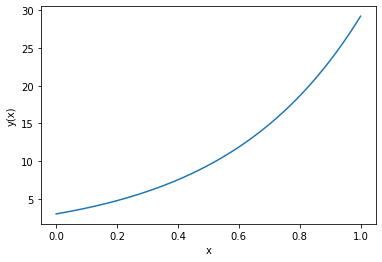

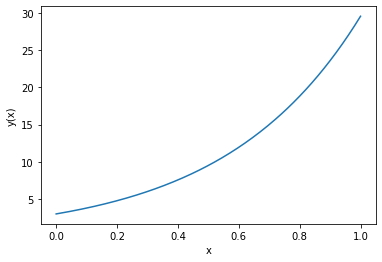

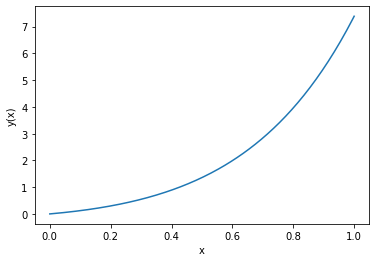

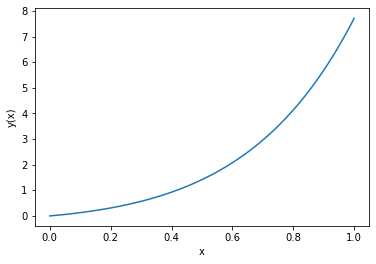

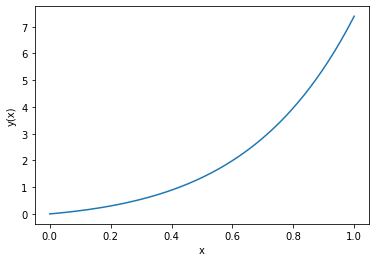

In [226]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def Realsol(a, b, c, N):
    x= np.linspace(a, b, N+1)
    y= np.empty((N+1))
    y[0]=c
    for i in range(1,N+1):
        y[i]= 3*np.exp(2*x[i])+2*x[i]*np.exp(2*x[i])
    return np.array([x,y])

def model(y,x):
    dydx = 2*y + np.exp(2*x)
    return dydx

f= lambda x,y: model(y,x)

c = 3
a = 0
b = 1
N = 200
x = np.linspace(a, b, N+1)

O= odeint(model, c, x).flatten()
E= EulerMethod(f, a, b, c, N)
R= RK2Method(f, a, b, c, N)
S= Realsol(a, b, c, N)


plt.plot(S[0],S[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(x,O)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(E[0],E[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(R[0],R[1])
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

plt.plot(x,abs(O-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(E[0],abs(E[1]-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()
plt.plot(R[0],abs(R[1]-S[1]))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

4. Which of the numerical methods used is more efficient? Why?

**Exercise 7**

Consider heat conduction in a rod with constant heat conduction properties, $\lambda^2$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\lambda^2\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{\lambda^2}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \lambda, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [234]:
def MatGenerator(a,b,l,alpha,bet,N,g):
    h=(b-a)/N
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=g(x[0])+alpha*(l**2/h**2)
    B[N]=g(x[N])+bet*(l**2/h**2)
    for i in range(1,N):
        B[i]=g(x[i-1])
    A=(l**2/h**2)*(-np.eye(N+1,N+1,k=-1)+2*np.eye(N+1,N+1,k=0)-np.eye(N+1,N+1,k=1))
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, \lambda=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x, $$

and plot the numerical solution

ValueError: x and y must have same first dimension, but have shapes (201,) and (101,)

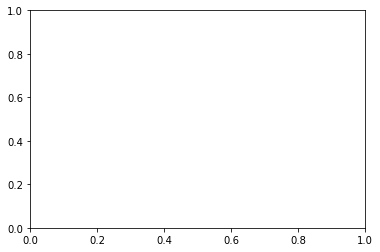

In [233]:
g= lambda x:-4*(1+x)*np.exp(x)
x
A,B= MatGenerator(0,1,1,-4,0,100,g)
U= np.linalg.solve(A,B)
plt.plot(x,U)

**Exercise 14**

Create a Module that contains all the functions on this notebook. Then, import the module to test its functions (one function per cell) 

Note: if your group number is **5** then your module should be named **AllFunctionGroup5.py**

In [200]:
import Group10 as gp
print(f"The 5th fibonacci number is {gp.Fibonacci(5)}")

The 5th fibonacci number is 8


In [201]:
print(f"The sum of even fibonacci numbers before 4 millions is {gp.SumEven()}")

The sum of even fibonacci numbers before 4 millions is 4613732


In [202]:
print(f"Is 2022 a leap year? {gp.Leap_Year(2022)}")

Is 2022 a leap year? False


In [205]:
print(f"January 1st 2022 was the {gp.Jan1(2022)}th day of the week")

January 1st 2022 was the 6th day of the week


In [206]:
print(f"October 1st 2022 was the {gp.Month1(10,2022)}th day of the week")

October 1st 2022 was the 6th day of the week


In [207]:
print(f"There were {gp.Sunday1()} months that started on a sunday during the twentieth century.")

There were 171 months that started on a sunday during the twentieth century.


In [210]:
print(f"After swapping and removing non letters, 'The_Kid.64' becomes '{gp.Swap('The_Kid.64')}'.")

After swapping and removing non letters, 'The_Kid.64' becomes 'tHEkID'.


In [211]:
print(f"The string 'The Kid is sick.' has {gp.UpLow('The Kid is sick.')[0]} lower case letters and {gp.UpLow('The Kid is sick.')[1]} upper case letters.")

The string 'The Kid is sick.' has 10 lower case letters and 2 upper case letters.


In [212]:
print(f"Is 'Thekid' a name? {gp.IsName('Thekid')}")

Is 'Thekid' a name? True


In [214]:
print(f"The first name in ['ThekiD','thekid','is Thekid good'] is at index {gp.ListName(['ThekiD','thekid','is Thekid good'])}")

The first name in ['ThekiD','thekid','is Thekid good'] is at index 2


In [216]:
print(f"The maximum negative number in [-1,2,-4] is {gp.MaxNeg([-1,2,-4])}")

The maximum negative number in [-1,2,-4] is -1


In [218]:
M= np.array([[-1,2],[1,2],[-2,-4]])
print(f"The sum of maximums per rows is {gp.RowMaxNeg(M)}")

The sum of maximums per rows is -3


In [219]:
M= np.array([[-1,2],[1,2],[-2,-4]])
print(f"The sum of maximums per columns is {gp.ColMaxNeg(M)}")

The sum of maximums per columns is -5


In [220]:
f= lambda x: (x**3+5*x-20)/(x**2+3)
A= gp.Trap(f, 0, 2)
print(f"A= {A}.")

A= -7.049316458638298.


In [221]:
zGuess= np.empty((2))
z= fsolve(gp.System,zGuess)
print(f"x={z[0]}, y={z[1]}")

x=2.0246922775889384, y=-4.756716147795825


C:\Users\ASUS\OneDrive\Documents\Prog\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [227]:
f= lambda x,y: gp.model(y,x)

E= gp.EulerMethod(f, 0, 1, 3,200)
E

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [228]:
R= gp.RK2Method(f, 0, 1, 3, 200)
R

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [229]:
S= gp.Realsol(0, 1, 3, 200)
S

array([[0.00000000e+00, 5.00000000e-03, 1.00000000e-02, 1.50000000e-02,
        2.00000000e-02, 2.50000000e-02, 3.00000000e-02, 3.50000000e-02,
        4.00000000e-02, 4.50000000e-02, 5.00000000e-02, 5.50000000e-02,
        6.00000000e-02, 6.50000000e-02, 7.00000000e-02, 7.50000000e-02,
        8.00000000e-02, 8.50000000e-02, 9.00000000e-02, 9.50000000e-02,
        1.00000000e-01, 1.05000000e-01, 1.10000000e-01, 1.15000000e-01,
        1.20000000e-01, 1.25000000e-01, 1.30000000e-01, 1.35000000e-01,
        1.40000000e-01, 1.45000000e-01, 1.50000000e-01, 1.55000000e-01,
        1.60000000e-01, 1.65000000e-01, 1.70000000e-01, 1.75000000e-01,
        1.80000000e-01, 1.85000000e-01, 1.90000000e-01, 1.95000000e-01,
        2.00000000e-01, 2.05000000e-01, 2.10000000e-01, 2.15000000e-01,
        2.20000000e-01, 2.25000000e-01, 2.30000000e-01, 2.35000000e-01,
        2.40000000e-01, 2.45000000e-01, 2.50000000e-01, 2.55000000e-01,
        2.60000000e-01, 2.65000000e-01, 2.70000000e-01, 2.750000

In [ ]:
pwd

'/home/hans/Desktop/PPQ1'

In [ ]:
pwd

**Exercise 1** <font color=red> (8/8) </font>

1 - write a function, called **sum_prod**, that takes $n$ and $m$ as input and return return A and B given by $$A = \sum_{i=m}^{n} i, \quad B = \prod_{i=m}^{n} i $$ The default value of m should be 1. Check your function for $n=10$.
<font color=red> (4/4) </font>

In [ ]:
def sum_prod(n,m=1):
    A=0
    B=1
    for i in range(m,n+1):
        A+=i
        B*=i
    return A,B
sum_prod(10)

(55, 3628800)

2- Write a Python function called **Facto** that calculates the factorial of a non-negative integer. The function accepts the number as an argument. Compute the factorial of 57. 

In [ ]:
def Facto(n):
    return sum_prod(n)[1]
Facto(57)

40526919504877216755680601905432322134980384796226602145184481280000000000000

**Exercise 2** <font color=red> (5/5) </font>

1- Using the list comprehensions, write a function, **ListComp** that takes a list $L$ of strings as input and returns 
- a list that consists of the strings of $L$ with their last characters removed
- a list of the lengths of the strings of $L$
- a list that consists of only those strings of $L$ that are at most 3 characters long

<font color=red> Correct (4/4) </font>

In [ ]:
def ListComp(L):
    L1=[]
    l=len(L)
    for i in range(l):
        s=[L[i][j] for j in range(len(L[i])-1)]
        L1.append("".join(s))
    L2=[len(L[i]) for i in range(l)]
    L3=[L[i] for i in range(l) if len(L[i])<=3]
    return L1,L2,L3

2- Check your function using the names of your closest friends at AIMS.

<font color=red> Correct (1/1) </font>

In [ ]:
ListComp(["Ala","Aime","Valera","Salomon","Media"])

(['Al', 'Aim', 'Valer', 'Salomo', 'Medi'], [3, 4, 6, 7, 5], ['Ala'])

**Exercise 3**

A palindrome is a word that reads the same backwards as forwards. Write a program that asks the user to enter a word and determines whether the word is a palindrome or not

1- using a for loop

<font color=red>
Your code should treat lowercase and uppercase letters the same.
(2/3)  </font>

In [ ]:
s=input("Enter a word ")
def Palindrom1(s):
    s1=list(s)
    s2=""
    for i in range(len(s)-1,-1,-1):
        s2+=s1[i]
    return s==s2
Palindrom1("abcbA")

Enter a word abcbA


False

2- using the string slicing

<font color=red>(3/3)  </font>

In [ ]:
s=input("Enter a word ")
def Palindrom(s):
    for i in range(len(s)):
        if s[i].lower() !=s[len(s)-i-1].lower():
            return False
    return True
Palindrom(s)

Enter a word abcca


False

**Exercise 4** <font color=red> (4/4) </font>   


1- Write a Python function named **characterCase** that accepts a string $S$ as input and returns the number of upper case letters and lower case letters as dictionary $D$. 

For example, if S = 'My name is Hove' then D = {'up': 2, 'lc': 10}

<font color=red> Correct(3/3) </font>   


In [ ]:
def characterCase(S):
    up=0
    lc=0
    for i in S:
        if i.isupper():
            up+=1
        if i.islower():
            lc+=1
    return {"up":up, "lc":lc}

2- Check for 'The quick Brow Fox and I'm proud of Mr McDonald'.

<font color=red> Correct(1/1) </font>   


In [ ]:
S="The quick Brow Fox and I'm proud of Mr McDonald"
characterCase(S)

{'up': 7, 'lc': 30}

**Exercise 5<font color=red> (3/3) </font>**

Write a function called **matches** that takes two strings as arguments and returns how many matches there are between the strings. A match is where the two strings have the same character at the same index. For instance, 'python' and 'path' match in the first, third, and fourth characters, so the function should return 3.

In [ ]:
def matches(s,s1):
    m=0
    l=min(len(s),len(s1))
    for i in range(l):
        if s[i]==s1[i]:
            m+=1
    return m
matches("python","path")

3

**Exercise 6**

Write a function **V** that takes a positive integer $n$ and a prime number $p$ and returns the greatest integer $r$ such that $p^r$ divides $n$. Check the function n=40 and p = 2.

In [ ]:
def V(n,p):
    r=0
    while n%p**r==0:
        r+=1
    return r-1
V(40,2)

3

**Exercise 7**  **<font color='red'> (8/8) </font>**

1 - Write a Python function called <b>IsPrime</b> that takes a positive integer, $n$, as input and returns the boolean True if $n$ is a prime number and False, otherwise. 

Note : A prime number (or a prime) is a natural number greater than 1 and that has no positive divisors other than 1 and itself.

In [ ]:
def IsPrime(n):
    if n==1:
        return False
    else:
        for i in range(2,n):
            if n%i==0:
                return False
    return True
IsPrime(10)

False

2- Test the function <b>IsPrime</b> for $n= 12, 47$ and $97$

In [ ]:
print("IsPrime(12)",IsPrime(12))
print("IsPrime(47)",IsPrime(47))
print("IsPrime(97)",IsPrime(97))

IsPrime(12) False
IsPrime(47) True
IsPrime(97) True


3 - Write a function called **Firstprimes** that is given a positive integer $n$ and returns the smallest prime $p$ such that $n\leq p$. Let the default value of $n$ be 2.

In [ ]:
def Firstprimes(n=2):
    while not IsPrime(n):
        n+=1
    return n

4- Check the function **Firstprimes** for $n=80$

In [ ]:
Firstprimes(80)

83

**Exercise 8** <font color=red> (5/5) </font>

Create a Module **PPQ1_Function.py** that contains all the functions on this notebook. Then, import the module to test the functions.

In [ ]:
import hans_ramiliarimanana_PPQ1 as hs
print("sum_prod(10)=",hs.sum_prod(10))
print("Facto(57)=",hs.Facto(57))
print("ListComp(['Ala','Aime','Valera','Salomon','Media'])=",hs.ListComp(["Ala","Aime","Valera","Salomon","Media"]))
print("Palindrom('level')=",hs.Palindrom("level"))
print("characterCase('The quick Brow Fox and I'm proud of Mr McDonald')=",hs.characterCase("The quick Brow Fox and I'm proud of Mr McDonald"))
print("matches('python','path')=",hs.matches('python','path'))
print("V(40,2)=",hs.V(40,2))
print("IsPrime(12)",hs.IsPrime(12))
print("IsPrime(47)",hs.IsPrime(47))
print("IsPrime(97)",hs.IsPrime(97))
print("Firstprimes(80)",hs.Firstprimes(80))

sum_prod(10)= (55, 3628800)
Facto(57)= 40526919504877216755680601905432322134980384796226602145184481280000000000000
ListComp(['Ala','Aime','Valera','Salomon','Media'])= (['Al', 'Aim', 'Valer', 'Salomo', 'Medi'], [3, 4, 6, 7, 5], ['Ala'])
Palindrom('level')= True
characterCase('The quick Brow Fox and I'm proud of Mr McDonald')= {'up': 7, 'lc': 30}
matches('python','path')= 3
V(40,2)= 3
IsPrime(12) False
IsPrime(47) True
IsPrime(97) True
Firstprimes(80) 83


In [ ]:
pwd

'/home/hans/Desktop/PPQ2'

In [ ]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint, quad
import matplotlib.pyplot as plt

**Exercise 1** **<font color='red'> 4/4 </font>**

1- Write a function, **ReverCase**, that takes one argument: A string ``s`` and returns another string ``t``. The string ``t`` should be constructed from ``s`` such that:
* All **upper** case letters from ``s`` are changed into **lower** case.
* All **lower** case letters from ``s`` are changed into **upper** case.
* All characters from ``s`` that are not letters are **deleted**.

Test your function **ReverCase**.

In [1]:
#4pt
def ReverCase(s):
    t=""
    for i in s:
        if i.islower():
            t+=i.upper()
        elif i.isupper():
            t+=i.lower()
    return t
s=input("Enter a string ")
ReverCase(s)

Enter a string selO1


'SELo'

2- Write a function,**MaxNegMat** , that takes one argument: A 2D array ``M`` and:
* For each **row** computes the maximum negative element.
* Returns the **sum of those elements**.

Test your function **MaxNegMat**

**<font color=red> (4/4) </font>**

In [ ]:
#4pt
def MaxNeg(A):
    M=A[A<0]
    if len(M)!=0:
        return np.max(M)
    return 0
def MaxNegMat(A):
    M=np.array([MaxNeg(A[i]) for i in range(A.shape[0])])
    return np.sum(M)

A=np.array([[2,-5],
           [-7,1],
           [-1,0]])
# A=np.array([[-1,2,3,4],
#           [-5,5,3,0]])
MaxNegMat(A)

-13

**Exercise 2<font color=red> (4/5) </font>**

1-The cost of admission to a popular music concert was 
- 40 USD for 1 children and 1 male
- 170 USD  for 4 children, 2 females and 3 males 
- 190 USD  for 5 children, 4 females and 2 males 

Transform the problem into a system of equation (as markdown in the cell below)<font color=red> (1.75/2) </font>
<br>
**What do c, m, and f represent?**

#2pt
\begin{equation}
\begin{cases}
    c + m = 40\\
    4c +2f +3m = 170 \\
    5c +4f +2m =
190\end{cases}
\end{equation}


2- Write a Python code to compute and display how much was the admission for each child, female and male?<font color=red> (2.25/3) </font><br>
**Display for each as item not list or array!**

In [ ]:
#3pt
A=np.array([[1,0,1],
           [4,2,3],
           [5,4,2]])
b=np.array([40,170,190])
z=solve(A,b)
z

array([10., 20., 30.])

3- Using the Python in-built function fsolve with unitial guess $x=1, y=1$, write a Python code to solve the following system

\begin{equation}
\begin{cases}
    x^2 + x = 2 - y\\
    2e^x + 3y = 8
\end{cases}
\end{equation}

<font color=red> 5/5 </font>

In [ ]:
#5pt
def model(z):
    x,y=z
    F=np.empty((2))
    F[0]=x**2+x-2+y
    F[1]=2*np.exp(x)+3*y-8
    return F
z0=[1,1]
fsolve(model,z0)

array([-3.50155091e-12,  2.00000000e+00])

**Exercise 3** 
<font color=red> (8.25/9) </font>

1- Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$

<font color=red> (4/4) </font>

In [ ]:
#4pt
f=lambda x:(x**3+5*x-20)/(x**2+3)
print("A=",quad(f,0,2)[0])
g=lambda x:(x-1/3)*np.sqrt(x**4-3)
print("B=",quad(g,3,5)[0])

A= -7.049316535735796
B= 124.40877284192784


2- Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_N=b$ and $H$ be the length of the $k$-th subinterval ($H = x_k - x_{k-1}$),
then we have 
$$\int_a^bf(x)dx \approx \sum_{k=1}^N \frac{f(x_{k-1})+f(x_k)}{2}H = Z$$


Write a function named <b>Trap</b> that takes $a,b,H, f$ as inputs and return Z. Here, ``H = 0.001`` is the default value.


<font color=red> (2.75/3) </font>


<font color=red> Your range in the for loop should start by 1, because when you start by k=0, the term x[k-1]=x[-1] is the last element of the array. </font>

In [ ]:
#3pt
def Trap(f,a,b,H=0.001):
    N=int((b-a)/H)+1
    x=np.linspace(a,b,N)
    Z=0
    for k in range(len(x)):
        Z+=f(x[k-1])+f(x[k])
    return Z*(H/2)

3- Compute the integrales A and B using your function **Trap**


<font color=red> (1.5/2) </font>

In [ ]:
#2pt
f=lambda x:(x**3+5*x-20)/(x**2+3)
print("A=",Trap(f,0,2))
g=lambda x:(x-1/3)*np.sqrt(x**4-3)
print("B=",Trap(g,3,5))

A= -7.052792649114486
B= 124.47874556988276


**Exercise 4**  <font color=red> (9.5/21) </font>

Let $\{ x_k\}$ be a partition of $[a,b]$ such that $a=x_0<x_1<\cdots<x_{N-1}<x_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = x_k - x_{k-1}$). Let consider the second-order differential equation

\begin{equation}
  \begin{cases}
   \dfrac{d^2 y}{dx^2} + 2\dfrac{d y}{dx}=30e^{3x} \qquad\forall x\in [a,b]\\\\
\dfrac{d y}{dx}(a)=8 , y(a) = 2 
  \end{cases}
\end{equation}

Let $\{ y_k\}$ be the approximate solution i.e.  $y_k\approx g(x_k)=g_k$ where $g$ is the exact solution.

1- Using the Python in-built function **odeint**, write a python function <b> SODE </b> that takes $a,b,H$ (with $H= 0.001$ as default value) and return array of all $x_k$ and $y_k$

<font color=red> (4/5) </font>

- <font color=blue>According to the problem you may consoder to have function *model* inside the function SODE  </font>

- <font color=blue>Your input in model function is t, but you used x in the fourth line (dzdx=30np.exp(3x)-2z). Thus after calling your function model you get this error *name 'x' is not defined*. **So, this should be changed to either x as the input or use t inside the model function** </font>



In [ ]:
#5pt
def model(w,t):
    y,z=w
    dydx=z
    dzdx=30*np.exp(3*x)-2*z
    return np.array([dydx,dzdx])
def SODE(a,b,H=0.001):
    w0=np.array([2,8])
    N=int((b-a)/H)+1
    t=np.linspace(a,b,N)
    y=odeint(model,w0,t)
    return t,y[:,1]

2- Solve the second-order differential equation for $a = 0, b = 2$ and plot the solution.

<font color=red> (3.0/4) </font>

In [ ]:
#4pt
a=0
b=2
t,z=SODE(a,b)
plt.plot(t,z)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

NameError: ignored

3- The exact solution of the second-order differential equation is $g(x)= 2e^{3x}-e^{-2x}+1$. Plot the absolute value, $\mid y_k - g_k\mid$ against x_k.

<font color=red> (2.5/3) </font>

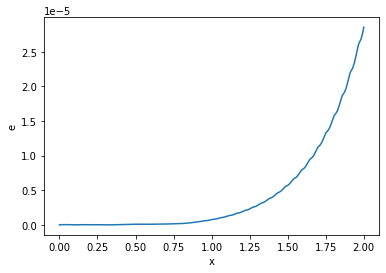

In [ ]:
#3pt
g=lambda x: 2*np.exp(3*x)-np.exp(-2*x)+1
gm=np.array([g(t[i]) for i in range(len(t))])
e=np.abs(gm-z)
e
plt.plot(t,e)
plt.xlabel("x")
plt.ylabel("e")
plt.show()

4- Write a Write a function called **L2_error** that takes $a,b,H$ and return the L2 error, $L2Er$ between the exact and the approximate solution given by

$$L2Er = \sum_0^N H(y_k - g_k)^2$$

<font color=red> (0/3) </font>


In [ ]:
#3pt


4- Let us denote $L2Er_j$ the output of **L2_error** for a given argument $a,b,H_j$. Compute the array of $L2Er_j$ for $a = 0, b=2$ and $H_j$ in an array $L =[ 10^{-1}, 10^{-2}, 10^{-3}, 10^{-4}]$.

<font color=red> (0/3) </font>

In [ ]:
#3pt

5- Plot the array of $L2Er_j$ against the array of $H_j$.

<font color=red> (0/3) </font>

In [ ]:
#3pt

## Kalman Filter and Forecasting

Assume we have the one dimensional process model
x i = αx i−1 + δ i , with δ i ∼ N (0, q 2 ), i = 1, · · · , N,
(1)
and x 0 is from a standard normal distribution. Assume the data model is
y i = hx i + ϵ i , with ϵ i ∼ N (0, r 2 ), i = 1, · · · , N,
(2)
1. Write Python function called Process that takes α, N, q and return the array of x i .

2. Write Python function called Data that takes array of x i , r, h and return the array of y i .

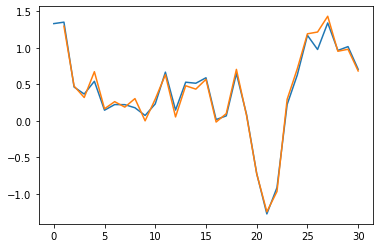

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(10)
def Process(a,N,q):
    x=np.zeros(N+1)
    x[0]=np.random.normal(0,1)
    for i in range(1,N+1):
        x[i]=a*x[i-1]+np.random.normal(0,q)
    return x


def Data(x,r,h):
    y=h*x[1:]+np.random.normal(0,r,len(x)-1)
    return y

N=30
x=Process(0.8,30,0.4)
y=Data(x,0.1,1)
plt.plot(np.arange(N+1),x)
plt.plot(np.arange(1,N+1),y)
plt.show()

        
    

3. Write a program to plot the data on the same graph as the process model, for

4. Run your code multiple times and describe what is happening.

5. Now fix the seed using the function (random.seed) and run your code multiple times and
describe what is happening.

6. Use the general formulas given for the Kalman filter to find the one dimensional formulas
for
µ 1|0 , σ 1|0 , k 1 , µ 1|1 , σ 1|1 ,
(4)
in term of α, q, r, h and y 1

7. Using the general formulas given for the Kalman filter, write Python program to calculate
µ i|i−1 , σ i|i−1 , k i , µ i|i , σ i|i ,
(5)
for i = 1, · · · , N . Be sure to initialize the loop over i. Hint: I suggest using mu old[i] for
µ i|i−1 , sigma old[i] for σ i|i−1 , mu new[i] for µ i|i , sigma new[i] for σ i|i

8. Identify the variables in your program that give
(a) a filtered estimate of the state and its uncertainty,
(b) a forecast of the state and its uncertainty.

In [3]:
def fs(al,N,q,h,r):
    mu_old=np.zeros(N)
    mu_new=np.zeros(N+1)
    k=np.zeros(N)
    sigma_new=np.zeros(N+1)
    sigma_old=np.zeros(N)
    sigma_new[0]=1 
    mu_new[0]=0   
    
    for i in range(N):
        mu_old[i]=al*mu_new[i]
        sigma_old[i]=q+al*sigma_new[i]*al
        k[i]=sigma_old[i]*h*(h*sigma_old[i]*h+r)**(-1)
        mu_new[i+1]=mu_old[i]+k[i]*(y[i]-h*mu_old[i])
        sigma_new[i+1]=(1-k[i]*h)*sigma_old[i]
  
    return mu_new ,sigma_new, mu_old, sigma_old
mu_new, sigma_new, mu_old, sigma_old= fs(0.8,30,0.4,1,0.1) 
print("forcasted are",mu_new, sigma_new)
print("filtred are",mu_old, sigma_old)


forcasted are [ 0.          1.18272622  0.56038036  0.34271954  0.60079013  0.22228091
  0.24738908  0.18967267  0.27697402  0.04025006  0.24982417  0.55348642
  0.12390562  0.41127144  0.4152853   0.52584026  0.06253142  0.09021501
  0.59014451  0.14429272 -0.57238883 -1.10325974 -0.95206006  0.10295535
  0.59826471  1.06275097  1.15005784  1.33968293  0.97435429  0.94395332
  0.69612458] [1.         0.09122807 0.08209124 0.08190171 0.08189774 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765 0.08189765
 0.08189765]
filtred are [ 0.          0.94618097  0.44830429  0.27417563  0.4806321   0.17782473
  0.19791127  0.15173813  0.22157922  0.03220005  0.19985933  0.44278914
  0.0991245   0.32901715  0.33222824  0.4206722   0.05002513  0.072172
  0.47211561  0.11543417 -0.45

9. Write a Python program to plot the states x i and data y i together with the filtered and
forecasted estimates on the same graph.

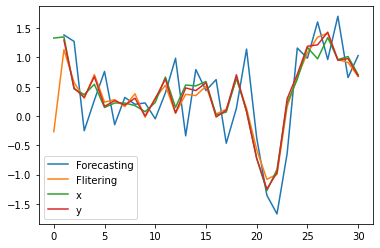

In [4]:
np.random.seed(10)
plt.plot(np.arange(1,N+1),np.random.normal(mu_old,sigma_old),label="Forecasting")
plt.plot(np.arange(N+1),np.random.normal(mu_new,sigma_new),label="Flitering")
# plt.plot(np.arange(1,N+1),sigma_old,label="sigma_old")
# plt.plot(np.arange(N+1),sigma_new,label="sigma_new")
plt.plot(np.arange(N+1),x,label="x")
plt.plot(np.arange(1,N+1),y,label="y")


plt.legend()
plt.show()

## Pandas tutorial 1

1. import matlplot, pandas and seaborn packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

2. set context of seaborn theme to poster

In [2]:
sns.set_context('poster')
#print(sns.get_dataset_names()) 
#sns.set_theme(style='white', context='poster', palette=None)
# style= white figure or graph.

3. load the diamonds dataset from seaborn package

In [54]:
diamonds = sns.load_dataset('diamonds')

4. how many columns in this dataset?

In [55]:
diamonds.shape[1]

10

5. list the names of all columns and describe the datatype of each column?

In [56]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


6. list the unique number of diamond colors in this dataset?

In [57]:
diamonds.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

7. what is the minimum depth of diamond?

In [58]:
diamonds.depth.min()

43.0

8. count the diamonds by their clarity and cut?

In [59]:
diamonds.groupby(['clarity','cut']).count().iloc[:,0]

clarity  cut      
IF       Ideal        1212
         Premium       230
         Very Good     268
         Good           71
         Fair            9
VVS1     Ideal        2047
         Premium       616
         Very Good     789
         Good          186
         Fair           17
VVS2     Ideal        2606
         Premium       870
         Very Good    1235
         Good          286
         Fair           69
VS1      Ideal        3589
         Premium      1989
         Very Good    1775
         Good          648
         Fair          170
VS2      Ideal        5071
         Premium      3357
         Very Good    2591
         Good          978
         Fair          261
SI1      Ideal        4282
         Premium      3575
         Very Good    3240
         Good         1560
         Fair          408
SI2      Ideal        2598
         Premium      2949
         Very Good    2100
         Good         1081
         Fair          466
I1       Ideal         146
         

9. list the color, clarity, and prices of the most expensive diamond?

In [60]:
diamonds.loc[diamonds["price"]==diamonds["price"].max()]. iloc[:,[2,3,6]]

,color,clarity,price
27749,I,VS2,18823


10. produce the following figures?

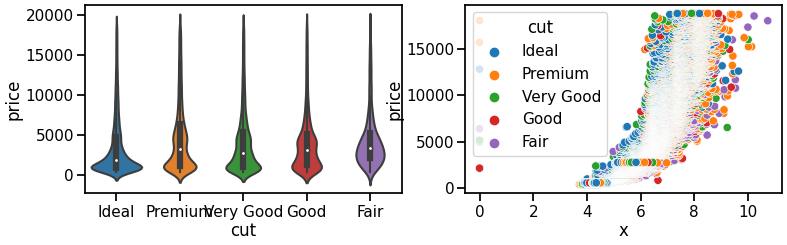

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5),dpi=50)

#fig, axs = plt.subplots(2, 2, figsize=(15, 15))
#fig.tight_layout(pad=5.0)

plt.subplot(1,2,1)
sns.violinplot(data=diamonds, x="cut", y="price", split=True)

plt.subplot(1,2,2)
sns.scatterplot(data=diamonds, x='x', y="price",hue="cut")
plt.show()

11. build a regression model using carat, depth, x, y, and z columns as explana-
tory variables and price column as response variable, and report its accuracy
using mean squared error metric?

In [3]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

In [20]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

$\text{Exercise 1}$

Write a Python code to compute and display the integrals bellow using the Python function $quad$
$$A = \int_{0}^{2} \dfrac{x^3+5x-20}{x^2+3}dx$$

$$B = \int_{3}^{5} \bigg(x-\frac{1}{3}\bigg)\sqrt{x^4-3}dx$$


$\text{Exercise 2}$

1. Write code to solve the following system of ordinary differential equations
$$
\begin{cases}
\dfrac{dx_1}{dt}& = & -\dfrac{1}{2}x_1\\\\
\dfrac{dx_2}{dt}& = & \dfrac{1}{2}x_1-\dfrac{1}{4}x_2\\\\
\dfrac{dx_3}{dt}& = & \dfrac{1}{4}x_2-\dfrac{1}{6}x_3
\end{cases}, \text{ on } [0,4]
$$
Subject to the initial conditions $x_1(0) = 1, x_2(0) = 1, x_3(0) = 1$ using the Python function <b>odeint</b> with $N=200$.

2. The exact solution of the above system of ODEs is given by

$$
\begin{cases}
x_1(t)& = & e^{-t/2}\\
x_2(t)& = & -2e^{-t/2}+3e^{-t/4}\\
x_3(t)& = & \dfrac{3}{2}e^{-t/2} - 9e^{-t/4} + \dfrac{17}{2}e^{-t/6}
\end{cases}
$$

Use $Subplot$ to plot side by side

- each exact and approximate solution in the same window
- and their absolute error vs the time 


$\text{Exercise 3} $ (Write our own function and compare it with $odeint$)

Let $\{ t_k\}$ be a partition of $[a,b]$ such that $a=t_1<t_2<\cdots<t_{N}=b$ and $H$ be the constant length of the $k$-th subinterval ($H = t_k - t_{k-1}$). Let us consider initial value problem

\begin{equation}\label{eul2}
  \begin{cases}
    \dfrac{dz}{dt} = f(z,t),      & \quad \text{on } [a, b]\\\\
    z(a) = c,
  \end{cases}
\end{equation}
where $z,f,c\in R^M$ i.e. $z = [x_1, x_2,\cdots, x_{M}]$, $c = [x_1(a), x_2(a),\cdots, x_{M}(a)]$ and $f = [f_1, f_2,\cdots, f_{M}]$. Note that \eqref{eul2} is a the general form of system of ODEs. 

Let $t, z_k,Z$ defined as follows $$t=[t_1,t_2,\cdots,t_{N-1},t_{N}],\quad z_k = [x_1(t_k), x_2(t_k),\cdots, x_{M}(t_k)], \quad
Z =\begin{pmatrix}
x_1(t_1)& x_2(t_1)&\cdots& x_{M}(t_1)\\
x_1(t_2)& x_2(t_2)&\cdots& x_{M}(t_2)\\
\vdots& \vdots&\ddots& \vdots\\
x_1(t_{N})& x_2(t_{N})&\cdots& x_{M}(t_{N})
\end{pmatrix}
$$

1. Write a python function <b> EulerOdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem \eqref{eul2} using Euler method i.e.
$$ z_{k+1} = z_k + Hf(z_k,t_k) $$


In [26]:
import matplotlib.pyplot as plt
def EulerOdeSys(f,c,t):
    H=t[1]-t[0]
    N=len(t)
    M=len(c)
    z=np.zeros((N,M))
    z[0]=c
    for i in range(N-1):
        z[i+1]=z[i]+H*f(z[i],t[i+1])
    return z
    

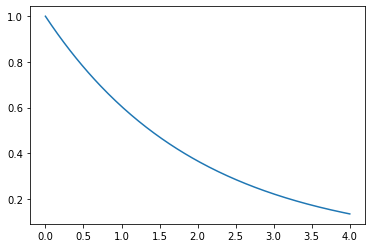

In [27]:
def f(z,t):
    x1,x2,x3=z
    dx1dt=-1/2*x1
    dx2dt=1/2*x1-1/4*x2
    dx3dt=1/4*x2-1/6*x3
    return np.array([dx1dt,dx2dt,dx3dt])

c=np.array([1,1,1])
t=np.linspace(0,4,200)
z=EulerOdeSys(f,c,t)
plt.plot(t,z[:,0])
plt.show()

2. Write a python function <b> RK4OdeSys </b> that takes $f,c,t$ and return the solution $Z$ of the initial value problem (1) using the fourth order Runge-Kutta method i.e.

\begin{equation}
\begin{cases}
k_1 = f(z_k,t_k),\\\\
k_2 = f(z_k+H\dfrac{k_1}{2}, t_k + \dfrac{H}{2}),\\\\
k_3 = f(z_k+H\dfrac{k_2}{2}, t_k + \dfrac{H}{2}),\\\\
k_4 = f(z_k+Hk_3, t_k + H),\\\\
z_{k+1} = z_k + \dfrac{H}{6}(k_1+2k_2+2k_3+k_4)
\end{cases}
\end{equation}



3. Solve the system of ODEs in $Exercise2$ using your function <b> EulerOdeSys </b> and <b> RK4OdeSys </b> 

4. By plotting the absolute error in the approximate and exact solutions, tell us which function gives a more accurate solution of a system of ODEs.

From the plot above we can only conclude that the more accurate function is either <b>odeint</b> and <b>RK4</b> since they give a solution with the lowest error. To identify the more accurate solver, let us plot the absolute error between the exact and approximate solutions (obtained with <b>odeint</b> and <b>RK4</b>), tell us which function gives a more accurate solution of a system of ODEs.

$\text{Exercise 4} $

Consider heat conduction in a rod with constant heat conduction properties, $K>0$. The steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -K\dfrac{d^2U}{dx^2} = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}

Given a finite family of points $\{x_i\}$ for $i = 0,\cdots, N$ defined by $x_i = a+ih$ with $h =\dfrac{b−a}{N}$. Let us denote $U_i$ the approximate value of $U(x_i)$ for all $i= 0,\cdots, N$.

The backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{K}{H^2}(-U_{i-1} +2U_i - U_{i+1}) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta.
  \end{cases}
\end{equation}
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
1. Write a Python function <b> MatGenerator </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [28]:
import numpy as np
from numpy.linalg import solve
from scipy.optimize import fsolve
from scipy.integrate import odeint,quad
import matplotlib.pyplot as plt

def MatGenerator(a,b,alp,lam,beta,N,g):
    H=(b-a)/N
    global x
    x=np.linspace(a,b,N+1)
    B=np.zeros(N+1)
    B[0]=alp
    B[N]=beta
    B[1:N]=(H**2/lam**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-1
    A[N-1,N]=-1
    A[1:N,1:N]=-np.eye(N-1,N-1,k=-1)+2*np.eye(N-1,N-1,k=0)-np.eye(N-1,N-1,k=1)
    return A,B

2. Solve the steady-state heat-conduction problem for 

$$a=0, b= 1, K=1,\alpha = -4, \beta = 0, N= 100 \text{ and } g(x) = -4(1+x)e^x $$

[-4.         -3.99979785 -3.99918765 -3.9981612  -3.99671021 -3.99482623
 -3.99250073 -3.989725   -3.98649024 -3.9827875  -3.97860771 -3.97394163
 -3.96877993 -3.96311311 -3.95693154 -3.95022545 -3.94298491 -3.93519986
 -3.92686009 -3.91795523 -3.90847477 -3.89840804 -3.88774421 -3.87647229
 -3.86458114 -3.85205945 -3.83889574 -3.82507839 -3.81059557 -3.79543531
 -3.77958546 -3.76303367 -3.74576746 -3.72777412 -3.70904078 -3.68955439
 -3.66930171 -3.64826929 -3.62644352 -3.60381056 -3.58035641 -3.55606683
 -3.5309274  -3.50492351 -3.4780403  -3.45026273 -3.42157554 -3.39196325
 -3.36141016 -3.32990036 -3.2974177  -3.26394581 -3.22946808 -3.19396767
 -3.15742752 -3.11983031 -3.08115849 -3.04139424 -3.00051952 -2.95851603
 -2.9153652  -2.87104821 -2.82554598 -2.77883917 -2.73090816 -2.68173306
 -2.6312937  -2.57956963 -2.52654014 -2.4721842  -2.41648051 -2.35940747
 -2.30094317 -2.24106543 -2.17975173 -2.11697926 -2.05272489 -1.98696517
 -1.91967634 -1.8508343  -1.78041463 -1.70839257 -1

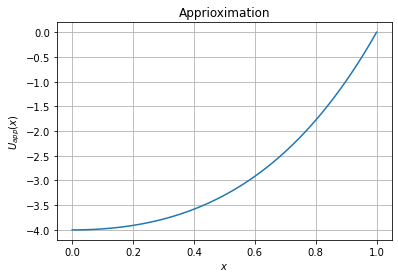

In [29]:
g=lambda x: -4*(1+x)*np.exp(x)
a=0
b=1
alp=-4
lam=1
beta=0
N=100
A,B=MatGenerator(a,b,alp,lam,beta,N,g)
U=np.linalg.solve(A,B)
print(U)
plt.plot(x,U)
plt.grid()
plt.xlabel("$x$")
plt.ylabel("$U_{app}(x)$")
plt.title("Apprioximation")
plt.show()

3. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^x$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

4. If the parameter $K(x)$ varies with $x$, then the steady-state
heat-conduction problem is then

\begin{equation}
  \begin{cases}
    -\dfrac{d}{dx}\Bigl( K(x)\dfrac{dU}{dx} \Bigl) = g(x),      & \quad x\in (a, b)\\\\
    U(a) = \alpha,\;\; U(b) = \beta.
  \end{cases}
\end{equation}


In this case, the backward Euler scheme applied to the steady-state
heat-conduction problem gives

\begin{equation}\label{secode}
  \begin{cases}
    \dfrac{1}{H^2}\Bigl(-K(x_{i-1/2})U_{i-1} +(K(x_{i-1/2})+K(x_{i+1/2}))U_i - K(x_{i+1/2})U_{i+1}\Bigr) = g(x_i),      & \quad \forall i= 1,2,\cdots, N-1\\\\
    U_0 = \alpha,\;\; U_N = \beta,
  \end{cases}
\end{equation}
where $x_{i+1/2} = x_i+H/2$.
Note that the system \eqref{secode} takes the form 
$$ AU = b $$.
a. Write a Python function <b> MatGenerator1 </b> that takes $a,b,K, \alpha, \beta,N, g$ and return the matrix $A$ and vector $b$.

In [40]:
def  MatGenerator1(a,b,K, alpha, beta,N, g):
    H=(b-a)/N
    global x,xe
    x=np.linspace(a,b,N+1)
    xe=x+H/2
    B=np.zeros(N+1)
    B[0]=alpha
    B[N]=beta
    B[1:N]=(H**2)*g(x[1:N])
    A=np.eye(N+1,N+1)
    A[1,0]=-K(xe[0])
    A[N-1,N]=-K(xe[N])
    T=np.zeros((N-1,N-1))
    for i in range(N-1):
        T[i]=-K(xe[i])*np.eye(N-1,N-1,k=-1)[i]+(K(xe[i])+K(xe[i+1]))*np.eye(N-1,N-1,k=0)[i]-K(xe[i+1])*np.eye(N-1,N-1,k=1)[i]
    A[1:N,1:N]=T
    return A,B


b. Solve the steady-state heat-conduction problem for 

$$a=-1, b= 1, K(x)=x^2,\alpha = -8, \beta = 0, N= 100 \text{ and } g(x) = -4(x^3+3x^2)e^{x+1} $$

[ -8.          -8.07999431  -8.15995574  -8.2398503   -8.31964265
  -8.39929605  -8.47877232  -8.55803177  -8.63703321  -8.71573385
  -8.79408928  -8.87205342  -8.94957847  -9.02661486  -9.10311118
  -9.17901414  -9.25426855  -9.32881718  -9.40260077  -9.47555797
  -9.54762523  -9.61873677  -9.68882452  -9.75781804  -9.82564445
  -9.89222836  -9.95749181 -10.02135418 -10.08373211 -10.14453942
 -10.20368704 -10.26108292 -10.31663192 -10.37023573 -10.42179277
 -10.47119807 -10.51834315 -10.56311594 -10.60540054 -10.64507715
 -10.68202178 -10.71610602 -10.74719667 -10.77515511 -10.79983641
 -10.82108751 -10.8387434  -10.85261746 -10.86246993 -10.86784856
 -10.86543972 -10.86303088 -10.85680764 -10.84576003 -10.82974105
 -10.80858477 -10.7821077  -10.75011427 -10.71239947 -10.66875007
 -10.61894522 -10.56275667 -10.49994886 -10.43027887 -10.35349639
 -10.26934352 -10.17755469 -10.07785648  -9.9699674   -9.85359775
  -9.72844938  -9.59421551  -9.45058051  -9.29721963  -9.13379883
  -8.95997

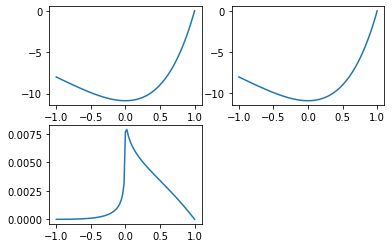

In [49]:
k=lambda x: x**2
g=lambda x: -4*(x**3+3*x**2)*np.exp(x+1)
uex=lambda x: 4*(x-1)*np.exp(x+1)
print(U)
A,B=MatGenerator1(-1,1,k, -8, 0,100, g)
U=np.linalg.solve(A,B)
plt.subplot(2,2,1)
plt.plot(x,U)
plt.subplot(2,2,2)
plt.plot(x,uex(x))
plt.subplot(2,2,3)
plt.plot(x,abs(U-uex(x)))

c. The exact solution of the steady-state heat-conduction problem above is $U(x)=4(x-1)e^{x+1}$. Use Subplot to plot side by side
    - the exact and approximate solutions against x
    - the absolute error between the exact and the approximate solution against x

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

1. Load the titanic dataset from the seaborn package.

In [3]:
 print(sns.get_dataset_names()) 
titanic = sns.load_dataset('titanic')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


2. Count the number of missing values in each column

In [34]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


3. Clean the dataset by removing every record that contains a missing value?

In [35]:
#Make a deep copy of the data2
tita = titanic.copy()
#Delete all rows that contain NaN
tita=tita.dropna(axis=0, inplace=False)

#tita

4. What is the size of the clean dataset?

In [36]:
tita.shape[0]

182

5. Count the number of survived females

In [37]:
tita.loc[(tita['sex']=='female') & (tita['survived']==1)].survived.sum()

82

6. Compute the average age of males who did not survived?

In [38]:
tita2=tita.loc[(tita['sex']=='male') & (tita['survived']==0)]
tita

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [39]:
tita.age.mean()

35.62318681318681

7. Reproduce the following three figures

<AxesSubplot:xlabel='pclass', ylabel='age'>

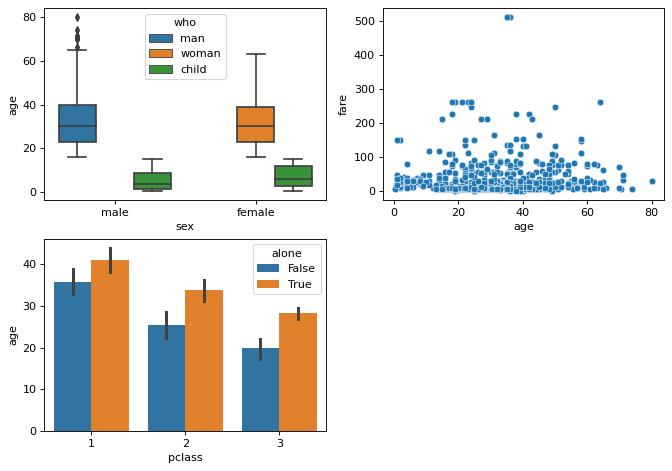

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7 ),dpi=80)
plt.subplot(2,2,1)
sns.boxplot(data=titanic, x='sex', y='age', hue='who')
plt.subplot(2,2,2)
sns.scatterplot(data=titanic, x='age', y='fare')
plt.subplot(2,2,3)
sns.barplot(data=titanic, x='pclass', y='age',hue='alone')

8. build a logistic regression model using the pclass, age, parch, and fare
columns as explanatory variables and the survived column as response variable,
and measure its performance using accuracy score and confusion matrix.